🔗 [Репозиторий на GitHub](https://github.com/KirillShiryaev61/predict_heart_risk.git)

# Проект: прогнозирование риска сердечного приступа

**Описание проекта:**

Проект направлен на прогнозирование риска сердечного приступа с использованием методов машинного обучения. На основе медицинских данных, таких как возраст, давление, результаты анализов и образ жизни, модель оценивает вероятность риска сердечного приступа. Решение поможет врачам и пациентам вовремя выявлять риски и принимать профилактические меры.

**Цель проекта:**

Построить модель для прогнозирования риска сердечного приступа (высокий или низкий).

**Описание данных:**

* **df_train - heart_train.csv** — тренировочная выборка.
* **df_test - heart_test.csv** — тестовая выборка.

**Описание признаков:**

* **Unnamed: 0** — индекс строки;
* **Age** — возраст ***(отмасштабирован)***;
* **Cholesterol** — уровень холестерина ***(отмасштабирован)***;
* **Heart rate** — частота сердечных сокращений ***(отмасштабирован)***;
* **Diabetes** — наличие сахарного диабета ***(0 - нет; 1 - да)***;
* **Family History** — наличие сердечно-сосудистых заболеваний у близких родственников ***(0 - нет; 1 - да)***;
* **Smoking** — курение ***(0 - нет; 1 - да)***;
* **Obesity** — наличие ожирения ***(0 - нет; 1 - да)***;
* **Alcohol Consumption** — употребление алкоголя ***(0 - нет; 1 - да)***;
* **Exercise Hours Per Week** — количество часов физической нагрузки в неделю ***(отмасштабирован)***;
* **Diet** — тип диеты ***(от 0 до 3)***;
* **Previous Heart Problems** — наличие сердечных заболеваний в анамнезе ***(0 - нет; 1 - да)***;
* **Medication Use** — принимает ли лекарства ***(0 - нет; 1 - да)***;
* **Stress Level** — уровень стресса ***(от 1 до 10)***;
* **Sedentary Hours Per Day** — количество часов в день проведенных сидя ***(отмасштабирован)***;
* **Income** — доход ***(отмасштабирован)***;
* **BMI** — индекс массы тела ***(отмасштабирован)***;
* **Triglycerides** — концентрация триглицеридов в крови ***(отмасштабирован)***;
* **Physical Activity Days Per Week** — количество дней с физической нагрузкой в неделю ***(от 0 до 7)***;
* **Sleep Hours Per Day** — количество часов сна в день ***(отмасштабирован)***;
* **Heart Attack Risk** — риск сердечного приступа **(целевой признак)** ***(0 - нет; 1 - да)***;
* **Blood sugar** — уровень сахара в крови ***(отмасштабирован)***;
* **CK-MB** — фермент, повышающийся в крови при повреждении сердечной мышцы ***(отмасштабирован)***;
* **Troponin** — уровень кардиоспецифического белка тропонина I или T в крови ***(отмасштабирован)***;
* **Gender** — пол ***(Male, Female)***;
* **Systolic blood pressure** — давление в артериях в момент, когда сердце сокращается ***(отмасштабирован)***;
* **Diastolic blood pressure** — давление в артериях в момент расслабления сердца ***(отмасштабирован)***;
* **id** — уникальный индификатор.

***\*(отмасштабирован)*** — означает, что признак приведен к диапозону значений от 0 до 1.

**Ход исследования:**

* **Подготовка данных**: загрузка и изучение общей информации из представленных датасетов.
* **Предобработка данных**: обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий.
* **Исследовательский анализ данных**: изучение признаков имеющихся в датасетах, их распределение, поиск выбросов/аномалий в данных.
* **Корреляционный анализ**: изучение взимосвязей между входными признаками и целевыми, а также и между ними.
* **Использование пайплайнов**: написание пайплайнов для подготовки данных и обучения модели для упрощения и ускорения поиска лучшей модели и ее гиперпараметров.
* **Поиск лучшей модели**: использование автоматического поиска лучшей модели и ее гиперпараметров с помощью **GridSearchCV**.
* **Анализ важности признаков**: анализ степени важности признков их влияния на принятие решений моделью с помощью метода **SHAP**.
* **Прогноз на тестовой выборке**: проедсказание на тестовой выборке и сохранение результата.
* **Сохранение модели для продакшена**: сохранение модели для дальнейшего продакшена.

**Общий вывод**: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

## Подготовка рабочей среды и вспомогательные функции:

### Импорт библиотек:

In [1]:
# Импорт библиотек
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import anderson
import phik
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import (make_scorer, 
                             fbeta_score, 
                             classification_report, 
                             confusion_matrix)
import shap

### Базовые настройки блокнота:

In [2]:
# Стиль графиков по умолчанию
sns.set()
# Убираем ограничение на кол-во отображаемых колонок в таблицах
pd.set_option('display.max_columns', None)
# Убираем ограничение на кол-во символов в ячейках таблиц
pd.set_option('display.max_colwidth', None)
# Создание константы RANDOM_STATE
RANDOM_STATE = 6

### Функции:

In [3]:
# Функция для получения общей информации о датафрейме
def gen_info(df):
    '''
    Данная функция выводит общую информацию 
    о датафрейме, статистическое описание признаков
    и 5 рандомных строк.
    На ввод функция принимает переменную датафрейма.
    '''
    # Статистики по количественным признакам
    desc = df.describe().T

    # Подсчет коэффициента вариативности значений
    desc['cv_coef'] = desc['std'] / desc['mean']

    # Вывод результатов
    print(df.info())
    display(desc)
    display(df.sample(5, random_state=RANDOM_STATE))

In [4]:
# Функция для поиска неявных дубликатов
def hidden_dup_search(df):
    '''
    Данная функция приводит значения категориальных 
    столбцов к единому стилю и выводит их уникальные 
    значения.
    На ввод функция принимает переменную датафрейма.
    '''
    
    # Список категориальных признаков
    df_cat_col = df.select_dtypes(exclude = 'number').columns.tolist()

    # Приводим все значения к единому стилю
    # и проверяем уникальные значения для 
    # точечной проработки при необходимости
    for feature in df_cat_col:
        df[feature] = df[feature].str.lower().str.replace(' ', '_')
        print(f'Уникальные значения признака: {str(feature)}')
        print(df[feature].unique())
        print()

In [5]:
# Функция для анализа количественных значений

def analyzis_quantity(df, name, x_label, y_label='Частота', discrete=False, num=15):
    '''
    Данная функция выводит "коробочный" график и гистограмму 
    по указанному столбцу датафрейма и его статистические метрики.
    Аргументы функции:
    df - данные
    name - название графика
    x_label - подпись для оси Х
    y_label - подпись для оси Y (по умолчанию "Частота")
    discrete - булевое значение, дискретные значение или нет.
    num - количество "корзин" на гистограмме (по умолчанию 15)
    '''
    # Создание составного графика
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                          figsize=(9, 6), 
                                          gridspec_kw={'height_ratios': (.15, .85)})
    sns.boxplot(x=df, orient='h', ax=ax_box)
    sns.histplot(x=df, bins=num, discrete=discrete, ax=ax_hist)

    # Настройка заголовка и подписей
    ax_box.set(xlabel='')
    fig.suptitle(name, fontsize=14)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if discrete:
        plt.xticks(np.arange(df.min(), df.max() + 1, 1))
    else:
        pass

    # Отображаем график
    plt.tight_layout()
    plt.show()

    # Вывод стат. метрик столбца
    print(df.describe())
    print()
        
    # Проверяем нормальность распределения
    result = anderson(df)
    print('Тест на нормальность распределения (порог=0.05):')
    print('------------------------------------------------')
    print("Статистика:", result.statistic)
    print("Критические значения:", result.critical_values)
    
    if result.statistic < result.critical_values[2]:
        print('Распределение нормальное.')
    else:
        print('Распределение не является нормальным.')

In [6]:
# Функция для анализа категорийных значений

def analyzis_category(df, name, kind='bar'):
    '''
    Данная функция выводит столбчатый график
    по указанному столбцу датафрейма и его значения 
    в табличном виде.
    Аргументы функции:
    df - данные
    name - название графика
    kind - ориентация графика вертикальная или 
    горизонтальная, принимает значения "bar" и "barh".
    '''
    # Подсчитываем количество каждого значения
    category_count = df.value_counts(ascending=True)

    # Создание столбчатого графика
    plot_bar = category_count.plot(kind=kind, figsize=(9, 6), grid=True)

    # Настройка заголовка и подписей
    if kind == 'bar':
        plt.title(name, fontsize=14)
        plt.xlabel('')
        plt.ylabel('Частота')
        plt.xticks(rotation=0)
    
    else:
        plt.title(name, fontsize=14)
        plt.xlabel('Частота')
        plt.ylabel('')
        plt.xticks(rotation=0)

    # Отображаем график
    plt.tight_layout()
    plt.show()

    # Вывод значений в табличном виде
    print(category_count)

In [7]:
# Построение таблицы с расчитанным VIF
def vif_factor(data, columns):
    '''
    Данная функция расчитываем VIF-фактор
    для количественных признаков датафрейма.
    На ввод функция принимает:
    data - датафрейм
    columns - список количественных признаков.
    '''
    vif_data = pd.DataFrame()
    vif_data['input attribute'] = columns
    vif_data['vif'] = ([variance_inflation_factor(data[columns].values, i) 
                        for i in range(data[columns].shape[1])])
    return vif_data

In [8]:
# Заполнение пропусков
def fillna_test(df):
    '''
    Данная функция заполняет пропуски
    значением "-1" в признаках из
    списка "cat_col_na".

    На ввод фунция принимает датафрейм.
    На выводе функция возращает датафрейм,
    с заполненными пропусками в указанных признаках.
    '''
    df = df.copy()
    for features in cat_col_na:
        df[features] = df[features].fillna(-1)
    return df

In [9]:
# Преобразование типов данных
def type_data(df):
    '''
    Данная функция преобразовывает тип данных 
    в "int", в признаках из списка "cat_col_na".

    На ввод фунция принимает датафрейм.
    На выводе функция возращает датафрейм,
    с измененными типами данных в указанных
    признаках.
    '''
    df = df.copy()
    for features in cat_col_na:
        df[features] = df[features].astype(int)
    return df

In [10]:
# Удаление лишних признаков
def clean_data(df):
    '''
    Данная функция реализовывает предобработку 
    данных для тестовой выборки.

    На ввод фунция принимает датафрейм.
    На выводе функция возращает 
    предобработанный датафрейм.
    '''
    df = df.copy()
    # Корректировка названия признаков
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # Удаление признаков
    df.drop(var_drop, axis=1, inplace=True)
    # Устанавливаем новый индекс
    df = df.set_index('id')
    # Убираем названия для индекса
    df.index.name = None
    # Заполнение пропусков
    df = fillna_test(df)
    # Преобразование признака gender
    df['gender'] = df['gender'].map(gender_map)
    # Преобразование признака sleep_hours_per_day
    df['sleep_hours_per_day'] = df['sleep_hours_per_day'].round(2).map(sleep_map)
    # Преобразование типов данных
    df = type_data(df)
    df[cat_col] = df[cat_col].astype('category')
    return df

In [11]:
# Функция для фиксирования random_state в mutual_info_classif
def mutual_info_fixed(X, y):
    return mutual_info_classif(X, y, random_state=RANDOM_STATE)

## Общая информация о данных:

### Загрузка данных:

In [12]:
# Чтение датафреймов
df_train = pd.read_csv('../heart_train.csv')
df_test = pd.read_csv('../heart_test.csv')

### Датафрейм "df_train":

**Описание данных:**

**df_train - heart_train.csv** — тренировочная выборка.

**Описание признаков:**

* **Unnamed: 0** — индекс строки;
* **Age** — возраст ***(отмасштабирован)***;
* **Cholesterol** — уровень холестерина ***(отмасштабирован)***;
* **Heart rate** — частота сердечных сокращений ***(отмасштабирован)***;
* **Diabetes** — наличие сахарного диабета ***(0 - нет; 1 - да)***;
* **Family History** — наличие сердечно-сосудистых заболеваний у близких родственников ***(0 - нет; 1 - да)***;
* **Smoking** — курение ***(0 - нет; 1 - да)***;
* **Obesity** — наличие ожирения ***(0 - нет; 1 - да)***;
* **Alcohol Consumption** — употребление алкоголя ***(0 - нет; 1 - да)***;
* **Exercise Hours Per Week** — количество часов физической нагрузки в неделю ***(отмасштабирован)***;
* **Diet** — тип диеты ***(от 0 до 3)***;
* **Previous Heart Problems** — наличие сердечных заболеваний в анамнезе ***(0 - нет; 1 - да)***;
* **Medication Use** — принимает ли лекарства ***(0 - нет; 1 - да)***;
* **Stress Level** — уровень стресса ***(от 1 до 10)***;
* **Sedentary Hours Per Day** — количество часов в день проведенных сидя ***(отмасштабирован)***;
* **Income** — доход ***(отмасштабирован)***;
* **BMI** — индекс массы тела ***(отмасштабирован)***;
* **Triglycerides** — концентрация триглицеридов в крови ***(отмасштабирован)***;
* **Physical Activity Days Per Week** — количество дней с физической нагрузкой в неделю ***(от 0 до 7)***;
* **Sleep Hours Per Day** — количество часов сна в день ***(отмасштабирован)***;
* **Heart Attack Risk** — риск сердечного приступа **(целевой признак)** ***(0 - нет; 1 - да)***;
* **Blood sugar** — уровень сахара в крови ***(отмасштабирован)***;
* **CK-MB** — фермент, повышающийся в крови при повреждении сердечной мышцы ***(отмасштабирован)***;
* **Troponin** — уровень кардиоспецифического белка тропонина I или T в крови ***(отмасштабирован)***;
* **Gender** — пол ***(Male, Female)***;
* **Systolic blood pressure** — давление в артериях в момент, когда сердце сокращается ***(отмасштабирован)***;
* **Diastolic blood pressure** — давление в артериях в момент расслабления сердца ***(отмасштабирован)***;
* **id** — уникальный индификатор.

***\*(отмасштабирован)*** — означает, что признак приведен к диапозону значений от 0 до 1.

In [13]:
# Общая информация о датафрейме
gen_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

count         mean          std  min  \
Unnamed: 0                       8685.0  4342.000000  2507.287877  0.0   
Age                              8685.0     0.449958     0.231174  0.0   
Cholesterol                      8685.0     0.501070     0.284716  0.0   
Heart rate                       8685.0     0.050658     0.023453  0.0   
Diabetes                         8442.0     0.652097     0.476333  0.0   
Family History                   8442.0     0.489576     0.499921  0.0   
Smoking                          8442.0     0.902867     0.296157  0.0   
Obesity                          8442.0     0.498342     0.500027  0.0   
Alcohol Consumption              8442.0     0.601990     0.489517  0.0   
Exercise Hours Per Week          8685.0     0.503378     0.284810  0.0   
Diet                             8685.0     1.057455     0.866645  0.0   
Previous Heart Problems          8442.0     0.495380     0.500008  0.0   
Medication Use                   8442.0     0.501185     0.500028  0.0   
Stress Level                     8442.0     5.493367     2.867862  1.0   
Sedentary Hours Per Day          8685.0     0.499164     0.285340  0.0   
Income                           8685.0     0.496055     0.284698  0.0   
BMI                              8685.0     0.496774     0.282561  0.0   
Triglycerides                    8685.0     0.505484     0.286320  0.0   
Physical Activity Days Per Week  8442.0     3.508292     2.281772  0.0   
Sleep Hours Per Day              8685.0     0.503737     0.328061  0.0   
Heart Attack Risk (Binary)       8685.0     0.346920     0.476017  0.0   
Blood sugar                      8685.0     0.227339     0.076635  0.0   
CK-MB                            8685.0     0.048159     0.075531  0.0   
Troponin                         8685.0     0.036689     0.060157  0.0   
Systolic blood pressure          8685.0     0.450295     0.170184  0.0   
Diastolic blood pressure         8685.0     0.497634     0.171830  0.0   
id                               8685.0  4831.210823  2782.585625  1.0   

                                         25%          50%          75%  \
Unnamed: 0                       2171.000000  4342.000000  6513.000000   
Age                                 0.258427     0.460674     0.640449   
Cholesterol                         0.267857     0.499780     0.746429   
Heart rate                          0.034830     0.050412     0.065995   
Diabetes                            0.000000     1.000000     1.000000   
Family History                      0.000000     0.000000     1.000000   
Smoking                             1.000000     1.000000     1.000000   
Obesity                             0.000000     0.000000     1.000000   
Alcohol Consumption                 0.000000     1.000000     1.000000   
Exercise Hours Per Week             0.263286     0.502110     0.748709   
Diet                                0.000000     1.000000     2.000000   
Previous Heart Problems             0.000000     0.000000     1.000000   
Medication Use                      0.000000     1.000000     1.000000   
Stress Level                        3.000000     5.000000     8.000000   
Sedentary Hours Per Day             0.255875     0.499920     0.744623   
Income                              0.251922     0.494889     0.741036   
BMI                                 0.254190     0.494774     0.736974   
Triglycerides                       0.263636     0.503603     0.750649   
Physical Activity Days Per Week     2.000000     3.000000     6.000000   
Sleep Hours Per Day                 0.166667     0.500000     0.833333   
Heart Attack Risk (Binary)          0.000000     0.000000     1.000000   
Blood sugar                         0.227018     0.227018     0.227018   
CK-MB                               0.048229     0.048229     0.048229   
Troponin                            0.036512     0.036512     0.036512   
Systolic blood pressure             0.303226     0.445161     0.600000   
Diastolic blood pressure            0

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
2595        2595  0.719101     0.946429    0.080660       1.0             1.0   
1042        1042  0.202247     0.464286    0.051329       0.0             0.0   
56            56  0.651685     0.292857    0.065995       0.0             0.0   
4810        4810  0.573034     0.650000    0.035747       0.0             0.0   
3974        3974  0.101124     0.182143    0.027498       0.0             1.0   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
2595      1.0      1.0                  1.0                 0.836986     2   
1042      0.0      1.0                  1.0                 0.820484     0   
56        1.0      1.0                  0.0                 0.638571     0   
4810      1.0      1.0                  0.0                 0.673086     1   
3974      1.0      0.0                  1.0                 0.769960     1   

      Previous Heart Problems  Medication Use  Stress Level  \
2595                      0.0             1.0           2.0   
1042                      0.0             1.0           4.0   
56                        0.0             0.0           2.0   
4810                      0.0             1.0           2.0   
3974                      1.0             0.0           5.0   

      Sedentary Hours Per Day    Income       BMI  Triglycerides  \
2595                 0.586098  0.958745  0.733507       0.584416   
1042                 0.528743  0.711492  0.479232       0.088312   
56                   0.811828  0.221196  0.704911       0.131169   
4810                 0.464677  0.309380  0.248609       0.951948   
3974                 0.828122  0.683603  0.461733       0.725974   

      Physical Activity Days Per Week  Sleep Hours Per Day  \
2595                              0.0             0.500000   
1042                              0.0             1.000000   
56                                4.0             0.333333   
4810                              4.0             1.000000   
3974                              5.0             0.500000   

      Heart Attack Risk (Binary)  Blood sugar     CK-MB  Troponin  Gender  \
2595                         1.0     0.227018  0.048229  0.036512    Male   
1042                         0.0     0.227018  0.048229  0.036512  Female   
56                           0.0     0.227018  0.048229  0.036512  Female   
4810                         0.0     0.166008  0.007772  0.006505    Male   
3974                         1.0     0.227018  0.048229  0.036512    Male   

      Systolic blood pressure  Diastolic blood pressure    id  
2595                 0.490323                  0.383721  4657  
1042                 0.174194                  0.534884  3127  
56                   0.225806                  0.453488   568  
4810                 0.625806                  0.395349  5721  
3974                 0.483871                  0.209302  5228

### Датафрейм "df_test":

**Описание данных:**

**df_test - heart_test.csv** — тестовая выборка.

**Описание признаков:**

* **Unnamed: 0** — индекс строки;
* **Age** — возраст ***(отмасштабирован)***;
* **Cholesterol** — уровень холестерина ***(отмасштабирован)***;
* **Heart rate** — частота сердечных сокращений ***(отмасштабирован)***;
* **Diabetes** — наличие сахарного диабета ***(0 - нет; 1 - да)***;
* **Family History** — наличие сердечно-сосудистых заболеваний у близких родственников ***(0 - нет; 1 - да)***;
* **Smoking** — курение ***(0 - нет; 1 - да)***;
* **Obesity** — наличие ожирения ***(0 - нет; 1 - да)***;
* **Alcohol Consumption** — употребление алкоголя ***(0 - нет; 1 - да)***;
* **Exercise Hours Per Week** — количество часов физической нагрузки в неделю ***(отмасштабирован)***;
* **Diet** — тип диеты ***(от 0 до 3)***;
* **Previous Heart Problems** — наличие сердечных заболеваний в анамнезе ***(0 - нет; 1 - да)***;
* **Medication Use** — принимает ли лекарства ***(0 - нет; 1 - да)***;
* **Stress Level** — уровень стресса ***(от 1 до 10)***;
* **Sedentary Hours Per Day** — количество часов в день проведенных сидя ***(отмасштабирован)***;
* **Income** — доход ***(отмасштабирован)***;
* **BMI** — индекс массы тела ***(отмасштабирован)***;
* **Triglycerides** — концентрация триглицеридов в крови ***(отмасштабирован)***;
* **Physical Activity Days Per Week** — количество дней с физической нагрузкой в неделю ***(от 0 до 7)***;
* **Sleep Hours Per Day** — количество часов сна в день ***(отмасштабирован)***;
* **Heart Attack Risk** — риск сердечного приступа **(целевой признак)** ***(0 - нет; 1 - да)***;
* **Blood sugar** — уровень сахара в крови ***(отмасштабирован)***;
* **CK-MB** — фермент, повышающийся в крови при повреждении сердечной мышцы ***(отмасштабирован)***;
* **Troponin** — уровень кардиоспецифического белка тропонина I или T в крови ***(отмасштабирован)***;
* **Gender** — пол ***(Male, Female)***;
* **Systolic blood pressure** — давление в артериях в момент, когда сердце сокращается ***(отмасштабирован)***;
* **Diastolic blood pressure** — давление в артериях в момент расслабления сердца ***(отмасштабирован)***;
* **id** — уникальный индификатор.

***\*(отмасштабирован)*** — означает, что признак приведен к диапозону значений от 0 до 1.

In [14]:
# Общая информация датафрейме
gen_info(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

count         mean          std       min  \
Unnamed: 0                       966.0   482.500000   279.004480  0.000000   
Age                              966.0     0.452916     0.231068  0.044944   
Cholesterol                      966.0     0.488181     0.282039  0.000000   
Heart rate                       966.0     0.051644     0.035502  0.000000   
Diabetes                         935.0     0.656684     0.475070  0.000000   
Family History                   935.0     0.481283     0.499917  0.000000   
Smoking                          935.0     0.898396     0.302289  0.000000   
Obesity                          935.0     0.516578     0.499993  0.000000   
Alcohol Consumption              935.0     0.583957     0.493165  0.000000   
Exercise Hours Per Week          966.0     0.490706     0.284902  0.000336   
Diet                             966.0     1.053830     0.884642  0.000000   
Previous Heart Problems          935.0     0.494118     0.500233  0.000000   
Medication Use                   935.0     0.488770     0.500141  0.000000   
Stress Level                     935.0     5.332620     2.858466  1.000000   
Sedentary Hours Per Day          966.0     0.506715     0.287826  0.001187   
Income                           966.0     0.484408     0.273879  0.003351   
BMI                              966.0     0.476796     0.291987  0.002598   
Triglycerides                    966.0     0.486688     0.284534  0.000000   
Physical Activity Days Per Week  935.0     3.443850     2.302778  0.000000   
Sleep Hours Per Day              966.0     0.512571     0.322292  0.000000   
Blood sugar                      966.0     0.224127     0.065270  0.029644   
CK-MB                            966.0     0.048855     0.079742  0.000000   
Troponin                         966.0     0.034926     0.053855  0.000194   
Systolic blood pressure          966.0     0.447172     0.171837  0.012903   
Diastolic blood pressure         966.0     0.496822     0.173935  0.116279   
id                               966.0  4769.160455  2818.815407  0.000000   

                                         25%          50%          75%  \
Unnamed: 0                        241.250000   482.500000   723.750000   
Age                                 0.247191     0.460674     0.640449   
Cholesterol                         0.243750     0.499780     0.710714   
Heart rate                          0.036664     0.050412     0.065995   
Diabetes                            0.000000     1.000000     1.000000   
Family History                      0.000000     0.000000     1.000000   
Smoking                             1.000000     1.000000     1.000000   
Obesity                             0.000000     1.000000     1.000000   
Alcohol Consumption                 0.000000     1.000000     1.000000   
Exercise Hours Per Week             0.243431     0.502110     0.734425   
Diet                                0.000000     1.000000     2.000000   
Previous Heart Problems             0.000000     0.000000     1.000000   
Medication Use                      0.000000     0.000000     1.000000   
Stress Level                        3.000000     5.000000     8.000000   
Sedentary Hours Per Day             0.258713     0.501327     0.759591   
Income                              0.261446     0.492015     0.705371   
BMI                                 0.217527     0.471185     0.720503   
Triglycerides                       0.249675     0.488961     0.718182   
Physical Activity Days Per Week     1.000000     3.000000     5.000000   
Sleep Hours Per Day                 0.166667     0.500000     0.833333   
Blood sugar                         0.227018     0.227018     0.227018   
CK-MB                               0.048229     0.048229     0.048229   
Troponin                            0.036512     0.036512     0.036512   
Systolic blood pressure             0.296774     0.445161     0.600000   
Diastolic blood pressure            0.348837     0.488372     0.639535   
id

Unnamed: 0       Age  Cholesterol  Heart rate  Diabetes  Family History  \
196         196  0.662921     0.953571    0.060495       0.0             0.0   
22           22  0.505618     0.046429    0.067828       1.0             1.0   
486         486  0.146067     0.028571    0.045830       1.0             0.0   
525         525  0.640449     0.089286    0.073327       1.0             1.0   
363         363  0.730337     0.646429    0.074244       1.0             1.0   

     Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
196      1.0      0.0                  0.0                 0.723794     2   
22       1.0      1.0                  0.0                 0.503838     0   
486      1.0      0.0                  0.0                 0.542917     0   
525      1.0      1.0                  0.0                 0.247282     1   
363      1.0      0.0                  1.0                 0.054446     1   

     Previous Heart Problems  Medication Use  Stress Level  \
196                      0.0             1.0           4.0   
22                       0.0             0.0           3.0   
486                      0.0             0.0          10.0   
525                      1.0             0.0           5.0   
363                      0.0             0.0           2.0   

     Sedentary Hours Per Day    Income       BMI  Triglycerides  \
196                 0.220250  0.187697  0.279816       0.224675   
22                  0.611936  0.889436  0.586084       0.094805   
486                 0.535175  0.116448  0.333467       0.236364   
525                 0.120984  0.317262  0.422029       0.940260   
363                 0.629254  0.400901  0.910674       0.972727   

     Physical Activity Days Per Week  Sleep Hours Per Day  Blood sugar  \
196                              7.0             0.833333     0.227018   
22                               4.0             1.000000     0.227018   
486                              7.0             0.166667     0.227018   
525                              0.0             0.833333     0.227018   
363                              6.0             0.333333     0.227018   

        CK-MB  Troponin Gender  Systolic blood pressure  \
196  0.048229  0.036512   Male                 0.296774   
22   0.048229  0.036512   Male                 0.290323   
486  0.048229  0.036512   Male                 0.412903   
525  0.048229  0.036512   Male                 0.554839   
363  0.048229  0.036512   Male                 0.200000   

     Diastolic blood pressure    id  
196                  0.488372  4707  
22                   0.767442  6664  
486                  0.360465  8239  
525                  0.569767  7747  
363                  0.279070  1261

### Вывод:

В данном разделе мы познакомились с данными и определили предварительный план для предобработки данных.

Что выявили при ознакомлении с данными:

* Есть неинфомративные признаки - **"Unnamed: 0"**, **необходимо удалить**.
* Выявлена утечка данных - 2 признака: **"Troponin"** и **"CK-MB"**. Данные фермент и белок выявляются в крови именно в момент или уже после разрыва сердечной мышцы, то есть повышение этих значений будет сразу говорить о уже случившемся факте, а не предупреждать о риске. То есть, если модель будет ориентироваться только на эти показатели, то она не будет реагировать ни на что больше и ничем не поможет предупредить пацианта например за месяц **ДО**. **Данные признаки удаляем**.
* В датасете есть 2 признака говорящих о физической активности, которые с первого взгляда могут показаться дублирующими друг друга, но регулярный спорт с меньшим колчеством часов в день полезнее, чем в 1 день, но с многочасовой тренировкой, возможно, что такая разовая тренировка может иметь обратный эффект, **оставляем оба признака**.
* Есть так же признак **"Income"** - его **оставляем**, так как этот показатель говорит о многом, как о количестве стресса в жизни, то есть он дополняет признак уровня стресса. Так же может говорить о качестве питания, о уровне образования, что влечет за собой более осознаный подход к своему здоровью.
* Значения уровня сахара в крови **"Blood sugar" выглядят подозрительно**, рассмотрим этот признак при исследовательком анализе, если там и правда большинство значений одинаковое, придется от него отказаться.

Предварительный план на предобротку данных:

* Привести названия колонок к "змеиному" стилю.
* Удалить неинформативные признаки и признаки с утечкой.
* Посмотреть строки с пропусками, корректные ли там остальные значения. Заполнять эти значения базовыми методами будет безрассудно и только запутает модель. Их наличия нас может только натолкнуть на то, чтобы выбрать такую модель для прогноза, как ***CatBoost***, так как она не только способна работать с пропусками, но и учитывать их сочетания с другими признаками, что очень полезно в данном случае.
* Привести признаки к корректному типу данных.
* Проверить признак **"Gender"** на корректность значений и неявных дубликатов.
* Проверить весь датасет на наличие явных дубликатов.
* Установить признак уникального индификатора, как индекс к датафрейму.

## Предобработка данных:

In [15]:
# Создаем словарь датафреймов
df_dict = {'df_train': df_train, 'df_test': df_test}

### Названия признаков:

In [16]:
for df in df_dict.values():
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    display(df.sample(5, random_state=RANDOM_STATE))

unnamed:_0       age  cholesterol  heart_rate  diabetes  family_history  \
2595        2595  0.719101     0.946429    0.080660       1.0             1.0   
1042        1042  0.202247     0.464286    0.051329       0.0             0.0   
56            56  0.651685     0.292857    0.065995       0.0             0.0   
4810        4810  0.573034     0.650000    0.035747       0.0             0.0   
3974        3974  0.101124     0.182143    0.027498       0.0             1.0   

      smoking  obesity  alcohol_consumption  exercise_hours_per_week  diet  \
2595      1.0      1.0                  1.0                 0.836986     2   
1042      0.0      1.0                  1.0                 0.820484     0   
56        1.0      1.0                  0.0                 0.638571     0   
4810      1.0      1.0                  0.0                 0.673086     1   
3974      1.0      0.0                  1.0                 0.769960     1   

      previous_heart_problems  medication_use  stress_level  \
2595                      0.0             1.0           2.0   
1042                      0.0             1.0           4.0   
56                        0.0             0.0           2.0   
4810                      0.0             1.0           2.0   
3974                      1.0             0.0           5.0   

      sedentary_hours_per_day    income       bmi  triglycerides  \
2595                 0.586098  0.958745  0.733507       0.584416   
1042                 0.528743  0.711492  0.479232       0.088312   
56                   0.811828  0.221196  0.704911       0.131169   
4810                 0.464677  0.309380  0.248609       0.951948   
3974                 0.828122  0.683603  0.461733       0.725974   

      physical_activity_days_per_week  sleep_hours_per_day  \
2595                              0.0             0.500000   
1042                              0.0             1.000000   
56                                4.0             0.333333   
4810                              4.0             1.000000   
3974                              5.0             0.500000   

      heart_attack_risk_(binary)  blood_sugar     ck-mb  troponin  gender  \
2595                         1.0     0.227018  0.048229  0.036512    Male   
1042                         0.0     0.227018  0.048229  0.036512  Female   
56                           0.0     0.227018  0.048229  0.036512  Female   
4810                         0.0     0.166008  0.007772  0.006505    Male   
3974                         1.0     0.227018  0.048229  0.036512    Male   

      systolic_blood_pressure  diastolic_blood_pressure    id  
2595                 0.490323                  0.383721  4657  
1042                 0.174194                  0.534884  3127  
56                   0.225806                  0.453488   568  
4810                 0.625806                  0.395349  5721  
3974                 0.483871                  0.209302  5228

unnamed:_0       age  cholesterol  heart_rate  diabetes  family_history  \
196         196  0.662921     0.953571    0.060495       0.0             0.0   
22           22  0.505618     0.046429    0.067828       1.0             1.0   
486         486  0.146067     0.028571    0.045830       1.0             0.0   
525         525  0.640449     0.089286    0.073327       1.0             1.0   
363         363  0.730337     0.646429    0.074244       1.0             1.0   

     smoking  obesity  alcohol_consumption  exercise_hours_per_week  diet  \
196      1.0      0.0                  0.0                 0.723794     2   
22       1.0      1.0                  0.0                 0.503838     0   
486      1.0      0.0                  0.0                 0.542917     0   
525      1.0      1.0                  0.0                 0.247282     1   
363      1.0      0.0                  1.0                 0.054446     1   

     previous_heart_problems  medication_use  stress_level  \
196                      0.0             1.0           4.0   
22                       0.0             0.0           3.0   
486                      0.0             0.0          10.0   
525                      1.0             0.0           5.0   
363                      0.0             0.0           2.0   

     sedentary_hours_per_day    income       bmi  triglycerides  \
196                 0.220250  0.187697  0.279816       0.224675   
22                  0.611936  0.889436  0.586084       0.094805   
486                 0.535175  0.116448  0.333467       0.236364   
525                 0.120984  0.317262  0.422029       0.940260   
363                 0.629254  0.400901  0.910674       0.972727   

     physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
196                              7.0             0.833333     0.227018   
22                               4.0             1.000000     0.227018   
486                              7.0             0.166667     0.227018   
525                              0.0             0.833333     0.227018   
363                              6.0             0.333333     0.227018   

        ck-mb  troponin gender  systolic_blood_pressure  \
196  0.048229  0.036512   Male                 0.296774   
22   0.048229  0.036512   Male                 0.290323   
486  0.048229  0.036512   Male                 0.412903   
525  0.048229  0.036512   Male                 0.554839   
363  0.048229  0.036512   Male                 0.200000   

     diastolic_blood_pressure    id  
196                  0.488372  4707  
22                   0.767442  6664  
486                  0.360465  8239  
525                  0.569767  7747  
363                  0.279070  1261

### Удаление неинформативных признаков и признаков с утечкой:

In [17]:
# Список признаков на удаление
var_drop = ['unnamed:_0', 'ck-mb', 'troponin']
# Удаляем признаки
for df in df_dict.values():
    df.drop(var_drop, axis=1, inplace=True)
    display(df.sample(5, random_state=RANDOM_STATE))

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
2595  0.719101     0.946429    0.080660       1.0             1.0      1.0   
1042  0.202247     0.464286    0.051329       0.0             0.0      0.0   
56    0.651685     0.292857    0.065995       0.0             0.0      1.0   
4810  0.573034     0.650000    0.035747       0.0             0.0      1.0   
3974  0.101124     0.182143    0.027498       0.0             1.0      1.0   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
2595      1.0                  1.0                 0.836986     2   
1042      1.0                  1.0                 0.820484     0   
56        1.0                  0.0                 0.638571     0   
4810      1.0                  0.0                 0.673086     1   
3974      0.0                  1.0                 0.769960     1   

      previous_heart_problems  medication_use  stress_level  \
2595                      0.0             1.0           2.0   
1042                      0.0             1.0           4.0   
56                        0.0             0.0           2.0   
4810                      0.0             1.0           2.0   
3974                      1.0             0.0           5.0   

      sedentary_hours_per_day    income       bmi  triglycerides  \
2595                 0.586098  0.958745  0.733507       0.584416   
1042                 0.528743  0.711492  0.479232       0.088312   
56                   0.811828  0.221196  0.704911       0.131169   
4810                 0.464677  0.309380  0.248609       0.951948   
3974                 0.828122  0.683603  0.461733       0.725974   

      physical_activity_days_per_week  sleep_hours_per_day  \
2595                              0.0             0.500000   
1042                              0.0             1.000000   
56                                4.0             0.333333   
4810                              4.0             1.000000   
3974                              5.0             0.500000   

      heart_attack_risk_(binary)  blood_sugar  gender  \
2595                         1.0     0.227018    Male   
1042                         0.0     0.227018  Female   
56                           0.0     0.227018  Female   
4810                         0.0     0.166008    Male   
3974                         1.0     0.227018    Male   

      systolic_blood_pressure  diastolic_blood_pressure    id  
2595                 0.490323                  0.383721  4657  
1042                 0.174194                  0.534884  3127  
56                   0.225806                  0.453488   568  
4810                 0.625806                  0.395349  5721  
3974                 0.483871                  0.209302  5228

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
196  0.662921     0.953571    0.060495       0.0             0.0      1.0   
22   0.505618     0.046429    0.067828       1.0             1.0      1.0   
486  0.146067     0.028571    0.045830       1.0             0.0      1.0   
525  0.640449     0.089286    0.073327       1.0             1.0      1.0   
363  0.730337     0.646429    0.074244       1.0             1.0      1.0   

     obesity  alcohol_consumption  exercise_hours_per_week  diet  \
196      0.0                  0.0                 0.723794     2   
22       1.0                  0.0                 0.503838     0   
486      0.0                  0.0                 0.542917     0   
525      1.0                  0.0                 0.247282     1   
363      0.0                  1.0                 0.054446     1   

     previous_heart_problems  medication_use  stress_level  \
196                      0.0             1.0           4.0   
22                       0.0             0.0           3.0   
486                      0.0             0.0          10.0   
525                      1.0             0.0           5.0   
363                      0.0             0.0           2.0   

     sedentary_hours_per_day    income       bmi  triglycerides  \
196                 0.220250  0.187697  0.279816       0.224675   
22                  0.611936  0.889436  0.586084       0.094805   
486                 0.535175  0.116448  0.333467       0.236364   
525                 0.120984  0.317262  0.422029       0.940260   
363                 0.629254  0.400901  0.910674       0.972727   

     physical_activity_days_per_week  sleep_hours_per_day  blood_sugar gender  \
196                              7.0             0.833333     0.227018   Male   
22                               4.0             1.000000     0.227018   Male   
486                              7.0             0.166667     0.227018   Male   
525                              0.0             0.833333     0.227018   Male   
363                              6.0             0.333333     0.227018   Male   

     systolic_blood_pressure  diastolic_blood_pressure    id  
196                 0.296774                  0.488372  4707  
22                  0.290323                  0.767442  6664  
486                 0.412903                  0.360465  8239  
525                 0.554839                  0.569767  7747  
363                 0.200000                  0.279070  1261

### Пропущенные значения:

#### Датафрейм "df_train":

Рассмотрим строки с пропущенными значениями, на корректность остальных данных.

In [18]:
# Выделяем строки с пропущенными значениями
df_nan_train = df_train.query('diabetes.isna()')
# Общая информация о этих строках
gen_info(df_nan_train)

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 16 to 8639
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              243 non-null    float64
 1   cholesterol                      243 non-null    float64
 2   heart_rate                       243 non-null    float64
 3   diabetes                         0 non-null      float64
 4   family_history                   0 non-null      float64
 5   smoking                          0 non-null      float64
 6   obesity                          0 non-null      float64
 7   alcohol_consumption              0 non-null      float64
 8   exercise_hours_per_week          243 non-null    float64
 9   diet                             243 non-null    int64  
 10  previous_heart_problems          0 non-null      float64
 11  medication_use                   0 non-null      float64
 12  stress_level             

count         mean           std  \
age                              243.0     0.482961  1.615215e-01   
cholesterol                      243.0     0.499780  1.056889e-15   
heart_rate                       243.0     0.066760  8.722131e-02   
diabetes                           0.0          NaN           NaN   
family_history                     0.0          NaN           NaN   
smoking                            0.0          NaN           NaN   
obesity                            0.0          NaN           NaN   
alcohol_consumption                0.0          NaN           NaN   
exercise_hours_per_week          243.0     0.502110  1.780023e-15   
diet                             243.0     3.000000  0.000000e+00   
previous_heart_problems            0.0          NaN           NaN   
medication_use                     0.0          NaN           NaN   
stress_level                       0.0          NaN           NaN   
sedentary_hours_per_day          243.0     0.499920  2.169403e-15   
income                           243.0     0.494889  1.891275e-15   
bmi                              243.0     0.494774  1.891275e-15   
triglycerides                    243.0     0.503603  1.557520e-15   
physical_activity_days_per_week    0.0          NaN           NaN   
sleep_hours_per_day              243.0     0.504621  2.225029e-15   
heart_attack_risk_(binary)       243.0     0.000000  0.000000e+00   
blood_sugar                      243.0     0.204436  1.263805e-01   
systolic_blood_pressure          243.0     0.392646  1.600632e-01   
diastolic_blood_pressure         243.0     0.357355  1.659950e-01   
id                               243.0  9514.913580  7.921300e+01   

                                         min          25%          50%  \
age                                 0.000000     0.370787     0.516854   
cholesterol                         0.499780     0.499780     0.499780   
heart_rate                          0.000000     0.045830     0.056829   
diabetes                                 NaN          NaN          NaN   
family_history                           NaN          NaN          NaN   
smoking                                  NaN          NaN          NaN   
obesity                                  NaN          NaN          NaN   
alcohol_consumption                      NaN          NaN          NaN   
exercise_hours_per_week             0.502110     0.502110     0.502110   
diet                                3.000000     3.000000     3.000000   
previous_heart_problems                  NaN          NaN          NaN   
medication_use                           NaN          NaN          NaN   
stress_level                             NaN          NaN          NaN   
sedentary_hours_per_day             0.499920     0.499920     0.499920   
income                              0.494889     0.494889     0.494889   
bmi                                 0.494774     0.494774     0.494774   
triglycerides                       0.503603     0.503603     0.503603   
physical_activity_days_per_week          NaN          NaN          NaN   
sleep_hours_per_day                 0.504621     0.504621     0.504621   
heart_attack_risk_(binary)          0.000000     0.000000     0.000000   
blood_sugar                         0.029644     0.120553     0.156126   
systolic_blood_pressure             0.000000     0.283871     0.354839   
diastolic_blood_pressure            0.000000     0.232558     0.360465   
id                               9377.000000  9445.500000  9516.000000   

                                         75%          max       cv_coef  
age                                 0.578652     1.000000  3.344401e-01  
cholesterol                         0.499780     0.499780  2.114707e-15  
heart_rate                          0.069661     1.000000  1.306486e+00  
diabetes                                 NaN          NaN           NaN  
family_history                           NaN          NaN           NaN  
smoking     

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
5934  0.449438      0.49978    0.045830       NaN             NaN      NaN   
5968  0.471910      0.49978    0.048579       NaN             NaN      NaN   
810   0.516854      0.49978    0.043080       NaN             NaN      NaN   
7716  0.168539      0.49978    0.084326       NaN             NaN      NaN   
626   0.494382      0.49978    0.069661       NaN             NaN      NaN   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
5934      NaN                  NaN                  0.50211     3   
5968      NaN                  NaN                  0.50211     3   
810       NaN                  NaN                  0.50211     3   
7716      NaN                  NaN                  0.50211     3   
626       NaN                  NaN                  0.50211     3   

      previous_heart_problems  medication_use  stress_level  \
5934                      NaN             NaN           NaN   
5968                      NaN             NaN           NaN   
810                       NaN             NaN           NaN   
7716                      NaN             NaN           NaN   
626                       NaN             NaN           NaN   

      sedentary_hours_per_day    income       bmi  triglycerides  \
5934                  0.49992  0.494889  0.494774       0.503603   
5968                  0.49992  0.494889  0.494774       0.503603   
810                   0.49992  0.494889  0.494774       0.503603   
7716                  0.49992  0.494889  0.494774       0.503603   
626                   0.49992  0.494889  0.494774       0.503603   

      physical_activity_days_per_week  sleep_hours_per_day  \
5934                              NaN             0.504621   
5968                              NaN             0.504621   
810                               NaN             0.504621   
7716                              NaN             0.504621   
626                               NaN             0.504621   

      heart_attack_risk_(binary)  blood_sugar gender  systolic_blood_pressure  \
5934                         0.0     0.494071    1.0                 0.335484   
5968                         0.0     0.359684    1.0                 0.374194   
810                          0.0     0.217391    1.0                 0.548387   
7716                         0.0     0.065217    1.0                 0.677419   
626                          0.0     0.126482    0.0                 0.296774   

      diastolic_blood_pressure    id  
5934                  0.395349  9590  
5968                  0.372093  9435  
810                   0.325581  9508  
7716                  0.720930  9629  
626                   0.372093  9386

У признака **"Gender"** выявлены другие значения, рассмотрим уникальные значения данного признака.

In [19]:
# Уникальные значения признака "Gender"
df_nan_train['gender'].unique()

array(['1.0', '0.0'], dtype=object)

In [20]:
# Уникальные значения признака "Gender" на остальных строках
df_train.query('~diabetes.isna()')['gender'].unique()

array(['Male', 'Female'], dtype=object)

У нас только 5 признаков из 24 имеют корректные значения, в остальных случаях мы имеем либо пропуски, либо одинаковые значения для всех строк. То есть мы имеем только **~20%** полезной информации из возможной, восстановление этих значений каким либо способом может только испортить качество данных, так как этих строк меньше **3%** от датасета, откажемся от них.

In [21]:
# Удаляем все строки с пропущенными значениями
df_train = df_train.dropna(subset=['diabetes'])

In [22]:
# Проверяем результат
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 0 to 8684
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   float64
 4   family_history                   8442 non-null   float64
 5   smoking                          8442 non-null   float64
 6   obesity                          8442 non-null   float64
 7   alcohol_consumption              8442 non-null   float64
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   float64
 11  medication_use                   8442 non-null   float64
 12  stress_level             

#### Датафрейм "df_test":

Рассмотрим строки с пропущеными значениями в тестовой выборке.

In [23]:
# Выделяем строки с пропущенными значениями
df_nan_test = df_test.query('diabetes.isna()')
# Общая информация о этих строках
gen_info(df_nan_test)

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 27 to 921
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              31 non-null     float64
 1   cholesterol                      31 non-null     float64
 2   heart_rate                       31 non-null     float64
 3   diabetes                         0 non-null      float64
 4   family_history                   0 non-null      float64
 5   smoking                          0 non-null      float64
 6   obesity                          0 non-null      float64
 7   alcohol_consumption              0 non-null      float64
 8   exercise_hours_per_week          31 non-null     float64
 9   diet                             31 non-null     int64  
 10  previous_heart_problems          0 non-null      float64
 11  medication_use                   0 non-null      float64
 12  stress_level               

count         mean           std  \
age                               31.0     0.477347  1.180888e-01   
cholesterol                       31.0     0.499780  2.257150e-16   
heart_rate                        31.0     0.082404  1.714934e-01   
diabetes                           0.0          NaN           NaN   
family_history                     0.0          NaN           NaN   
smoking                            0.0          NaN           NaN   
obesity                            0.0          NaN           NaN   
alcohol_consumption                0.0          NaN           NaN   
exercise_hours_per_week           31.0     0.502110  0.000000e+00   
diet                              31.0     3.000000  0.000000e+00   
previous_heart_problems            0.0          NaN           NaN   
medication_use                     0.0          NaN           NaN   
stress_level                       0.0          NaN           NaN   
sedentary_hours_per_day           31.0     0.499920  2.257150e-16   
income                            31.0     0.494889  2.821438e-16   
bmi                               31.0     0.494774  3.385725e-16   
triglycerides                     31.0     0.503603  3.385725e-16   
physical_activity_days_per_week    0.0          NaN           NaN   
sleep_hours_per_day               31.0     0.504621  2.257150e-16   
blood_sugar                       31.0     0.171363  8.680246e-02   
systolic_blood_pressure           31.0     0.370239  1.527428e-01   
diastolic_blood_pressure          31.0     0.378095  1.532613e-01   
id                                31.0  9502.419355  7.988399e+01   

                                         min          25%          50%  \
age                                 0.280899     0.359551     0.483146   
cholesterol                         0.499780     0.499780     0.499780   
heart_rate                          0.000000     0.038955     0.048579   
diabetes                                 NaN          NaN          NaN   
family_history                           NaN          NaN          NaN   
smoking                                  NaN          NaN          NaN   
obesity                                  NaN          NaN          NaN   
alcohol_consumption                      NaN          NaN          NaN   
exercise_hours_per_week             0.502110     0.502110     0.502110   
diet                                3.000000     3.000000     3.000000   
previous_heart_problems                  NaN          NaN          NaN   
medication_use                           NaN          NaN          NaN   
stress_level                             NaN          NaN          NaN   
sedentary_hours_per_day             0.499920     0.499920     0.499920   
income                              0.494889     0.494889     0.494889   
bmi                                 0.494774     0.494774     0.494774   
triglycerides                       0.503603     0.503603     0.503603   
physical_activity_days_per_week          NaN          NaN          NaN   
sleep_hours_per_day                 0.504621     0.504621     0.504621   
blood_sugar                         0.061265     0.124506     0.144269   
systolic_blood_pressure             0.012903     0.300000     0.380645   
diastolic_blood_pressure            0.116279     0.296512     0.337209   
id                               9391.000000  9444.500000  9471.000000   

                                         75%          max       cv_coef  
age                                 0.578652     0.651685  2.473857e-01  
cholesterol                         0.499780     0.499780  4.516285e-16  
heart_rate                          0.063703     1.000000  2.081119e+00  
diabetes                                 NaN          NaN           NaN  
family_history                           NaN          NaN           NaN  
smoking                                  NaN          NaN           NaN  
obesity                                  NaN          NaN           NaN  
alcohol

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
27   0.370787      0.49978    0.034830       NaN             NaN      NaN   
731  0.438202      0.49978    0.048579       NaN             NaN      NaN   
235  0.325843      0.49978    0.029331       NaN             NaN      NaN   
838  0.629213      0.49978    0.057745       NaN             NaN      NaN   
208  0.449438      0.49978    0.036664       NaN             NaN      NaN   

     obesity  alcohol_consumption  exercise_hours_per_week  diet  \
27       NaN                  NaN                  0.50211     3   
731      NaN                  NaN                  0.50211     3   
235      NaN                  NaN                  0.50211     3   
838      NaN                  NaN                  0.50211     3   
208      NaN                  NaN                  0.50211     3   

     previous_heart_problems  medication_use  stress_level  \
27                       NaN             NaN           NaN   
731                      NaN             NaN           NaN   
235                      NaN             NaN           NaN   
838                      NaN             NaN           NaN   
208                      NaN             NaN           NaN   

     sedentary_hours_per_day    income       bmi  triglycerides  \
27                   0.49992  0.494889  0.494774       0.503603   
731                  0.49992  0.494889  0.494774       0.503603   
235                  0.49992  0.494889  0.494774       0.503603   
838                  0.49992  0.494889  0.494774       0.503603   
208                  0.49992  0.494889  0.494774       0.503603   

     physical_activity_days_per_week  sleep_hours_per_day  blood_sugar gender  \
27                               NaN             0.504621     0.181818    1.0   
731                              NaN             0.504621     0.128458    1.0   
235                              NaN             0.504621     0.128458    0.0   
838                              NaN             0.504621     0.108696    1.0   
208                              NaN             0.504621     0.264822    1.0   

     systolic_blood_pressure  diastolic_blood_pressure    id  
27                  0.419355                  0.441860  9613  
731                 0.425806                  0.302326  9403  
235                 0.387097                  0.302326  9465  
838                 0.238710                  0.302326  9557  
208                 0.380645                  0.186047  9617

Проверим значения **"Gender"** на тестовой выборке.

In [24]:
# Уникальные значения признака "gender"
print(f"Строки с пропусками: {df_nan_test['gender'].unique()}")
print(f"Строки без пропусков: {df_test.query('~diabetes.isna()')['gender'].unique()}")

Строки с пропусками: ['1.0' '0.0']
Строки без пропусков: ['Male' 'Female']


В тестовой выборке мы наблюдаем такую же картину. 

На данном этапе мы удаляем некорректные строки, чтобы мы могли объективно провести исследовательский анализ данных обеих выборок.
Для прогнозирования мы будем использовать необработанный датасет.

In [25]:
# Удаляем все строки с пропущенными значениями
df_test = df_test.dropna(subset=['diabetes'])

In [26]:
# Проверяем результат
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 0 to 965
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              935 non-null    float64
 1   cholesterol                      935 non-null    float64
 2   heart_rate                       935 non-null    float64
 3   diabetes                         935 non-null    float64
 4   family_history                   935 non-null    float64
 5   smoking                          935 non-null    float64
 6   obesity                          935 non-null    float64
 7   alcohol_consumption              935 non-null    float64
 8   exercise_hours_per_week          935 non-null    float64
 9   diet                             935 non-null    int64  
 10  previous_heart_problems          935 non-null    float64
 11  medication_use                   935 non-null    float64
 12  stress_level               

### Типы данных:

In [27]:
# Обновляем словарь датафреймов
df_dict = {'df_train': df_train, 'df_test': df_test}

In [28]:
# Корректировка типов данных
var_list = ['diabetes', 'family_history', 'smoking', 'obesity',
            'alcohol_consumption', 'previous_heart_problems',
            'medication_use', 'stress_level', 'physical_activity_days_per_week',
            'heart_attack_risk_(binary)']

for name, df in df_dict.items():
    if name == 'df_train':
        for var in var_list:
            df[var] = df[var].astype(int)
        display(df.sample(5, random_state=RANDOM_STATE))
    else:
        for var in var_list[:-1]:
            df[var] = df[var].astype(int)
        display(df.sample(5, random_state=RANDOM_STATE))

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
724   0.808989     0.089286    0.061412         0               0        1   
812   0.662921     0.414286    0.036664         1               1        1   
8144  0.629213     0.039286    0.047663         1               0        1   
4274  0.617978     0.000000    0.074244         0               0        1   
7679  0.348315     0.835714    0.047663         1               0        1   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
724         0                    1                 0.407333     0   
812         0                    1                 0.623613     0   
8144        1                    1                 0.329849     0   
4274        1                    1                 0.570716     1   
7679        1                    1                 0.499830     2   

      previous_heart_problems  medication_use  stress_level  \
724                         1               1             1   
812                         1               1             4   
8144                        1               1             5   
4274                        1               1             7   
7679                        0               1             8   

      sedentary_hours_per_day    income       bmi  triglycerides  \
724                  0.779519  0.912495  0.788773       0.919481   
812                  0.165641  0.258057  0.067543       0.579221   
8144                 0.666568  0.803446  0.206443       0.496104   
4274                 0.891162  0.271383  0.402527       0.432468   
7679                 0.681636  0.966919  0.511306       0.357143   

      physical_activity_days_per_week  sleep_hours_per_day  \
724                                 2             0.666667   
812                                 7             0.500000   
8144                                3             0.500000   
4274                                4             0.333333   
7679                                2             0.833333   

      heart_attack_risk_(binary)  blood_sugar  gender  \
724                            0     0.227018    Male   
812                            0     0.211462    Male   
8144                           0     0.090909  Female   
4274                           0     0.227018    Male   
7679                           1     0.300395    Male   

      systolic_blood_pressure  diastolic_blood_pressure    id  
724                  0.741935                  0.534884  5145  
812                  0.477419                  0.476744  8383  
8144                 0.335484                  0.244186  1810  
4274                 0.632258                  0.453488  5039  
7679                 0.574194                  0.709302   768

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
531  0.550562     0.671429    0.069661         1               1        1   
487  0.089888     0.800000    0.073327         0               0        0   
232  0.247191     0.128571    0.051329         1               0        1   
210  0.764045     0.125000    0.076994         1               0        1   
17   0.393258     0.110714    0.081577         0               0        1   

     obesity  alcohol_consumption  exercise_hours_per_week  diet  \
531        0                    1                 0.663890     2   
487        1                    1                 0.458236     2   
232        1                    0                 0.079340     1   
210        1                    1                 0.580619     0   
17         1                    0                 0.844589     0   

     previous_heart_problems  medication_use  stress_level  \
531                        1               1             2   
487                        0               1             9   
232                        1               0             2   
210                        0               1             9   
17                         1               0             6   

     sedentary_hours_per_day    income       bmi  triglycerides  \
531                 0.623719  0.113515  0.277481       0.407792   
487                 0.235769  0.180455  0.459142       0.118182   
232                 0.087886  0.669651  0.192011       0.549351   
210                 0.884514  0.067265  0.610066       0.245455   
17                  0.306309  0.846698  0.958518       0.625974   

     physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
531                                6             1.000000     0.413043   
487                                3             0.666667     0.227018   
232                                2             1.000000     0.227018   
210                                5             0.500000     0.227018   
17                                 4             0.833333     0.227018   

     gender  systolic_blood_pressure  diastolic_blood_pressure    id  
531  Female                 0.387097                  0.395349   315  
487  Female                 0.709677                  0.755814  7336  
232    Male                 0.522581                  0.558140  5417  
210  Female                 0.367742                  0.232558  1330  
17     Male                 0.625806                  0.441860  1608

### Неявные дубликаты:

Рассмотрим признак **Gender** на наличие неявных дубликатов.

In [29]:
for name, df in df_dict.items():
    print(f'Датафрейм: {name}')
    hidden_dup_search(df)
    print()

Датафрейм: df_train
Уникальные значения признака: gender
['male' 'female']


Датафрейм: df_test
Уникальные значения признака: gender
['male' 'female']




Во всех датасетах корректные значения, неявных дубликатов не обнаружено.

In [30]:
# Преобразуем значения в целочисленные
for name, df in df_dict.items():
    df['gender'] = df['gender'].map({'male': 1, 'female': 0})
    # Проверяем результат
    print(f'Датафрейм: {name}')
    df['gender'].unique()

Датафрейм: df_train
Датафрейм: df_test


### Явные дубликаты:

In [31]:
# Количество строк дубликатов в датафреймах
for name, df in df_dict.items():
    print(f'Датафрейм: {name}')
    print(f'Количество строк дубликатов: {df.duplicated().sum()}')
    print()

Датафрейм: df_train
Количество строк дубликатов: 0

Датафрейм: df_test
Количество строк дубликатов: 0



Проверим дополнительно признак **"id"** на наличие дубликатов, так как мы хотим установить его как индекс.

In [32]:
# Сравниваем количество строк и количество уникальных значений
for name, df in df_dict.items():
    print(f'Датафрейм: {name}')
    print(f'Количество строк в датафреме: {df.shape[0]}')
    print(f"Количество уникальных значений в признаке \"id\": {df['id'].nunique()}")
    print()

Датафрейм: df_train
Количество строк в датафреме: 8442
Количество уникальных значений в признаке "id": 8442

Датафрейм: df_test
Количество строк в датафреме: 935
Количество уникальных значений в признаке "id": 935



Явных дубликатов в датафреймах не обнаружено.

### Установление нового индекса

In [33]:
# Устанавливаем новый индекс для датафреймов
for name, df in df_dict.items():
    if name == 'df_train':
        # Устанавливаем новый индекс
        df_train = df_train.set_index('id')
        # Убираем названия для индекса
        df_train.index.name = None
        # Выводим результат
        print(f'Датафрейм: {name}')
        display(df_train.sample(5, random_state=RANDOM_STATE))
        print()
    else:
        # Устанавливаем новый индекс
        df_test = df_test.set_index('id')
        # Убираем названия для индекса
        df_test.index.name = None
        # Выводим результат
        print(f'Датафрейм: {name}')
        display(df_test.sample(5, random_state=RANDOM_STATE))

Датафрейм: df_train


age  cholesterol  heart_rate  diabetes  family_history  smoking  \
5145  0.808989     0.089286    0.061412         0               0        1   
8383  0.662921     0.414286    0.036664         1               1        1   
1810  0.629213     0.039286    0.047663         1               0        1   
5039  0.617978     0.000000    0.074244         0               0        1   
768   0.348315     0.835714    0.047663         1               0        1   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
5145        0                    1                 0.407333     0   
8383        0                    1                 0.623613     0   
1810        1                    1                 0.329849     0   
5039        1                    1                 0.570716     1   
768         1                    1                 0.499830     2   

      previous_heart_problems  medication_use  stress_level  \
5145                        1               1             1   
8383                        1               1             4   
1810                        1               1             5   
5039                        1               1             7   
768                         0               1             8   

      sedentary_hours_per_day    income       bmi  triglycerides  \
5145                 0.779519  0.912495  0.788773       0.919481   
8383                 0.165641  0.258057  0.067543       0.579221   
1810                 0.666568  0.803446  0.206443       0.496104   
5039                 0.891162  0.271383  0.402527       0.432468   
768                  0.681636  0.966919  0.511306       0.357143   

      physical_activity_days_per_week  sleep_hours_per_day  \
5145                                2             0.666667   
8383                                7             0.500000   
1810                                3             0.500000   
5039                                4             0.333333   
768                                 2             0.833333   

      heart_attack_risk_(binary)  blood_sugar  gender  \
5145                           0     0.227018       1   
8383                           0     0.211462       1   
1810                           0     0.090909       0   
5039                           0     0.227018       1   
768                            1     0.300395       1   

      systolic_blood_pressure  diastolic_blood_pressure  
5145                 0.741935                  0.534884  
8383                 0.477419                  0.476744  
1810                 0.335484                  0.244186  
5039                 0.632258                  0.453488  
768                  0.574194                  0.709302


Датафрейм: df_test


age  cholesterol  heart_rate  diabetes  family_history  smoking  \
315   0.550562     0.671429    0.069661         1               1        1   
7336  0.089888     0.800000    0.073327         0               0        0   
5417  0.247191     0.128571    0.051329         1               0        1   
1330  0.764045     0.125000    0.076994         1               0        1   
1608  0.393258     0.110714    0.081577         0               0        1   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
315         0                    1                 0.663890     2   
7336        1                    1                 0.458236     2   
5417        1                    0                 0.079340     1   
1330        1                    1                 0.580619     0   
1608        1                    0                 0.844589     0   

      previous_heart_problems  medication_use  stress_level  \
315                         1               1             2   
7336                        0               1             9   
5417                        1               0             2   
1330                        0               1             9   
1608                        1               0             6   

      sedentary_hours_per_day    income       bmi  triglycerides  \
315                  0.623719  0.113515  0.277481       0.407792   
7336                 0.235769  0.180455  0.459142       0.118182   
5417                 0.087886  0.669651  0.192011       0.549351   
1330                 0.884514  0.067265  0.610066       0.245455   
1608                 0.306309  0.846698  0.958518       0.625974   

      physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
315                                 6             1.000000     0.413043   
7336                                3             0.666667     0.227018   
5417                                2             1.000000     0.227018   
1330                                5             0.500000     0.227018   
1608                                4             0.833333     0.227018   

      gender  systolic_blood_pressure  diastolic_blood_pressure  
315        0                 0.387097                  0.395349  
7336       0                 0.709677                  0.755814  
5417       1                 0.522581                  0.558140  
1330       0                 0.367742                  0.232558  
1608       1                 0.625806                  0.441860

In [34]:
# Обновляем словарь датафреймов
df_dict = {'df_train': df_train, 'df_test': df_test}

In [35]:
# Дополнительно проверяем наличие строк дубликатов
for name, df in df_dict.items():
    print(f'Датафрейм: {name}')
    print(f'Количество строк дубликатов: {df.duplicated().sum()}')
    print()

Датафрейм: df_train
Количество строк дубликатов: 12

Датафрейм: df_test
Количество строк дубликатов: 0



В обучающей выборке нам не нужны дубликаты строк, чтобы взаимосвязи не усиливались там, где их нет, удаляем их.

In [36]:
# Удаления строк дубликатов
df_train = df_train.drop_duplicates()

# Обновляем словарь датафреймов
df_dict = {'df_train': df_train, 'df_test': df_test}

### Проверяем результаты предобработки данных:

In [37]:
# Общая информация о датафрейме
gen_info(df_train)

<class 'pandas.core.frame.DataFrame'>
Index: 8430 entries, 2664 to 7270
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8430 non-null   float64
 1   cholesterol                      8430 non-null   float64
 2   heart_rate                       8430 non-null   float64
 3   diabetes                         8430 non-null   int64  
 4   family_history                   8430 non-null   int64  
 5   smoking                          8430 non-null   int64  
 6   obesity                          8430 non-null   int64  
 7   alcohol_consumption              8430 non-null   int64  
 8   exercise_hours_per_week          8430 non-null   float64
 9   diet                             8430 non-null   int64  
 10  previous_heart_problems          8430 non-null   int64  
 11  medication_use                   8430 non-null   int64  
 12  stress_level          

count      mean       std       min  \
age                              8430.0  0.448878  0.232903  0.044944   
cholesterol                      8430.0  0.501114  0.288786  0.000000   
heart_rate                       8430.0  0.050189  0.018447  0.018332   
diabetes                         8430.0  0.652076  0.476340  0.000000   
family_history                   8430.0  0.489917  0.499928  0.000000   
smoking                          8430.0  0.902728  0.296345  0.000000   
obesity                          8430.0  0.498577  0.500028  0.000000   
alcohol_consumption              8430.0  0.602017  0.489511  0.000000   
exercise_hours_per_week          8430.0  0.503397  0.288867  0.000000   
diet                             8430.0  1.001542  0.812830  0.000000   
previous_heart_problems          8430.0  0.495611  0.500010  0.000000   
medication_use                   8430.0  0.501068  0.500029  0.000000   
stress_level                     8430.0  5.493832  2.867650  1.000000   
sedentary_hours_per_day          8430.0  0.499073  0.289362  0.000000   
income                           8430.0  0.496050  0.288833  0.000000   
bmi                              8430.0  0.497023  0.286637  0.000000   
triglycerides                    8430.0  0.505538  0.290354  0.000000   
physical_activity_days_per_week  8430.0  3.507473  2.281917  0.000000   
sleep_hours_per_day              8430.0  0.503934  0.332692  0.000000   
heart_attack_risk_(binary)       8430.0  0.356702  0.479054  0.000000   
blood_sugar                      8430.0  0.228034  0.074625  0.000000   
gender                           8430.0  0.697153  0.459517  0.000000   
systolic_blood_pressure          8430.0  0.451990  0.170136  0.161290   
diastolic_blood_pressure         8430.0  0.501691  0.170297  0.209302   

                                      25%       50%       75%        max  \
age                              0.247191  0.460674  0.640449   0.853933   
cholesterol                      0.260714  0.496429  0.750000   1.000000   
heart_rate                       0.034830  0.050412  0.065995   0.082493   
diabetes                         0.000000  1.000000  1.000000   1.000000   
family_history                   0.000000  0.000000  1.000000   1.000000   
smoking                          1.000000  1.000000  1.000000   1.000000   
obesity                          0.000000  0.000000  1.000000   1.000000   
alcohol_consumption              0.000000  1.000000  1.000000   1.000000   
exercise_hours_per_week          0.253462  0.508178  0.754854   1.000000   
diet                             0.000000  1.000000  2.000000   2.000000   
previous_heart_problems          0.000000  0.000000  1.000000   1.000000   
medication_use                   0.000000  1.000000  1.000000   1.000000   
stress_level                     3.000000  5.000000  8.000000  10.000000   
sedentary_hours_per_day          0.247650  0.492500  0.750919   1.000000   
income                           0.244591  0.495788  0.747741   1.000000   
bmi                              0.248032  0.490867  0.744620   1.000000   
triglycerides                    0.257143  0.507792  0.758442   1.000000   
physical_activity_days_per_week  2.000000  3.000000  6.000000   7.000000   
sleep_hours_per_day              0.166667  0.500000  0.833333   1.000000   
heart_attack_risk_(binary)       0.000000  0.000000  1.000000   1.000000   
blood_sugar                      0.227018  0.227018  0.227018   1.000000   
gender                           0.000000  1.000000  1.000000   1.000000   
systolic_blood_pressure          0.303226  0.451613  0.600000   0.741935   
diastolic_blood_pressure         0.348837  0.500000  0.651163   0.790698   

                                  cv_coef  
age                              0.518856  
cholesterol                      0.576288  
heart_rate                       0.367548  
diabetes                         0.730498  
family_history                   1.020434  
smoking                          0.328277  

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
1042  0.516854     0.542857    0.057745         1               1        1   
3112  0.280899     0.803571    0.078827         1               1        1   
5164  0.044944     0.257143    0.079743         1               0        0   
6103  0.617978     0.150000    0.047663         1               0        1   
5145  0.808989     0.089286    0.061412         0               0        1   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
1042        0                    0                 0.673869     2   
3112        1                    0                 0.337561     0   
5164        0                    1                 0.624811     0   
6103        1                    0                 0.027129     2   
5145        0                    1                 0.407333     0   

      previous_heart_problems  medication_use  stress_level  \
1042                        1               1             7   
3112                        0               0             5   
5164                        1               1             2   
6103                        1               0             9   
5145                        1               1             1   

      sedentary_hours_per_day    income       bmi  triglycerides  \
1042                 0.817790  0.384109  0.201885       0.848052   
3112                 0.073050  0.344286  0.647603       0.651948   
5164                 0.093933  0.797093  0.599535       0.516883   
6103                 0.486883  0.345473  0.997516       0.264935   
5145                 0.779519  0.912495  0.788773       0.919481   

      physical_activity_days_per_week  sleep_hours_per_day  \
1042                                7             0.833333   
3112                                7             0.833333   
5164                                4             0.500000   
6103                                3             0.833333   
5145                                2             0.666667   

      heart_attack_risk_(binary)  blood_sugar  gender  \
1042                           0     0.416996       1   
3112                           0     0.227018       1   
5164                           0     0.227018       0   
6103                           0     0.227018       1   
5145                           0     0.227018       1   

      systolic_blood_pressure  diastolic_blood_pressure  
1042                 0.709677                  0.779070  
3112                 0.625806                  0.453488  
5164                 0.258065                  0.627907  
6103                 0.606452                  0.209302  
5145                 0.741935                  0.534884

In [38]:
# Общая информация о датафрейме
gen_info(df_test)

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, 7746 to 6521
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              935 non-null    float64
 1   cholesterol                      935 non-null    float64
 2   heart_rate                       935 non-null    float64
 3   diabetes                         935 non-null    int64  
 4   family_history                   935 non-null    int64  
 5   smoking                          935 non-null    int64  
 6   obesity                          935 non-null    int64  
 7   alcohol_consumption              935 non-null    int64  
 8   exercise_hours_per_week          935 non-null    float64
 9   diet                             935 non-null    int64  
 10  previous_heart_problems          935 non-null    int64  
 11  medication_use                   935 non-null    int64  
 12  stress_level           

count      mean       std       min  \
age                              935.0  0.452106  0.233873  0.044944   
cholesterol                      935.0  0.487796  0.286674  0.000000   
heart_rate                       935.0  0.050624  0.018031  0.018332   
diabetes                         935.0  0.656684  0.475070  0.000000   
family_history                   935.0  0.481283  0.499917  0.000000   
smoking                          935.0  0.898396  0.302289  0.000000   
obesity                          935.0  0.516578  0.499993  0.000000   
alcohol_consumption              935.0  0.583957  0.493165  0.000000   
exercise_hours_per_week          935.0  0.490327  0.289584  0.000336   
diet                             935.0  0.989305  0.823824  0.000000   
previous_heart_problems          935.0  0.494118  0.500233  0.000000   
medication_use                   935.0  0.488770  0.500141  0.000000   
stress_level                     935.0  5.332620  2.858466  1.000000   
sedentary_hours_per_day          935.0  0.506941  0.292561  0.001187   
income                           935.0  0.484060  0.278380  0.003351   
bmi                              935.0  0.476200  0.296775  0.002598   
triglycerides                    935.0  0.486127  0.289200  0.000000   
physical_activity_days_per_week  935.0  3.443850  2.302778  0.000000   
sleep_hours_per_day              935.0  0.512834  0.327594  0.000000   
blood_sugar                      935.0  0.225876  0.063750  0.029644   
gender                           935.0  0.695187  0.460574  0.000000   
systolic_blood_pressure          935.0  0.449722  0.171918  0.161290   
diastolic_blood_pressure         935.0  0.500759  0.173262  0.209302   

                                      25%       50%       75%        max  \
age                              0.235955  0.460674  0.651685   0.853933   
cholesterol                      0.235714  0.485714  0.723214   0.996429   
heart_rate                       0.036664  0.050412  0.065995   0.082493   
diabetes                         0.000000  1.000000  1.000000   1.000000   
family_history                   0.000000  0.000000  1.000000   1.000000   
smoking                          1.000000  1.000000  1.000000   1.000000   
obesity                          0.000000  1.000000  1.000000   1.000000   
alcohol_consumption              0.000000  1.000000  1.000000   1.000000   
exercise_hours_per_week          0.235647  0.493305  0.739898   0.998938   
diet                             0.000000  1.000000  2.000000   2.000000   
previous_heart_problems          0.000000  0.000000  1.000000   1.000000   
medication_use                   0.000000  0.000000  1.000000   1.000000   
stress_level                     3.000000  5.000000  8.000000  10.000000   
sedentary_hours_per_day          0.247833  0.518151  0.767566   0.999033   
income                           0.256395  0.482586  0.721821   0.998885   
bmi                              0.211395  0.456156  0.734170   0.999496   
triglycerides                    0.243506  0.471429  0.732468   0.998701   
physical_activity_days_per_week  1.000000  3.000000  5.000000   7.000000   
sleep_hours_per_day              0.166667  0.500000  0.833333   1.000000   
blood_sugar                      0.227018  0.227018  0.227018   0.750988   
gender                           0.000000  1.000000  1.000000   1.000000   
systolic_blood_pressure          0.296774  0.458065  0.600000   0.741935   
diastolic_blood_pressure         0.348837  0.500000  0.651163   0.790698   

                                  cv_coef  
age                              0.517296  
cholesterol                      0.587692  
heart_rate                       0.356176  
diabetes                         0.723437  
family_history                   1.038716  
smoking                          0.336476  
obesity                          0.967894  
alcohol_consumption              0.844522  
exercise_hours_per_week          0.590593  
diet                             0.8327

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
315   0.550562     0.671429    0.069661         1               1        1   
7336  0.089888     0.800000    0.073327         0               0        0   
5417  0.247191     0.128571    0.051329         1               0        1   
1330  0.764045     0.125000    0.076994         1               0        1   
1608  0.393258     0.110714    0.081577         0               0        1   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
315         0                    1                 0.663890     2   
7336        1                    1                 0.458236     2   
5417        1                    0                 0.079340     1   
1330        1                    1                 0.580619     0   
1608        1                    0                 0.844589     0   

      previous_heart_problems  medication_use  stress_level  \
315                         1               1             2   
7336                        0               1             9   
5417                        1               0             2   
1330                        0               1             9   
1608                        1               0             6   

      sedentary_hours_per_day    income       bmi  triglycerides  \
315                  0.623719  0.113515  0.277481       0.407792   
7336                 0.235769  0.180455  0.459142       0.118182   
5417                 0.087886  0.669651  0.192011       0.549351   
1330                 0.884514  0.067265  0.610066       0.245455   
1608                 0.306309  0.846698  0.958518       0.625974   

      physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
315                                 6             1.000000     0.413043   
7336                                3             0.666667     0.227018   
5417                                2             1.000000     0.227018   
1330                                5             0.500000     0.227018   
1608                                4             0.833333     0.227018   

      gender  systolic_blood_pressure  diastolic_blood_pressure  
315        0                 0.387097                  0.395349  
7336       0                 0.709677                  0.755814  
5417       1                 0.522581                  0.558140  
1330       0                 0.367742                  0.232558  
1608       1                 0.625806                  0.441860

### Вывод:

На этапе предобработки были выполнены следующие манипуляции с данными:

* Приведены названия колонок к "змеиному" стилю.
* Удалены неинформативные признаки и признаки с утечкой.
* Рассмотрены строки с пропущенными значениями и были индифицированы, как неинформативные, так как имели только **~20%** полезной информации, остальные признаки имели одинаковые значения, что говорит о аномальности их возникновения, либо пропуски. В виду того, что в данных на прогноз так же могут быть пропущенные значения, нужно это будет учесть при составление пайплайна предобработки данных и выбора модели. В обучающей выборке строки с пропусками удалены, чтобы обучить модель на корректных данных. В тестовой выборке так же были удалены, для проведения объективного исследовательского анализа.
* Приведены признаки к корректному типу данных.
* Проверен признак **"Gender"** на корректность значений и наличие неявных дубликатов, некорректные значения обнаружены только в данных с пропусками.
* Признак с уникальным индификатором проверен на наличие явных дубликатов, они отсутствуют, и установлен как индекс для датасетов.
* Проверены выборки проверены на наличие явных дубликатов, выявлены 12 строк дубликатов после установления нового индекса.

## Исследовательский анализ данных:

### Датафрейм "df_train":

#### Количественные признаки:

In [39]:
# Список количественных признаков
num_col = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 
           'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 
           'sleep_hours_per_day', 'blood_sugar', 'systolic_blood_pressure', 
           'diastolic_blood_pressure']

In [40]:
# Общая описательная статистика количественных признаков
desc_train = df_train[num_col].describe().T
# Подсчет коэффициента вариативности значений
desc_train['cv_coef'] = desc_train['std'] / desc_train['mean']
# Вывод результата
display(desc_train)

count      mean       std       min       25%  \
age                       8430.0  0.448878  0.232903  0.044944  0.247191   
cholesterol               8430.0  0.501114  0.288786  0.000000  0.260714   
heart_rate                8430.0  0.050189  0.018447  0.018332  0.034830   
exercise_hours_per_week   8430.0  0.503397  0.288867  0.000000  0.253462   
sedentary_hours_per_day   8430.0  0.499073  0.289362  0.000000  0.247650   
income                    8430.0  0.496050  0.288833  0.000000  0.244591   
bmi                       8430.0  0.497023  0.286637  0.000000  0.248032   
triglycerides             8430.0  0.505538  0.290354  0.000000  0.257143   
sleep_hours_per_day       8430.0  0.503934  0.332692  0.000000  0.166667   
blood_sugar               8430.0  0.228034  0.074625  0.000000  0.227018   
systolic_blood_pressure   8430.0  0.451990  0.170136  0.161290  0.303226   
diastolic_blood_pressure  8430.0  0.501691  0.170297  0.209302  0.348837   

                               50%       75%       max   cv_coef  
age                       0.460674  0.640449  0.853933  0.518856  
cholesterol               0.496429  0.750000  1.000000  0.576288  
heart_rate                0.050412  0.065995  0.082493  0.367548  
exercise_hours_per_week   0.508178  0.754854  1.000000  0.573836  
sedentary_hours_per_day   0.492500  0.750919  1.000000  0.579799  
income                    0.495788  0.747741  1.000000  0.582265  
bmi                       0.490867  0.744620  1.000000  0.576709  
triglycerides             0.507792  0.758442  1.000000  0.574347  
sleep_hours_per_day       0.500000  0.833333  1.000000  0.660188  
blood_sugar               0.227018  0.227018  1.000000  0.327253  
systolic_blood_pressure   0.451613  0.600000  0.741935  0.376416  
diastolic_blood_pressure  0.500000  0.651163  0.790698  0.339446

На данном этапе наблюдается аномалия значений уровня сахара в крови, как минимум **50%** значений одинаковые.

##### Признак "age":

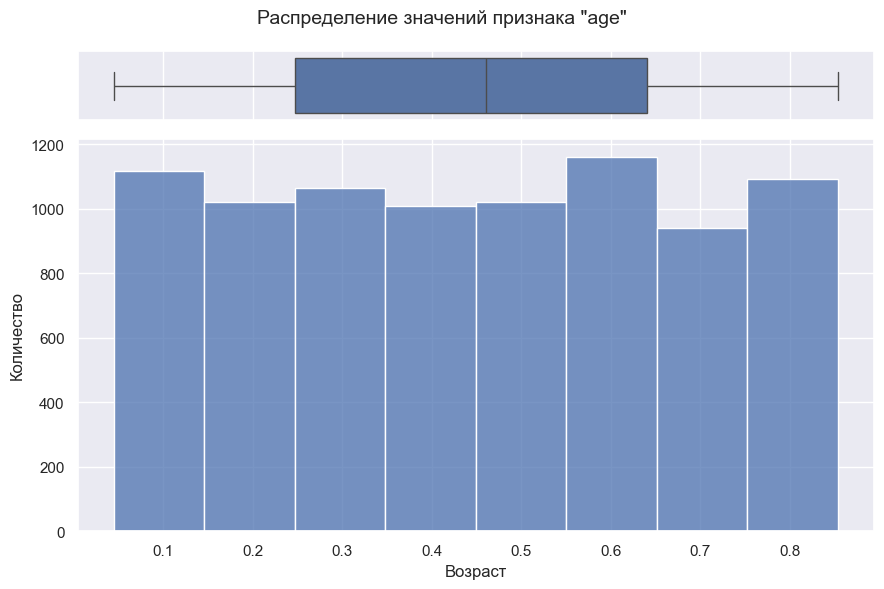

count    8430.000000
mean        0.448878
std         0.232903
min         0.044944
25%         0.247191
50%         0.460674
75%         0.640449
max         0.853933
Name: age, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 77.77127327405287
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [41]:
# Вывод графика для анализа
analyzis_quantity(df_train['age'], 'Распределение значений признака "age"', 
                  x_label='Возраст', y_label='Количество', num=8)

Значения признака **"age"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.64**
* Минимальное значение - **0.04**
* Среднее значение - **0.46**
* Максимальное значение - **0.85**

##### Признак "cholesterol":

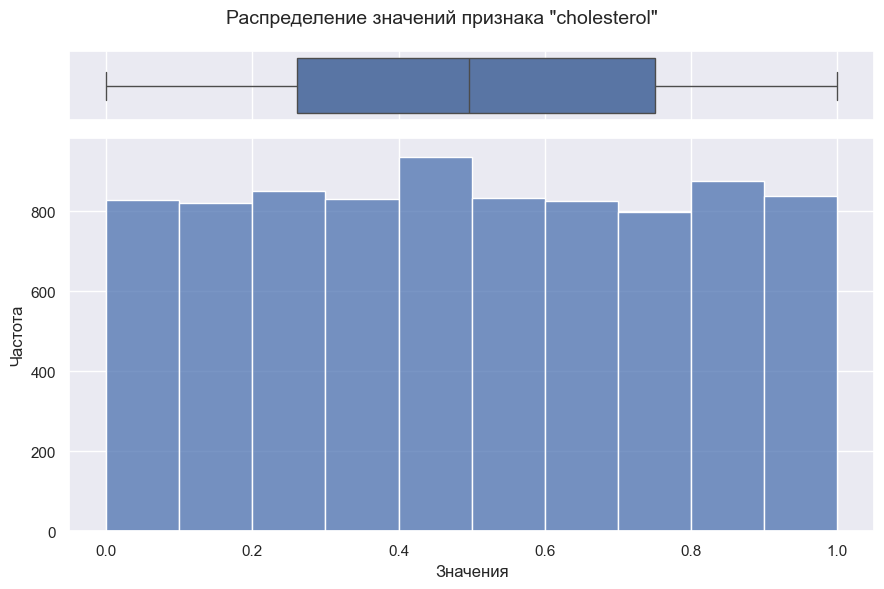

count    8430.000000
mean        0.501114
std         0.288786
min         0.000000
25%         0.260714
50%         0.496429
75%         0.750000
max         1.000000
Name: cholesterol, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 88.09115713652864
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [42]:
# Вывод графика для анализа
analyzis_quantity(df_train['cholesterol'], 'Распределение значений признака "cholesterol"', 
                  x_label='Значения', num=10)

Значения признака **"cholesterol"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.26** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

##### Признак "heart_rate":

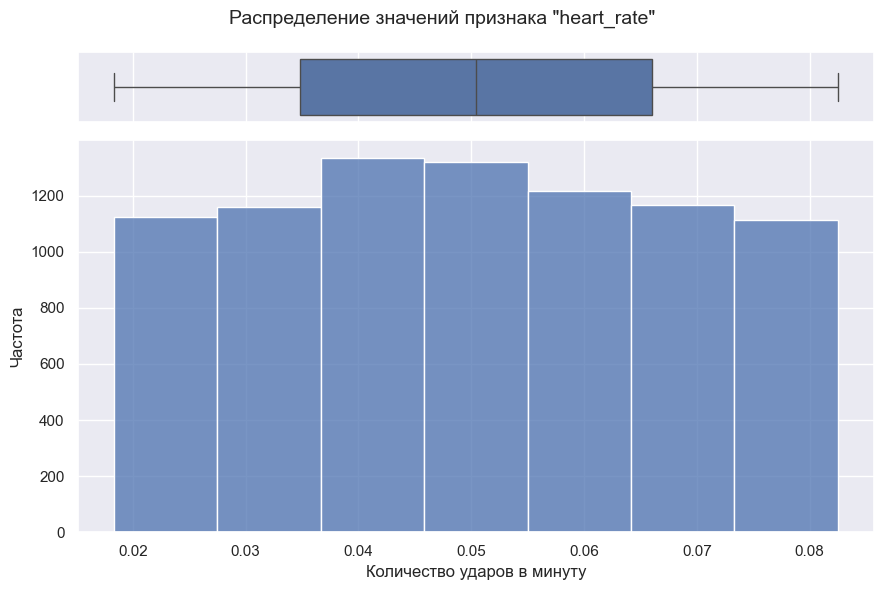

count    8430.000000
mean        0.050189
std         0.018447
min         0.018332
25%         0.034830
50%         0.050412
75%         0.065995
max         0.082493
Name: heart_rate, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 82.92731121557881
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [43]:
# Вывод графика для анализа
analyzis_quantity(df_train['heart_rate'], 'Распределение значений признака "heart_rate"', 
                  x_label='Количество ударов в минуту', num=7)

Значения признака **"heart_rate"** ассиметричное распределение с резкими обрывами, имеет слабовыявленный пик на средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.03** до **0.07**
* Минимальное значение - **0.01**
* Среднее значение - **0.05**
* Максимальное значение - **0.08**

##### Признак "exercise_hours_per_week":

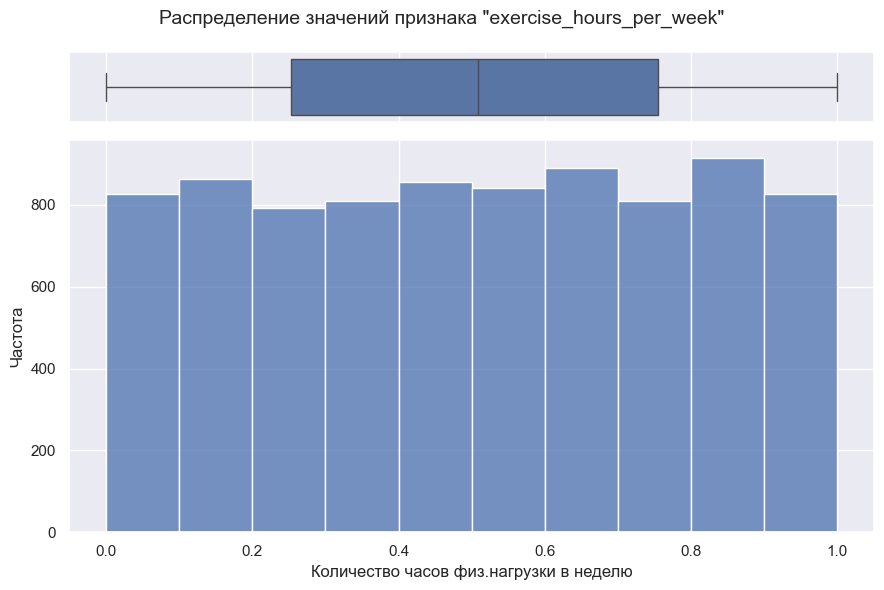

count    8430.000000
mean        0.503397
std         0.288867
min         0.000000
25%         0.253462
50%         0.508178
75%         0.754854
max         1.000000
Name: exercise_hours_per_week, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 95.07222708678637
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [44]:
# Вывод графика для анализа
analyzis_quantity(df_train['exercise_hours_per_week'], 'Распределение значений признака "exercise_hours_per_week"', 
                  x_label='Количество часов физ.нагрузки в неделю', num=10)

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.5**
* Максимальное значение - **1**

##### Признак "sedentary_hours_per_day":

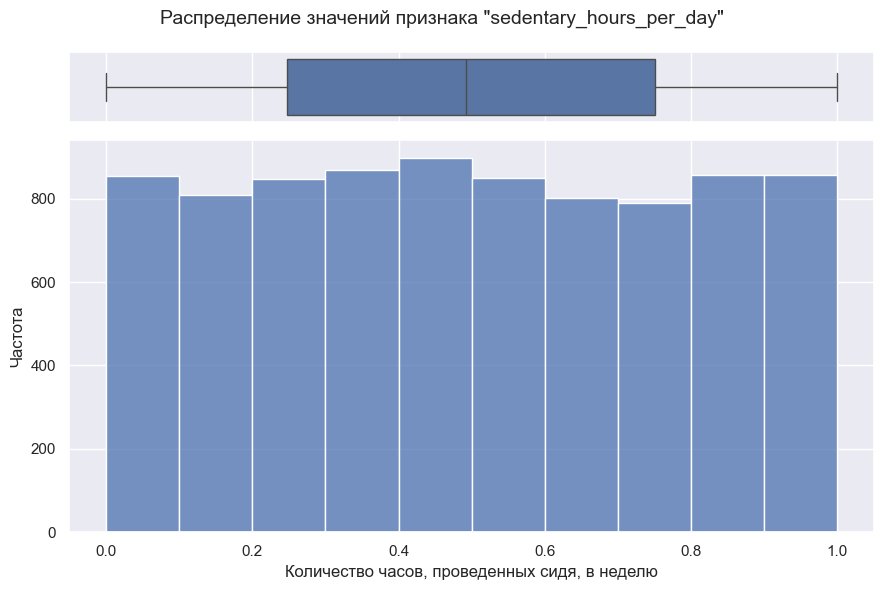

count    8430.000000
mean        0.499073
std         0.289362
min         0.000000
25%         0.247650
50%         0.492500
75%         0.750919
max         1.000000
Name: sedentary_hours_per_day, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 92.16557245796321
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [45]:
# Вывод графика для анализа
analyzis_quantity(df_train['sedentary_hours_per_day'], 'Распределение значений признака "sedentary_hours_per_day"', 
                  x_label='Количество часов, проведенных сидя, в неделю', num=10)

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

##### Признак "income":

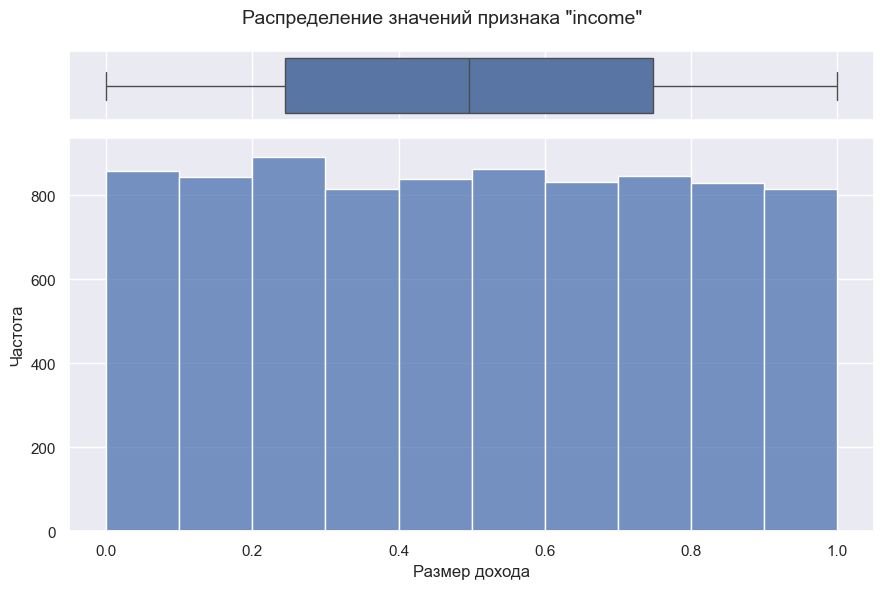

count    8430.000000
mean        0.496050
std         0.288833
min         0.000000
25%         0.244591
50%         0.495788
75%         0.747741
max         1.000000
Name: income, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 93.74297005932749
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [46]:
# Вывод графика для анализа
analyzis_quantity(df_train['income'], 'Распределение значений признака "income"', 
                  x_label='Размер дохода', num=10)

Значения признака **"income"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

##### Признак "bmi":

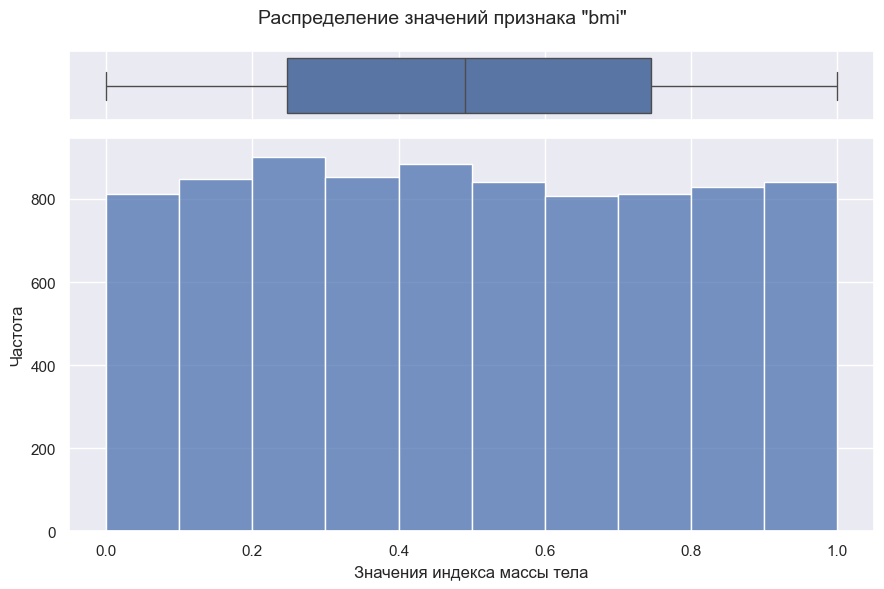

count    8430.000000
mean        0.497023
std         0.286637
min         0.000000
25%         0.248032
50%         0.490867
75%         0.744620
max         1.000000
Name: bmi, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 90.7874950244368
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [47]:
# Вывод графика для анализа
analyzis_quantity(df_train['bmi'], 'Распределение значений признака "bmi"', 
                  x_label='Значения индекса массы тела', num=10)

Значения признака **"bmi"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

##### Признак "triglycerides":

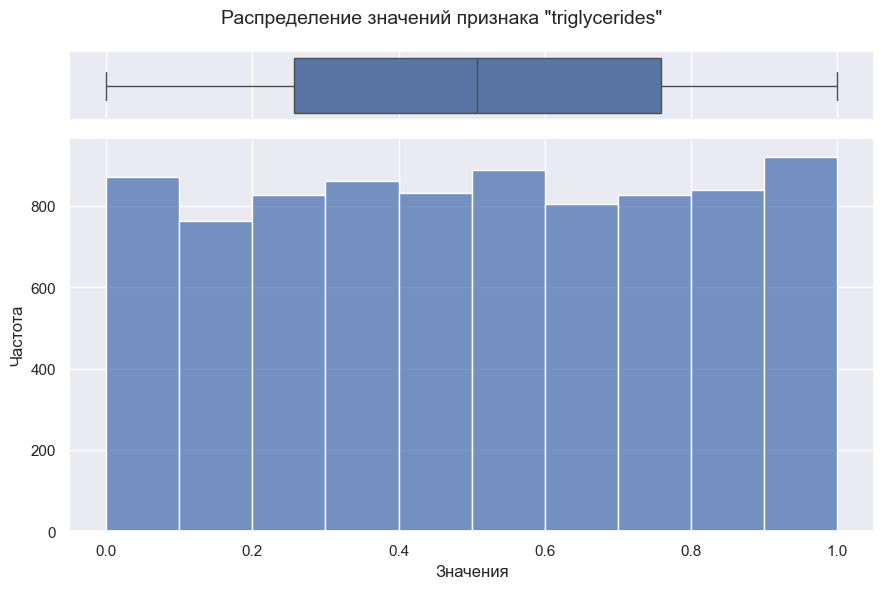

count    8430.000000
mean        0.505538
std         0.290354
min         0.000000
25%         0.257143
50%         0.507792
75%         0.758442
max         1.000000
Name: triglycerides, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 91.564155841912
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [48]:
# Вывод графика для анализа
analyzis_quantity(df_train['triglycerides'], 'Распределение значений признака "triglycerides"', 
                  x_label='Значения', num=10)

Значения признака **"triglycerides"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.5**
* Максимальное значение - **1**

##### Признак "sleep_hours_per_day":

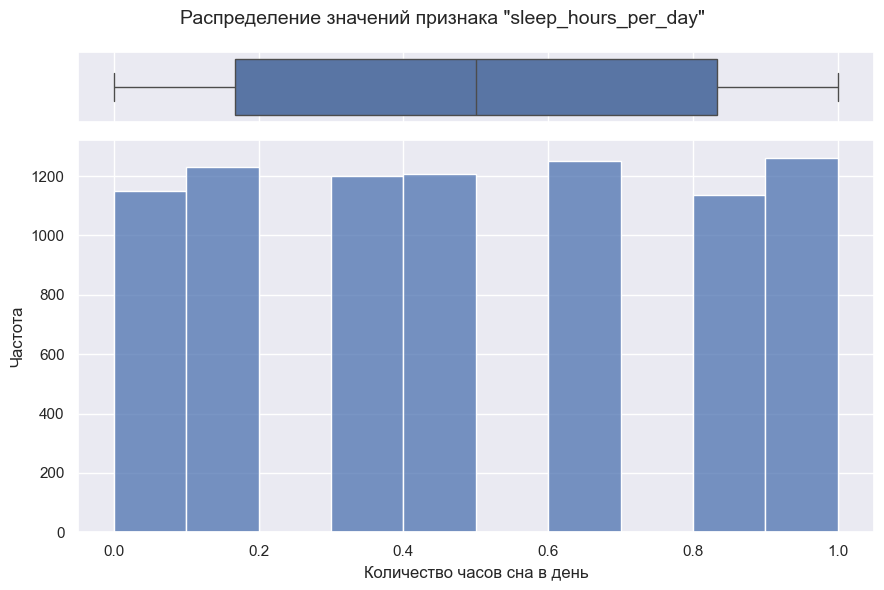

count    8430.000000
mean        0.503934
std         0.332692
min         0.000000
25%         0.166667
50%         0.500000
75%         0.833333
max         1.000000
Name: sleep_hours_per_day, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 197.21310407201418
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [49]:
# Вывод графика для анализа
analyzis_quantity(df_train['sleep_hours_per_day'], 'Распределение значений признака "sleep_hours_per_day"', 
                  x_label='Количество часов сна в день', num=10)

In [50]:
# Подсчет количества уникальных значений
df_train['sleep_hours_per_day'].value_counts().head(20)

sleep_hours_per_day
1.000000    1260
0.666667    1251
0.166667    1229
0.500000    1206
0.333333    1199
0.000000    1149
0.833333    1136
Name: count, dtype: int64

Данный признак можно определить, как категориальный, преобразуем данный признак.

In [51]:
# Округляем значения признака
for df in df_dict.values():
    df['sleep_hours_per_day'] = df['sleep_hours_per_day'].round(2)
    # Проверяем результат
    print(sorted(df['sleep_hours_per_day'].unique()))

[np.float64(0.0), np.float64(0.17), np.float64(0.33), np.float64(0.5), np.float64(0.67), np.float64(0.83), np.float64(1.0)]
[np.float64(0.0), np.float64(0.17), np.float64(0.33), np.float64(0.5), np.float64(0.67), np.float64(0.83), np.float64(1.0)]


In [52]:
# Карта преобразования значений
maps = {0.33: 2, 
        0.83: 5, 
        1.0: 6, 
        0.0: 0, 
        0.17: 1,
        0.67: 4, 
        0.5: 3}

In [53]:
# Преобразование признака
for df in df_dict.values():
    df['sleep_hours_per_day'] = df['sleep_hours_per_day'].map(maps)
    # Проверяем результат
    print(sorted(df_train['sleep_hours_per_day'].unique()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


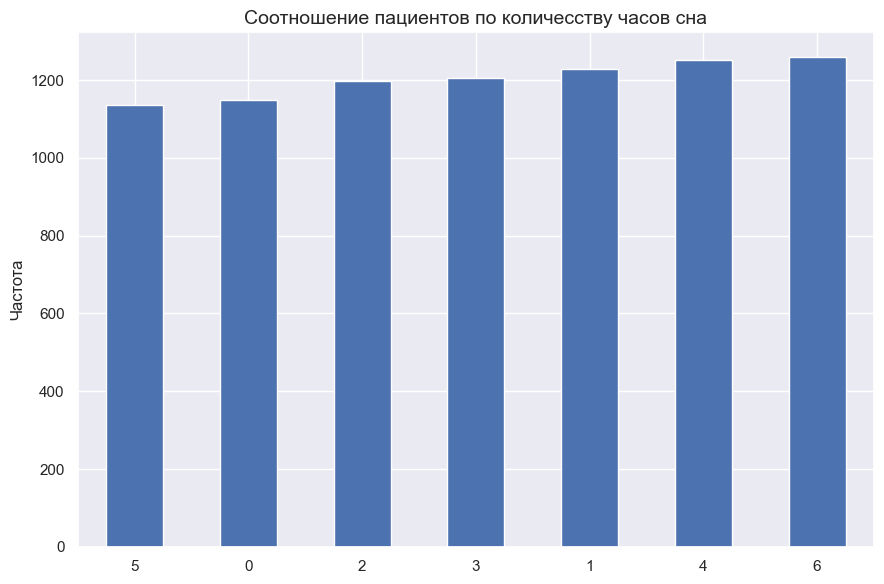

sleep_hours_per_day
5    1136
0    1149
2    1199
3    1206
1    1229
4    1251
6    1260
Name: count, dtype: int64


In [54]:
analyzis_category(df_train['sleep_hours_per_day'], 'Соотношение пациентов по количесству часов сна')

Соотношение пациентов по количеству сна примерно на одном уровне

* Наибольшее количество пациентов находятся в 6 категории (наибольшее количество сна);
* Наименьшее количество пациентов находится в 5 категории.

##### Признак "blood_sugar":

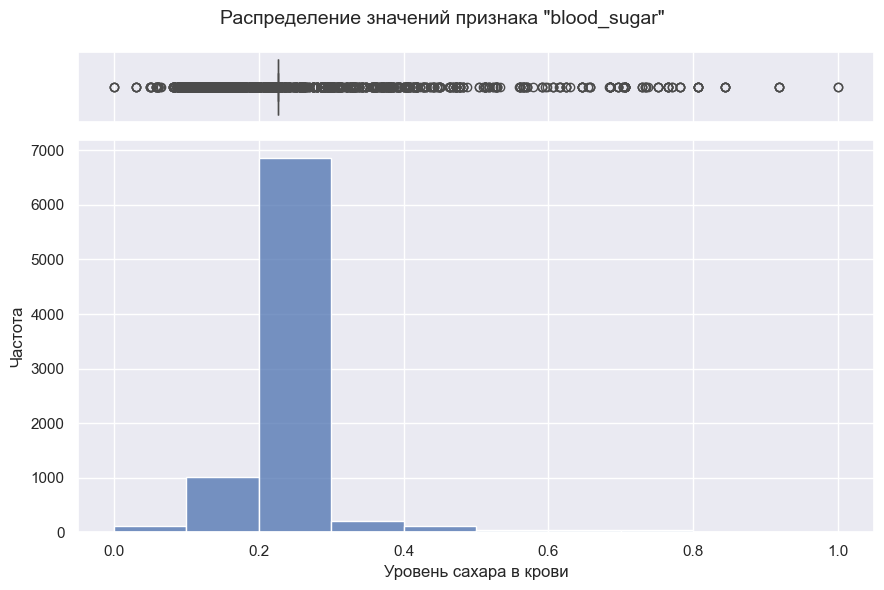

count    8430.000000
mean        0.228034
std         0.074625
min         0.000000
25%         0.227018
50%         0.227018
75%         0.227018
max         1.000000
Name: blood_sugar, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 1685.5600925785293
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [55]:
# Вывод графика для анализа
analyzis_quantity(df_train['blood_sugar'], 'Распределение значений признака "blood_sugar"', 
                  x_label='Уровень сахара в крови', num=10)

In [56]:
# Подсчет количества уникальных значений
df_train['blood_sugar'].value_counts().head(20)

blood_sugar
0.227018    6551
0.128458      52
0.102767      52
0.116601      49
0.124506      42
0.120553      37
0.136364      36
0.132411      29
0.158103      28
0.114625      28
0.134387      28
0.118577      27
0.126482      26
0.162055      25
0.195652      25
0.130435      24
0.122530      24
0.140316      22
0.142292      21
0.146245      21
Name: count, dtype: int64

Данный признак явно создан искусственно, константа нам может только навредить, так как у нас уже есть признак **"diabets"**, то он будет указывать на проблемы с сахаром в крови, данный признак удаляем.

In [57]:
# Удаление признака "blood_sugar"
for df in df_dict.values():
    df.drop('blood_sugar', axis=1, inplace=True)

##### Признак "systolic_blood_pressure":

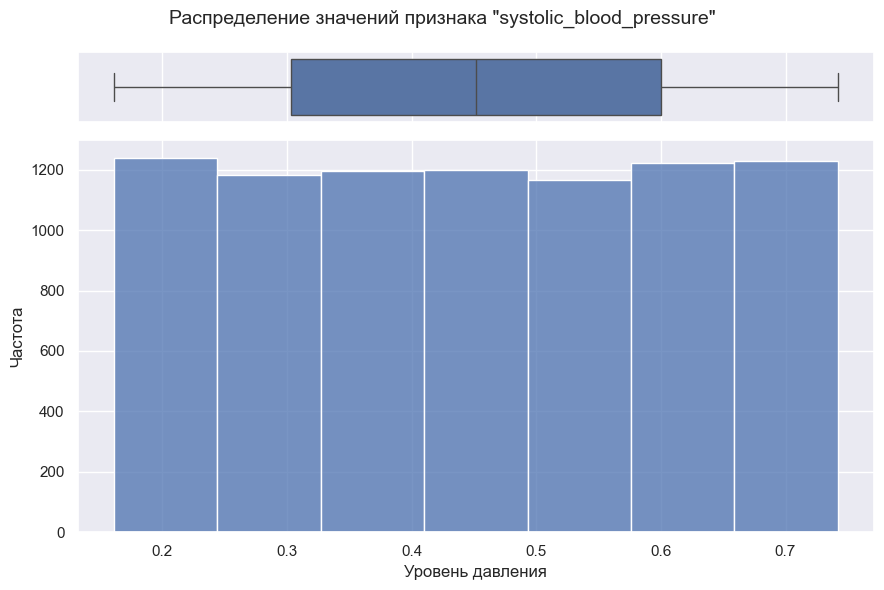

count    8430.000000
mean        0.451990
std         0.170136
min         0.161290
25%         0.303226
50%         0.451613
75%         0.600000
max         0.741935
Name: systolic_blood_pressure, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 101.201231282359
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [58]:
# Вывод графика для анализа
analyzis_quantity(df_train['systolic_blood_pressure'], 'Распределение значений признака "systolic_blood_pressure"', 
                  x_label='Уровень давления', num=7)

Значения признака **"systolic_blood_pressure"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.3** до **0.6**
* Минимальное значение - **0.16**
* Среднее значение - **0.45**
* Максимальное значение - **0.74**

##### Признак "diastolic_blood_pressure":

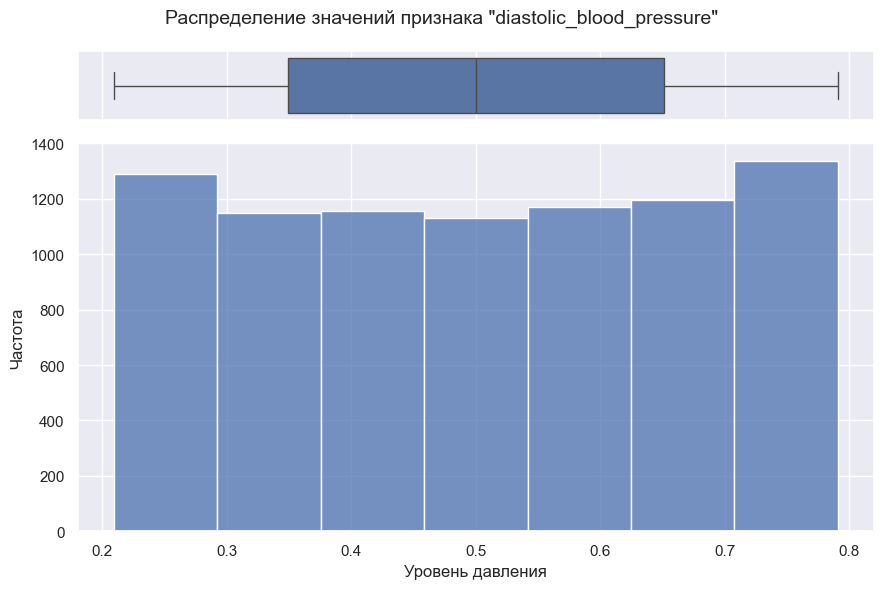

count    8430.000000
mean        0.501691
std         0.170297
min         0.209302
25%         0.348837
50%         0.500000
75%         0.651163
max         0.790698
Name: diastolic_blood_pressure, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 98.80837044344298
Критические значения: [0.576 0.656 0.787 0.918 1.091]
Распределение не является нормальным.


In [59]:
# Вывод графика для анализа
analyzis_quantity(df_train['diastolic_blood_pressure'], 'Распределение значений признака "diastolic_blood_pressure"', 
                  x_label='Уровень давления', num=7)

Значения признака **"diastolic_blood_pressure"** имеет вогнутое распределение. Выбросы отсутствуют.

* Основной диапозон значений - от **0.34** до **0.65**
* Минимальное значение - **0.2**
* Среднее значение - **0.5**
* Максимальное значение - **0.79**

#### Категориальные признаки:

##### Признак "diabetes":

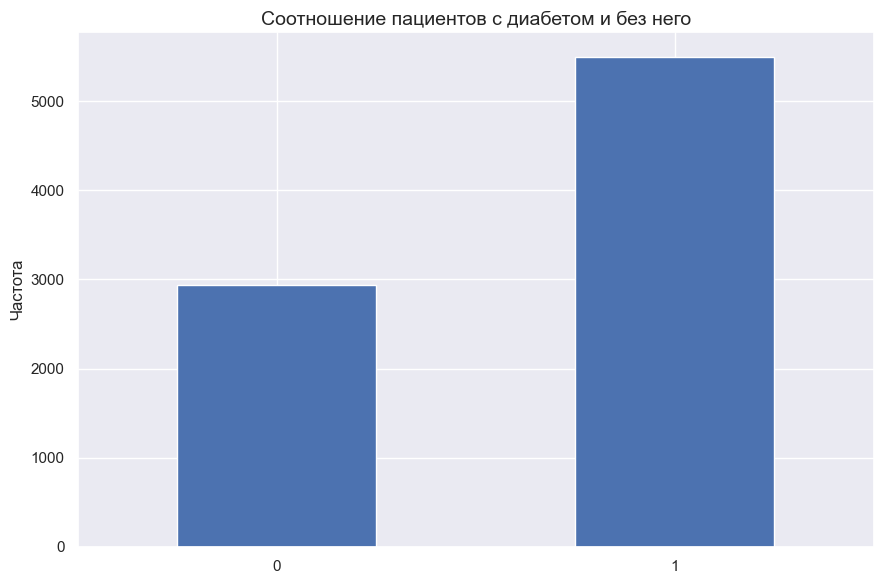

diabetes
0    2933
1    5497
Name: count, dtype: int64


In [60]:
analyzis_category(df_train['diabetes'], 'Соотношение пациентов с диабетом и без него')

Соотношение пациентов с диабетом и без него **2:1** соответственно.

##### Признак "family_history":

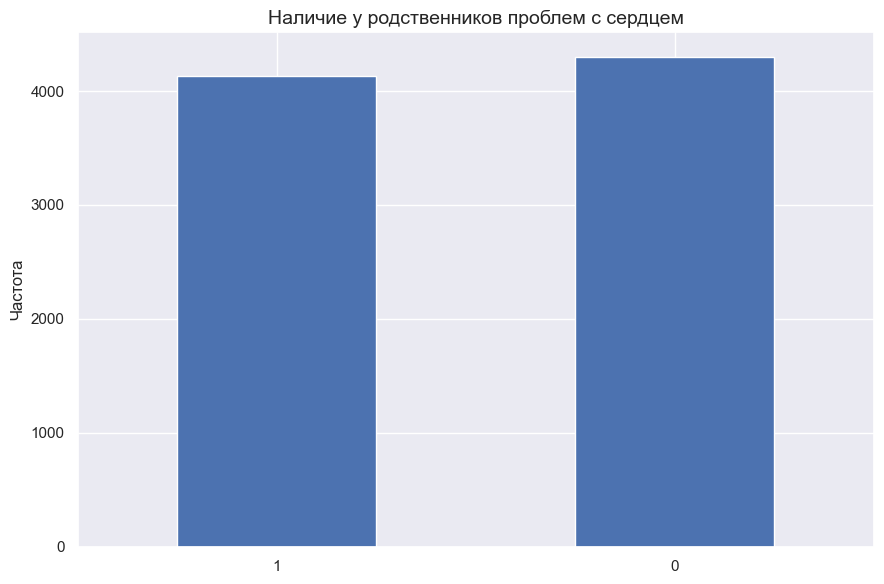

family_history
1    4130
0    4300
Name: count, dtype: int64


In [61]:
analyzis_category(df_train['family_history'], 'Наличие у родственников проблем с сердцем')

Соотношение людей, у который родственники имеют проблемы с сердцем и нет **1:1**.

##### Признак "smoking":

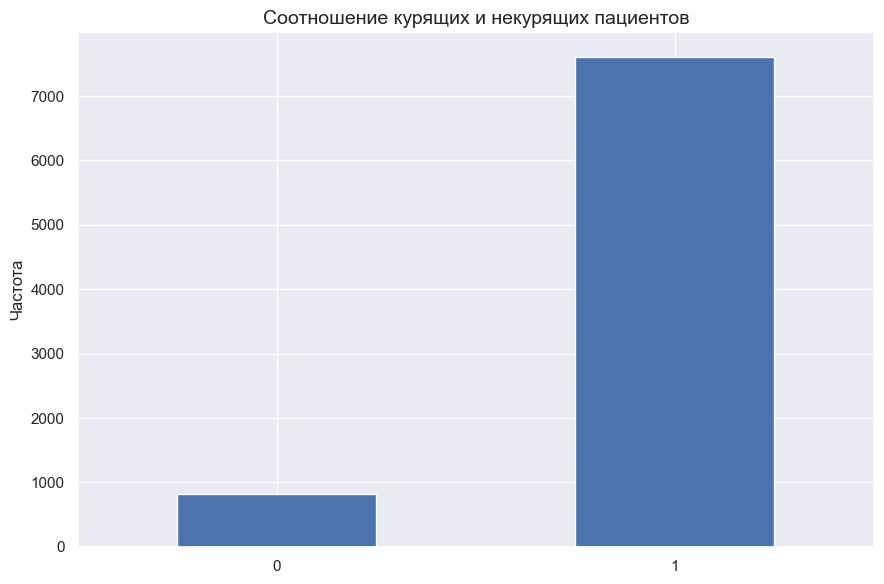

smoking
0     820
1    7610
Name: count, dtype: int64


In [62]:
analyzis_category(df_train['smoking'], 'Соотношение курящих и некурящих пациентов')

Соотношение курящих и некурящих пациентов **9:1** соответственно.

##### Признак "obesity":

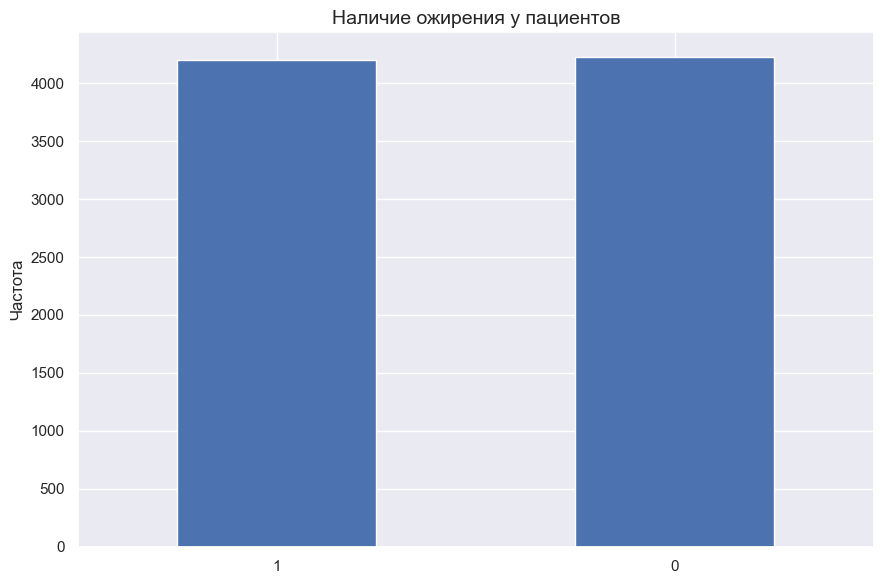

obesity
1    4203
0    4227
Name: count, dtype: int64


In [63]:
analyzis_category(df_train['obesity'], 'Наличие ожирения у пациентов')

Соотношение пациентов с ожирением и без **1:1**.

##### Признак "alcohol_consumption":

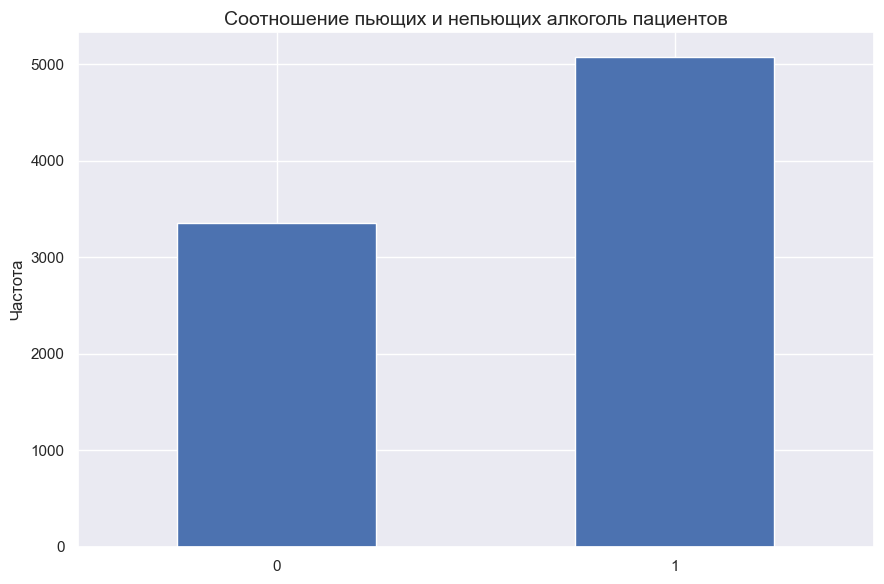

alcohol_consumption
0    3355
1    5075
Name: count, dtype: int64


In [64]:
analyzis_category(df_train['alcohol_consumption'], 'Соотношение пьющих и непьющих алкоголь пациентов')

Соотношение пьющих и непьющих алкоголь пациентов **3:2** соответственно.

##### Признак "diet":

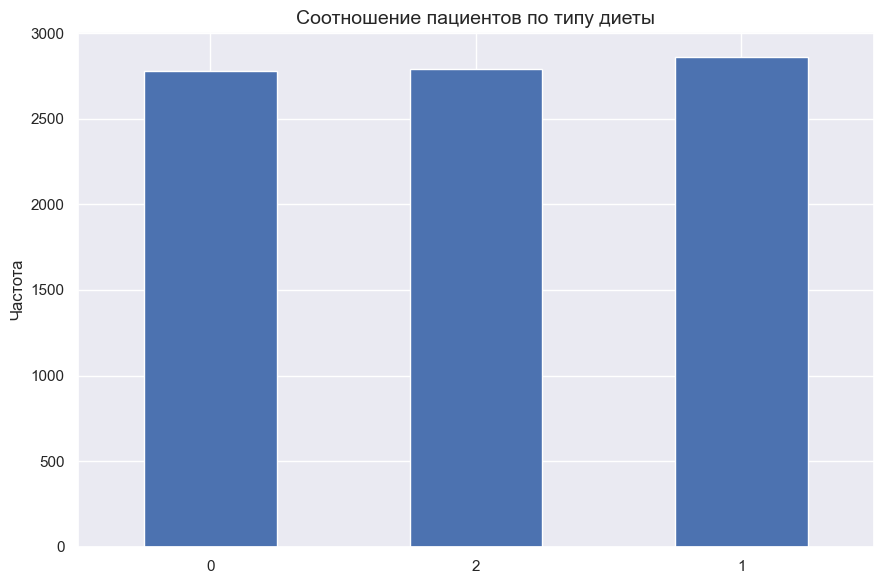

diet
0    2778
2    2791
1    2861
Name: count, dtype: int64


In [65]:
analyzis_category(df_train['diet'], 'Соотношение пациентов по типу диеты')

Соотношение пациентов по типу диеты **1:1:1**.

##### Признак "previous_heart_problems":

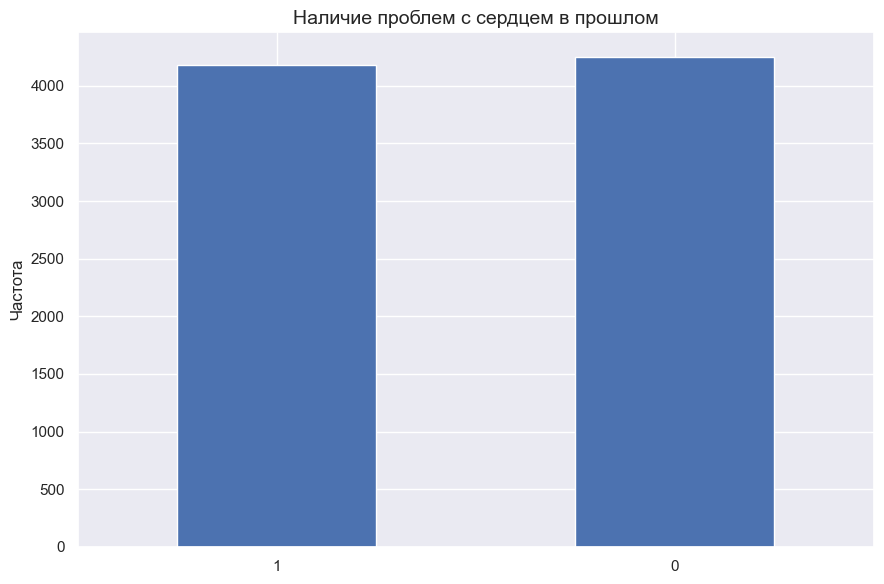

previous_heart_problems
1    4178
0    4252
Name: count, dtype: int64


In [66]:
analyzis_category(df_train['previous_heart_problems'], 'Наличие проблем с сердцем в прошлом')

Соотношение пациентов с наличием проблем с сердцем в прошлом и нет **1:1**.

##### Признак "medication_use":

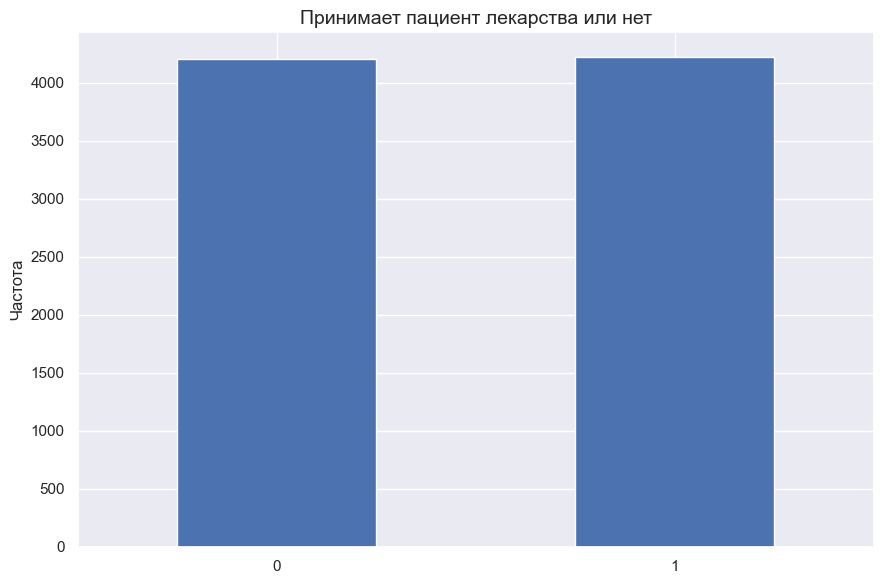

medication_use
0    4206
1    4224
Name: count, dtype: int64


In [67]:
analyzis_category(df_train['medication_use'], 'Принимает пациент лекарства или нет')

Соотношение пациентов, принимающих уже лекарства и нет **1:1**.

##### Признак "stress_level":

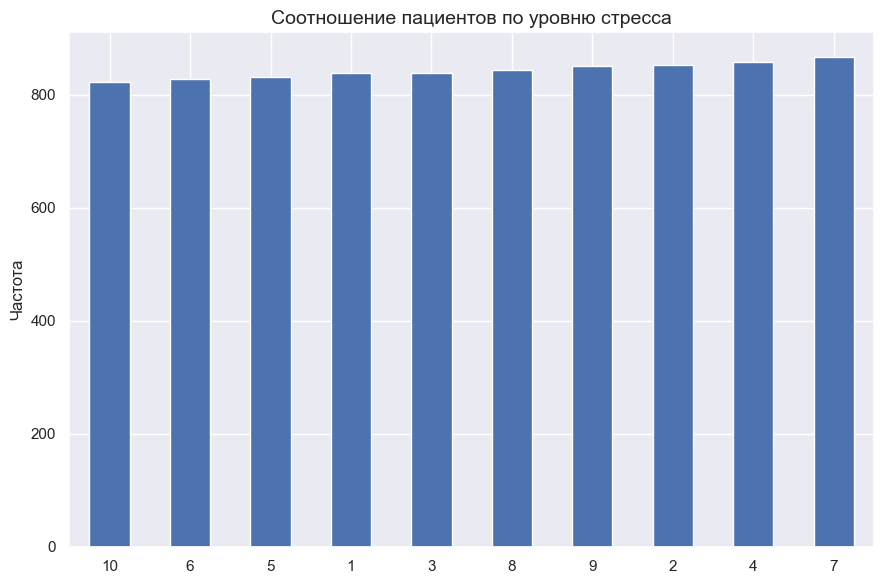

stress_level
10    823
6     827
5     832
1     838
3     839
8     843
9     851
2     853
4     857
7     867
Name: count, dtype: int64


In [68]:
analyzis_category(df_train['stress_level'], 'Соотношение пациентов по уровню стресса')

Соотношение пациентов по уровням стресса приблизительно равно 1:1. 

* Меньше всего пациентов с 10 уровнем стресса. 
* Больше всего с 7 уровнем стресса.

##### Признак "physical_activity_days_per_week":

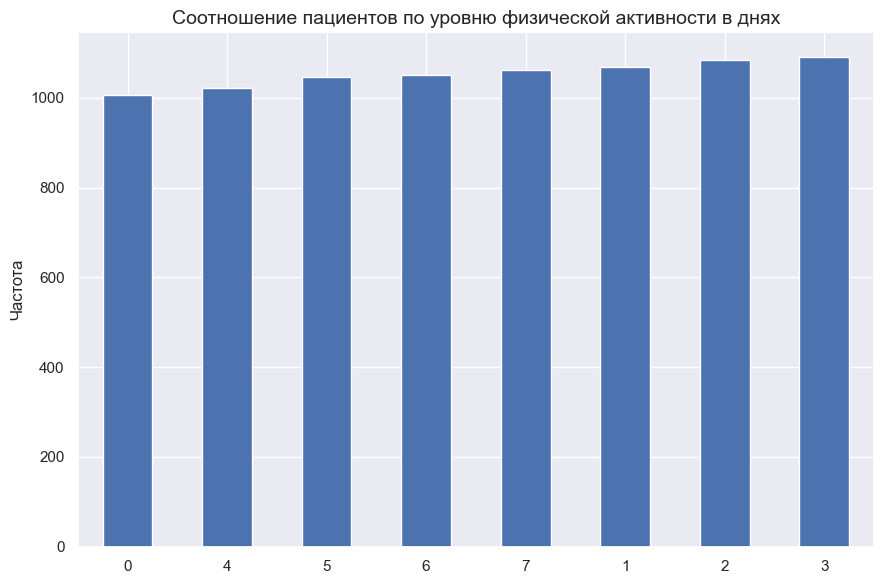

physical_activity_days_per_week
0    1005
4    1022
5    1046
6    1051
7    1062
1    1069
2    1084
3    1091
Name: count, dtype: int64


In [69]:
analyzis_category(df_train['physical_activity_days_per_week'], 'Соотношение пациентов по уровню физической активности в днях')

Пациенты по количеству дней с физической активностью распределены приблизительно поровну.

* Меньше всего пациентов без физической активности.
* Больше всего пациентов, у которых 3 дня с физической активностью.

##### Признак "heart_attack_risk_(binary)":

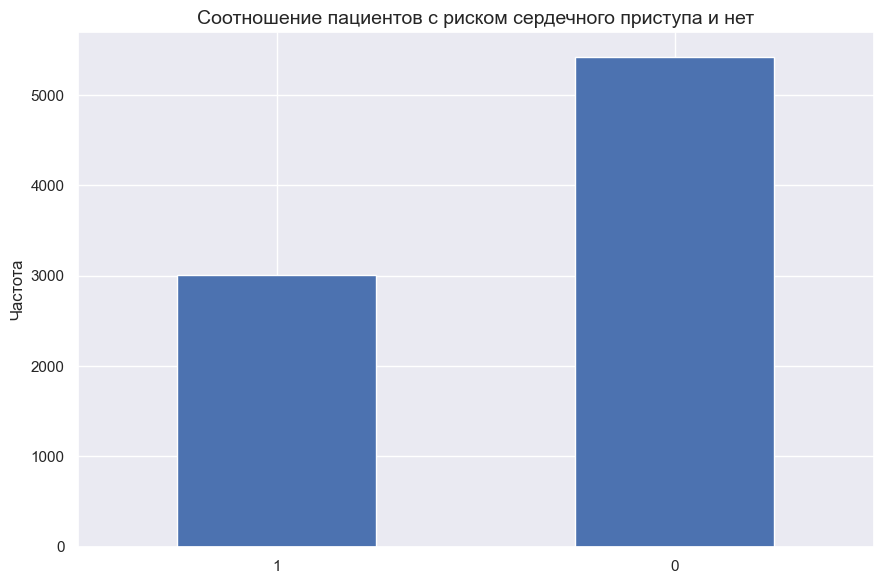

heart_attack_risk_(binary)
1    3007
0    5423
Name: count, dtype: int64


In [70]:
analyzis_category(df_train['heart_attack_risk_(binary)'], 'Соотношение пациентов с риском сердечного приступа и нет')

Соотношение пациентов с риском сердечного приступа и нет **1:2** соотвественно.

##### Признак "gender":

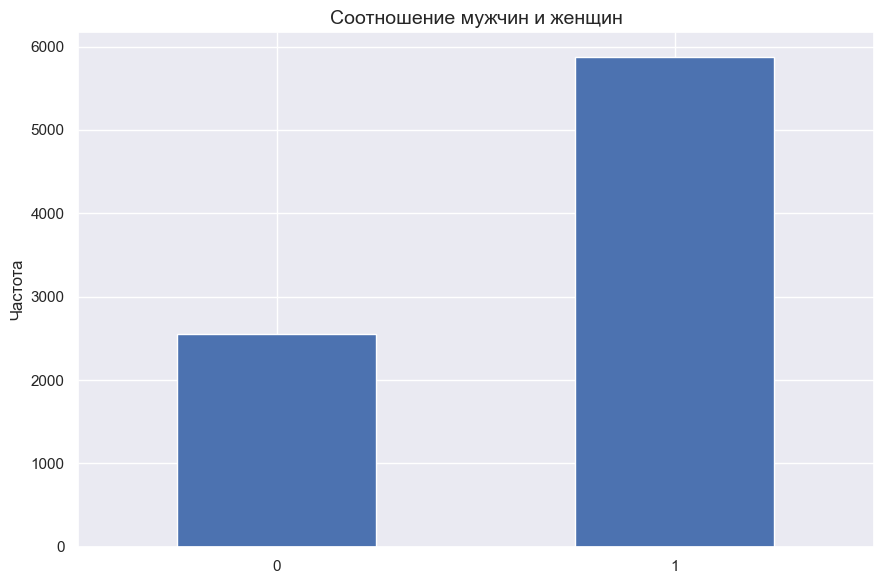

gender
0    2553
1    5877
Name: count, dtype: int64


In [71]:
analyzis_category(df_train['gender'], 'Соотношение мужчин и женщин')

Соотношение мужчин и женщин **2:1** соответственно.

### Датафрейм "df_test":

#### Количественные признаки:

In [72]:
# Список количественных признаков
num_col = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 
           'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 
           'systolic_blood_pressure', 'diastolic_blood_pressure']

In [73]:
# Общая описательная статистика количественных признаков
desc_test = df_test[num_col].describe().T
# Подсчет коэффициента вариативности значений
desc_test['cv_coef'] = desc_test['std'] / desc_test['mean']
# Вывод результата
display(desc_test)

count      mean       std       min       25%  \
age                       935.0  0.452106  0.233873  0.044944  0.235955   
cholesterol               935.0  0.487796  0.286674  0.000000  0.235714   
heart_rate                935.0  0.050624  0.018031  0.018332  0.036664   
exercise_hours_per_week   935.0  0.490327  0.289584  0.000336  0.235647   
sedentary_hours_per_day   935.0  0.506941  0.292561  0.001187  0.247833   
income                    935.0  0.484060  0.278380  0.003351  0.256395   
bmi                       935.0  0.476200  0.296775  0.002598  0.211395   
triglycerides             935.0  0.486127  0.289200  0.000000  0.243506   
systolic_blood_pressure   935.0  0.449722  0.171918  0.161290  0.296774   
diastolic_blood_pressure  935.0  0.500759  0.173262  0.209302  0.348837   

                               50%       75%       max   cv_coef  
age                       0.460674  0.651685  0.853933  0.517296  
cholesterol               0.485714  0.723214  0.996429  0.587692  
heart_rate                0.050412  0.065995  0.082493  0.356176  
exercise_hours_per_week   0.493305  0.739898  0.998938  0.590593  
sedentary_hours_per_day   0.518151  0.767566  0.999033  0.577110  
income                    0.482586  0.721821  0.998885  0.575094  
bmi                       0.456156  0.734170  0.999496  0.623214  
triglycerides             0.471429  0.732468  0.998701  0.594907  
systolic_blood_pressure   0.458065  0.600000  0.741935  0.382276  
diastolic_blood_pressure  0.500000  0.651163  0.790698  0.345998

На данном этапе аномалий в значениях тестовой выборки не наблюдается.

##### Признак "age":

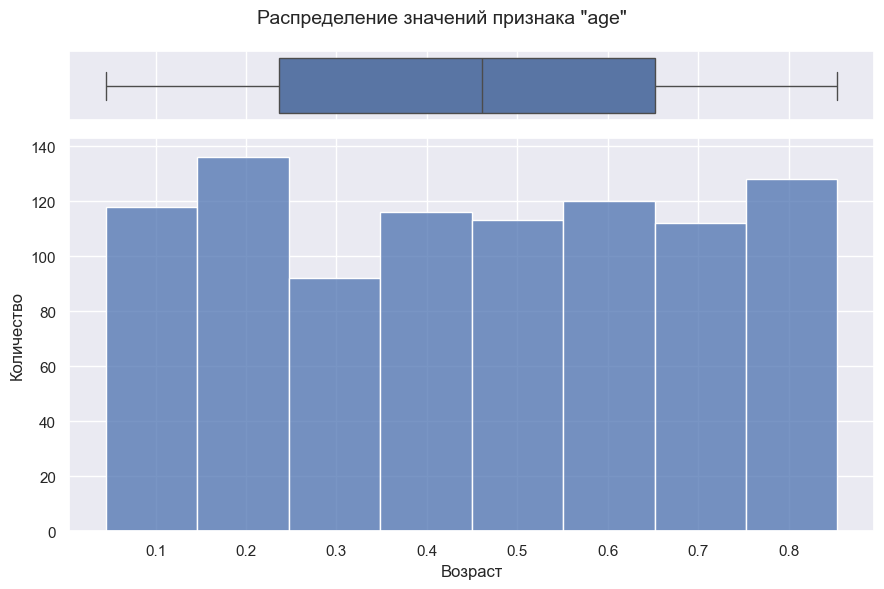

count    935.000000
mean       0.452106
std        0.233873
min        0.044944
25%        0.235955
50%        0.460674
75%        0.651685
max        0.853933
Name: age, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 10.617012583089036
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [74]:
# Вывод графика для анализа
analyzis_quantity(df_test['age'], 'Распределение значений признака "age"', 
                  x_label='Возраст', y_label='Количество', num=8)

Значения признака **"age"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.65**
* Минимальное значение - **0.04**
* Среднее значение - **0.46**
* Максимальное значение - **0.85**

Значимой разницы с тренировочной выборкой не наблюдается.

##### Признак "cholesterol":

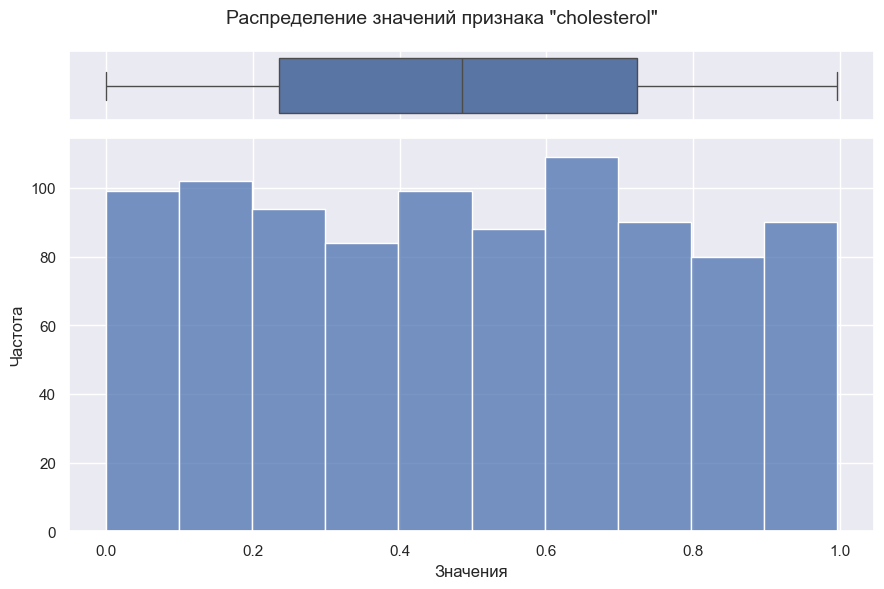

count    935.000000
mean       0.487796
std        0.286674
min        0.000000
25%        0.235714
50%        0.485714
75%        0.723214
max        0.996429
Name: cholesterol, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 10.101365490729336
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [75]:
# Вывод графика для анализа
analyzis_quantity(df_test['cholesterol'], 'Распределение значений признака "cholesterol"', 
                  x_label='Значения', num=10)

Значения признака **"cholesterol"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.72**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **0.99**

Значимой разницы с тренировочной выборкой не наблюдается.

##### Признак "heart_rate":

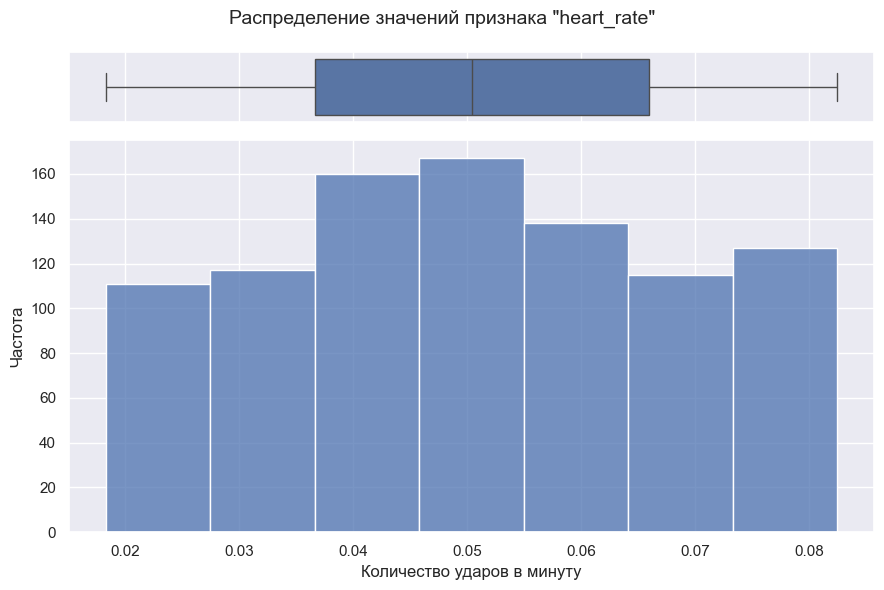

count    935.000000
mean       0.050624
std        0.018031
min        0.018332
25%        0.036664
50%        0.050412
75%        0.065995
max        0.082493
Name: heart_rate, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 7.0280563590961265
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [76]:
# Вывод графика для анализа
analyzis_quantity(df_test['heart_rate'], 'Распределение значений признака "heart_rate"', 
                  x_label='Количество ударов в минуту', num=7)

Значения признака **"heart_rate"** ассиметричное распределение с резкими обрывами, имеет пик на средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.04** до **0.07**
* Минимальное значение - **0.01**
* Среднее значение - **0.05**
* Максимальное значение - **0.08**

В тестовой выборке больше пациентов с средними значениями частоты сердцебиения.

##### Признак "exercise_hours_per_week":

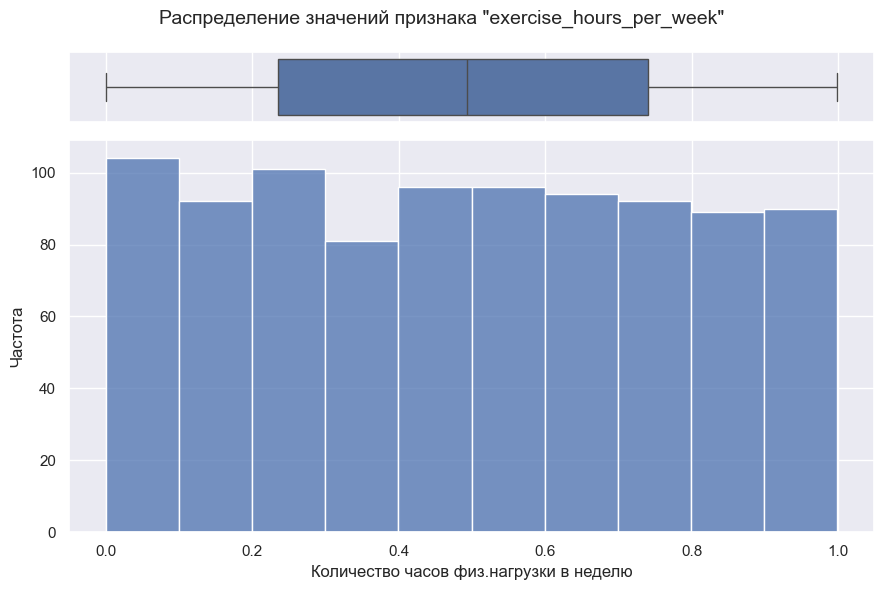

count    935.000000
mean       0.490327
std        0.289584
min        0.000336
25%        0.235647
50%        0.493305
75%        0.739898
max        0.998938
Name: exercise_hours_per_week, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 10.912389905514488
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [77]:
# Вывод графика для анализа
analyzis_quantity(df_test['exercise_hours_per_week'], 'Распределение значений признака "exercise_hours_per_week"', 
                  x_label='Количество часов физ.нагрузки в неделю', num=10)

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0.0003**
* Среднее значение - **0.5**
* Максимальное значение - **0.99**

Значимого отличия с тренировочной выборкой не наблюдается.

##### Признак "sedentary_hours_per_day":

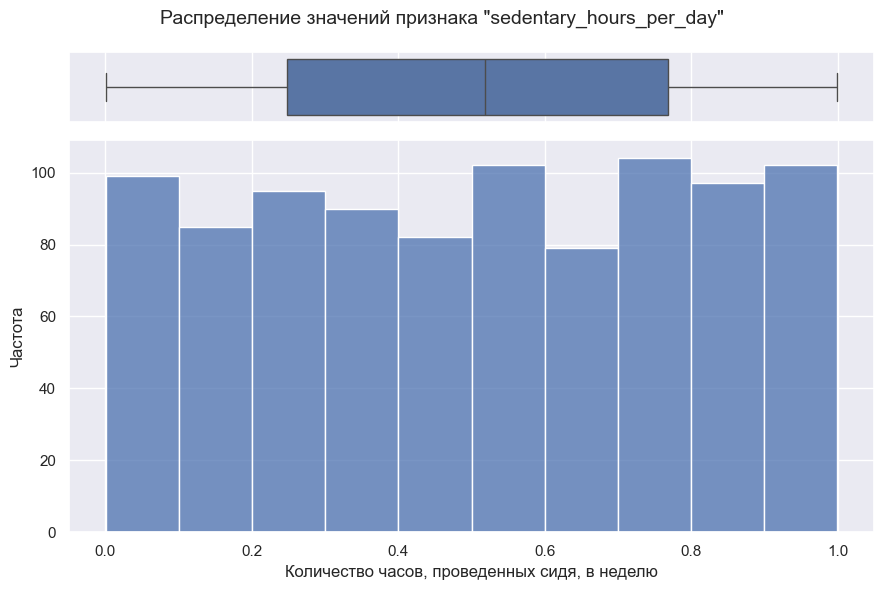

count    935.000000
mean       0.506941
std        0.292561
min        0.001187
25%        0.247833
50%        0.518151
75%        0.767566
max        0.999033
Name: sedentary_hours_per_day, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 11.699164039965353
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [78]:
# Вывод графика для анализа
analyzis_quantity(df_test['sedentary_hours_per_day'], 'Распределение значений признака "sedentary_hours_per_day"', 
                  x_label='Количество часов, проведенных сидя, в неделю', num=10)

Значения признака **"exercise_hours_per_week"** распределены равномерно с отклонениями в **~15%** от средних значений. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.77**
* Минимальное значение - **0.001**
* Среднее значение - **0.52**
* Максимальное значение - **0.99**

Значимой разницы с тренировочной выборкой не наблюдается.

##### Признак "income":

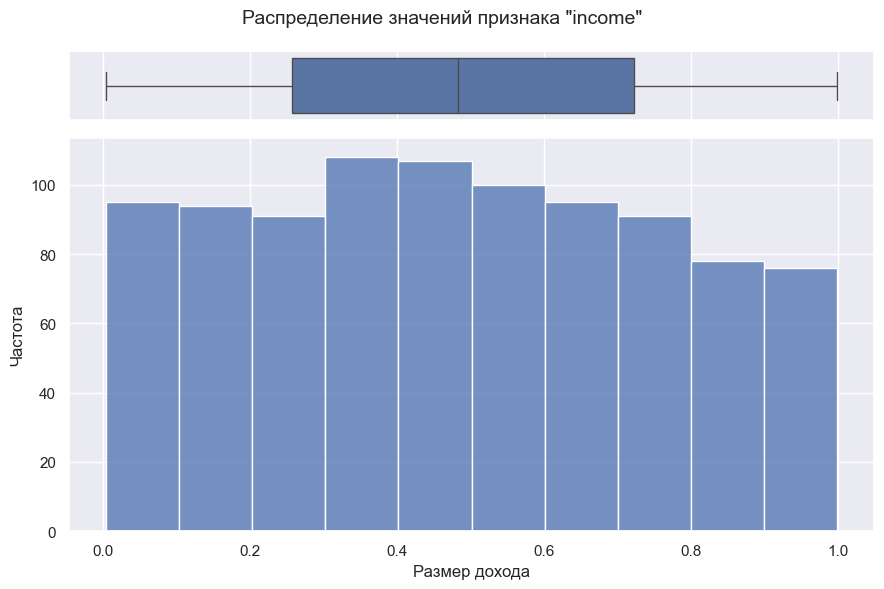

count    935.000000
mean       0.484060
std        0.278380
min        0.003351
25%        0.256395
50%        0.482586
75%        0.721821
max        0.998885
Name: income, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 7.4065340312286025
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [79]:
# Вывод графика для анализа
analyzis_quantity(df_test['income'], 'Распределение значений признака "income"', 
                  x_label='Размер дохода', num=10)

Значения признака **"income"** имеют асимметричное распределение с 2 пиками в минимальных и средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.26** до **0.72**
* Минимальное значение - **0.003**
* Среднее значение - **0.48**
* Максимальное значение - **0.99**

В тестовой выборке данный признак распределен менее равномерно, на предсказательную способность модели это не повлияет.

##### Признак "bmi":

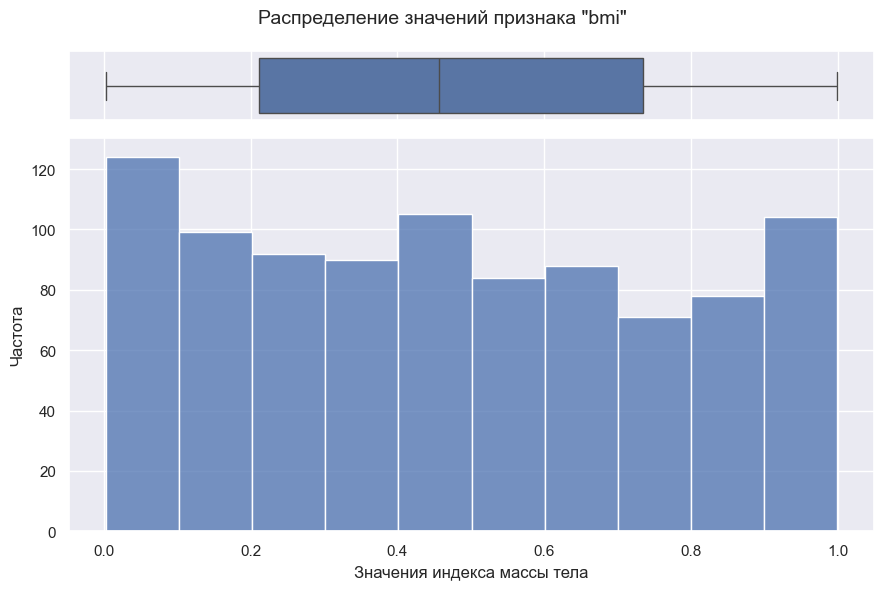

count    935.000000
mean       0.476200
std        0.296775
min        0.002598
25%        0.211395
50%        0.456156
75%        0.734170
max        0.999496
Name: bmi, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 11.981099638841215
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [80]:
# Вывод графика для анализа
analyzis_quantity(df_test['bmi'], 'Распределение значений признака "bmi"', 
                  x_label='Значения индекса массы тела', num=10)

Значения признака **"bmi"** имеют вогнутое распределение с 3 пиками, по краями и один в средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.21** до **0.73**
* Минимальное значение - **0.003**
* Среднее значение - **0.46**
* Максимальное значение - **0.99**

В тестовой выборке данный признак имеет другое распределение, но на предсказательную способность модели это не повлияет.

##### Признак "triglycerides":

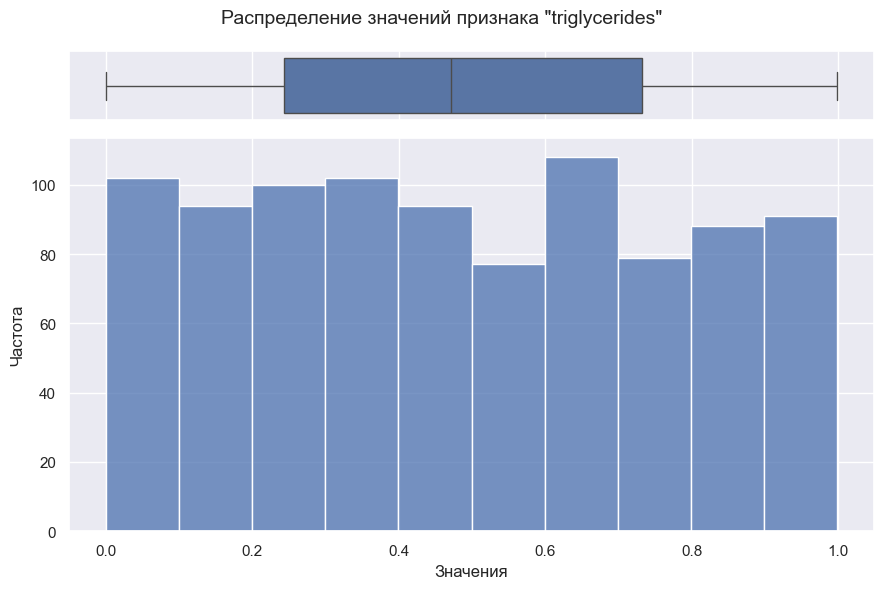

count    935.000000
mean       0.486127
std        0.289200
min        0.000000
25%        0.243506
50%        0.471429
75%        0.732468
max        0.998701
Name: triglycerides, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 10.398390002695123
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [81]:
# Вывод графика для анализа
analyzis_quantity(df_test['triglycerides'], 'Распределение значений признака "triglycerides"', 
                  x_label='Значения', num=10)

Значения признака **"triglycerides"** распределены равномерно с отклонениями в **~15%** от средних значений. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.73**
* Минимальное значение - **0**
* Среднее значение - **0.47**
* Максимальное значение - **0.99**

Значимого отличия с тренировочной выборкой не наблюдается.

##### Признак "systolic_blood_pressure":

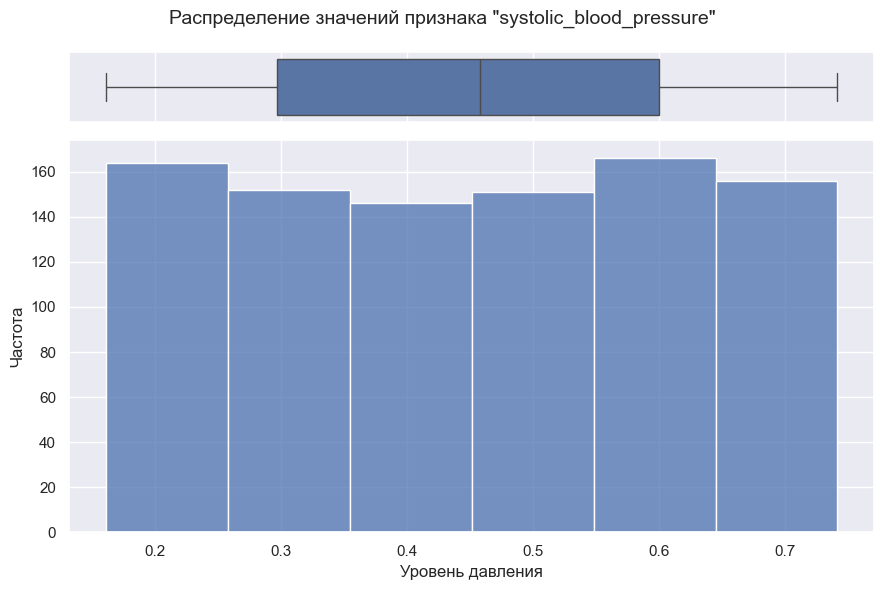

count    935.000000
mean       0.449722
std        0.171918
min        0.161290
25%        0.296774
50%        0.458065
75%        0.600000
max        0.741935
Name: systolic_blood_pressure, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 12.399159908225442
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [82]:
# Вывод графика для анализа
analyzis_quantity(df_test['systolic_blood_pressure'], 'Распределение значений признака "systolic_blood_pressure"', 
                  x_label='Уровень давления', num=6)

Значения признака **"systolic_blood_pressure"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.3** до **0.6**
* Минимальное значение - **0.16**
* Среднее значение - **0.46**
* Максимальное значение - **0.74**

Значимого отличия от распределения в тренировочной выборке не наблюдается.

##### Признак "diastolic_blood_pressure":

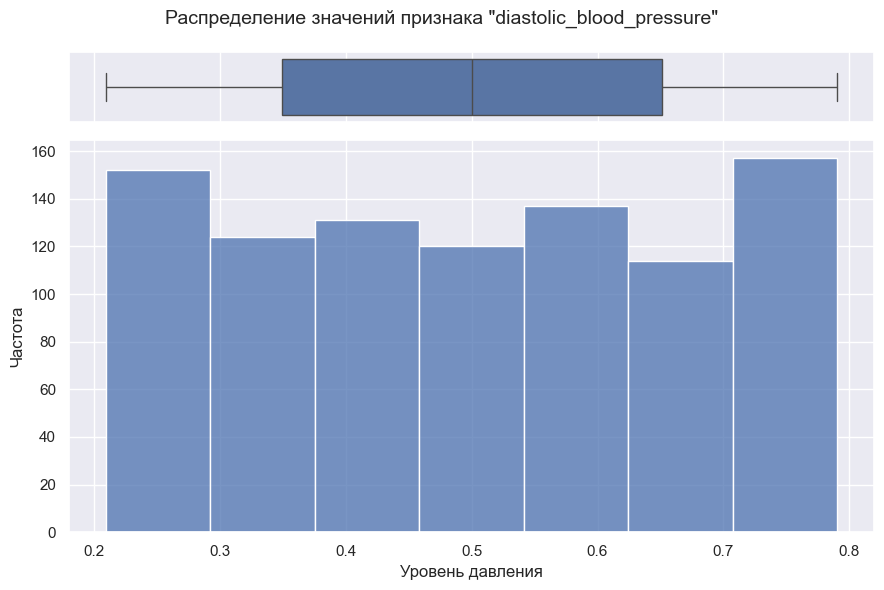

count    935.000000
mean       0.500759
std        0.173262
min        0.209302
25%        0.348837
50%        0.500000
75%        0.651163
max        0.790698
Name: diastolic_blood_pressure, dtype: float64

Тест на нормальность распределения (порог=0.05):
------------------------------------------------
Статистика: 11.33256232310407
Критические значения: [0.574 0.653 0.784 0.914 1.087]
Распределение не является нормальным.


In [83]:
# Вывод графика для анализа
analyzis_quantity(df_test['diastolic_blood_pressure'], 'Распределение значений признака "diastolic_blood_pressure"', 
                  x_label='Уровень давления', num=7)

Значения признака **"diastolic_blood_pressure"** имеет вогнутое распределение. Выбросы отсутствуют.

* Основной диапозон значений - от **0.35** до **0.65**
* Минимальное значение - **0.21**
* Среднее значение - **0.5**
* Максимальное значение - **0.79**

Значимого отличия от распределения в тренировочной выборке не наблюдается.

#### Категориальные признаки:

##### Признак "diabetes":

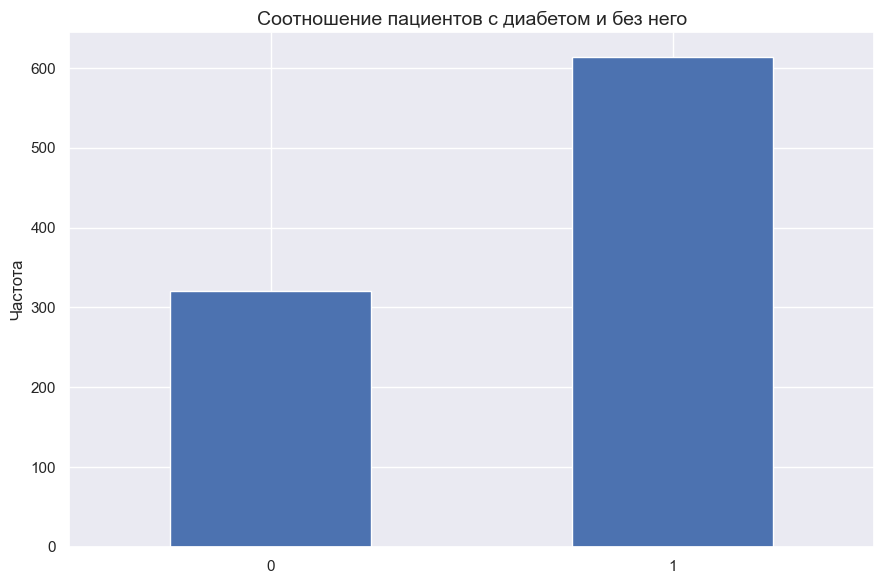

diabetes
0    321
1    614
Name: count, dtype: int64


In [84]:
analyzis_category(df_test['diabetes'], 'Соотношение пациентов с диабетом и без него')

Соотношение пациентов с диабетом и без него **2:1** соответственно.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "family_history":

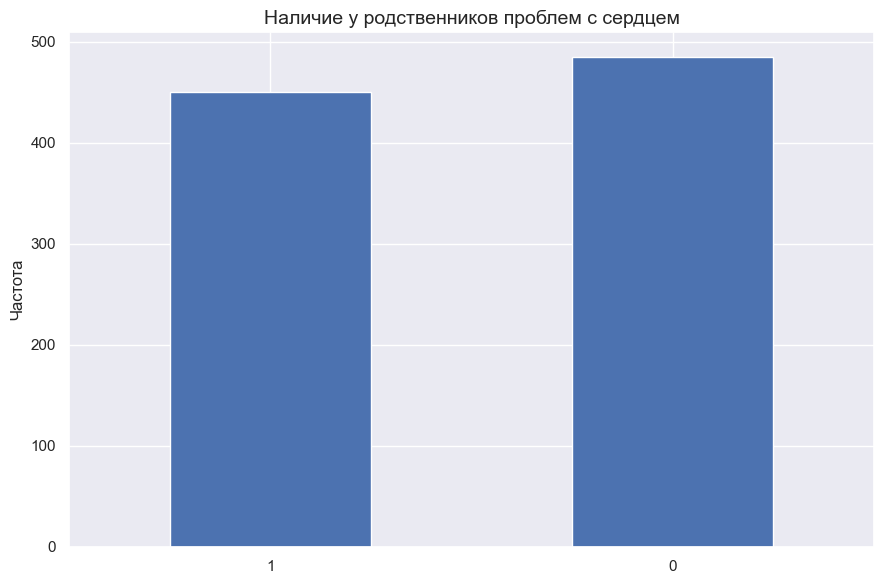

family_history
1    450
0    485
Name: count, dtype: int64


In [85]:
analyzis_category(df_test['family_history'], 'Наличие у родственников проблем с сердцем')

Соотношение людей, у который родственники имеют проблемы с сердцем и нет **1:1**.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "smoking":

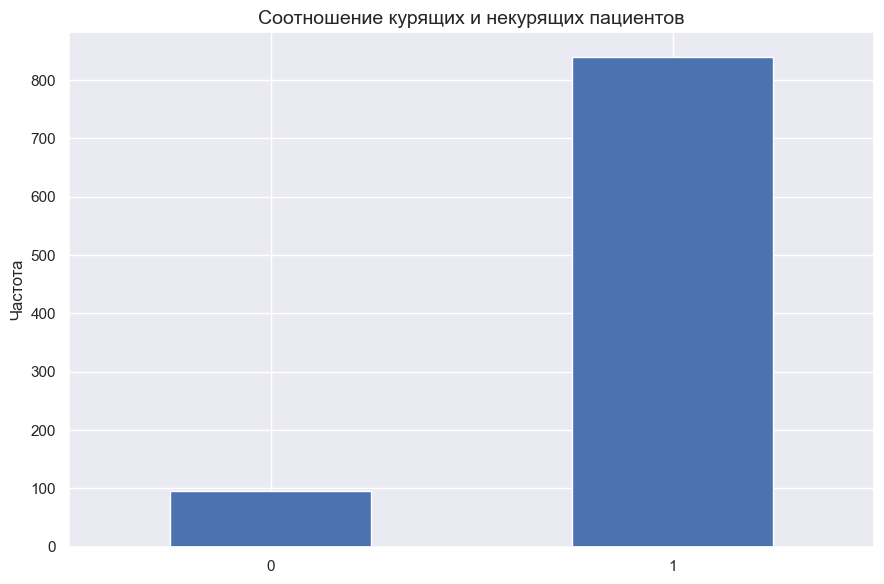

smoking
0     95
1    840
Name: count, dtype: int64


In [86]:
analyzis_category(df_test['smoking'], 'Соотношение курящих и некурящих пациентов')

Соотношение курящих и некурящих пациентов **9:1** соответственно.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "obesity":

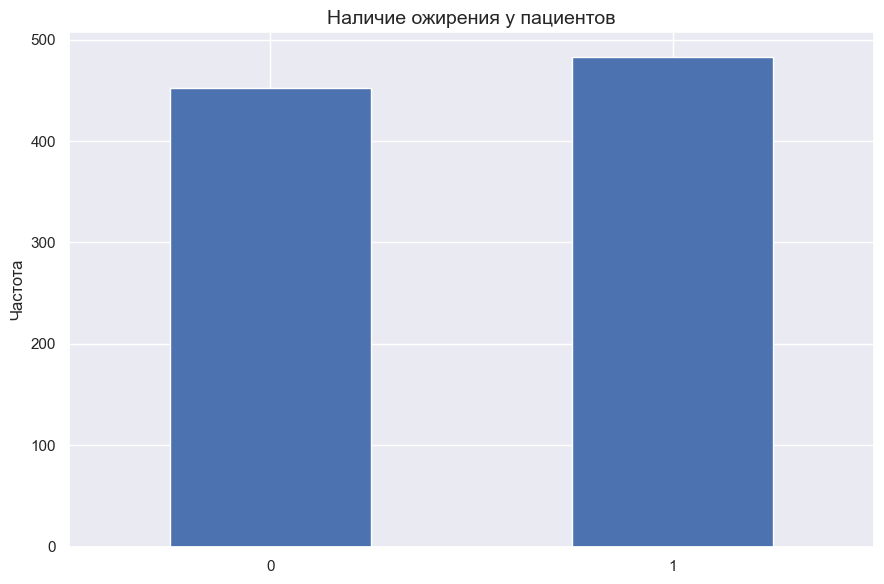

obesity
0    452
1    483
Name: count, dtype: int64


In [87]:
analyzis_category(df_test['obesity'], 'Наличие ожирения у пациентов')

Соотношение пациентов с ожирением и без **1:1**.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "alcohol_consumption":

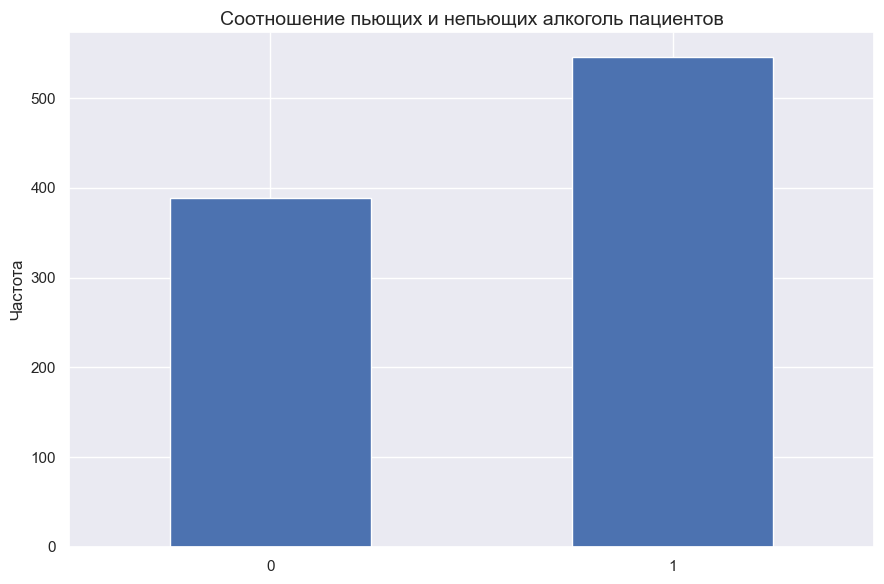

alcohol_consumption
0    389
1    546
Name: count, dtype: int64


In [88]:
analyzis_category(df_test['alcohol_consumption'], 'Соотношение пьющих и непьющих алкоголь пациентов')

Соотношение пьющих и непьющих алкоголь пациентов **3:2** соответственно.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "diet":

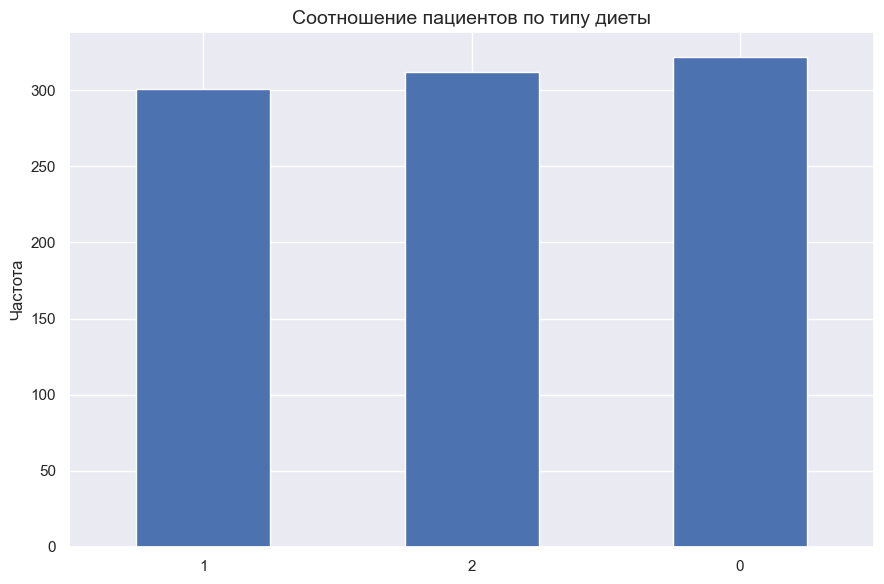

diet
1    301
2    312
0    322
Name: count, dtype: int64


In [89]:
analyzis_category(df_test['diet'], 'Соотношение пациентов по типу диеты')

Соотношение пациентов по типу диеты **1:1:1**.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "previous_heart_problems":

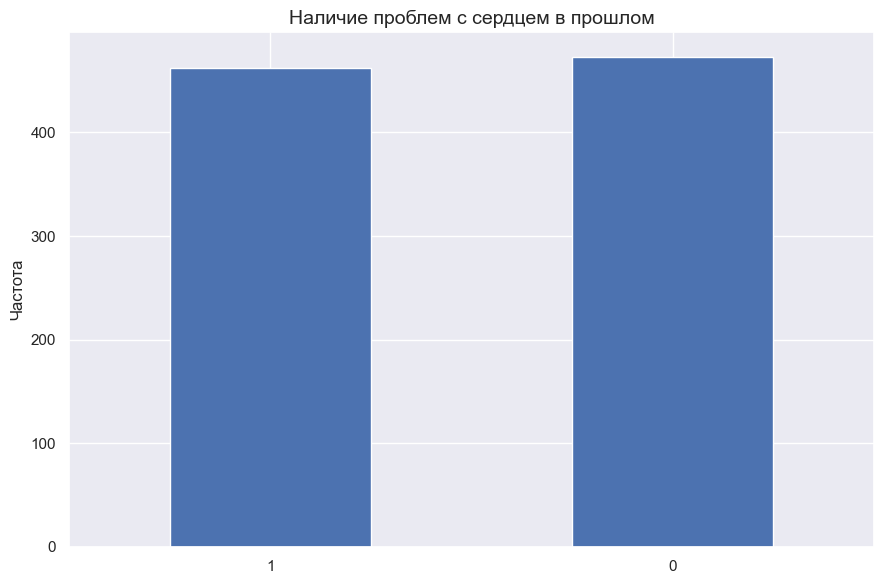

previous_heart_problems
1    462
0    473
Name: count, dtype: int64


In [90]:
analyzis_category(df_test['previous_heart_problems'], 'Наличие проблем с сердцем в прошлом')

Соотношение пациентов с наличием проблем с сердцем в прошлом и нет **1:1**.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "medication_use":

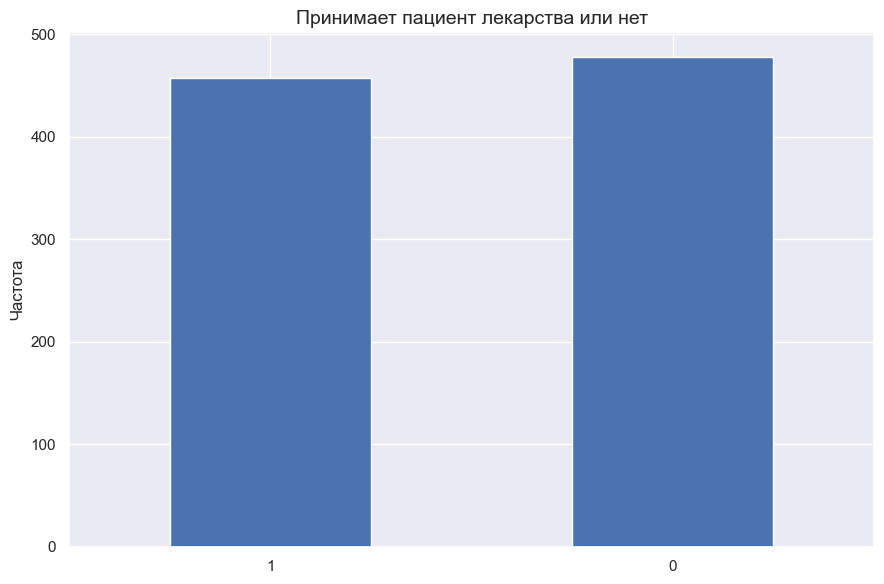

medication_use
1    457
0    478
Name: count, dtype: int64


In [91]:
analyzis_category(df_test['medication_use'], 'Принимает пациент лекарства или нет')

Соотношение пациентов, принимающих уже лекарства и нет **1:1**.

Соотношение в сравнении с тренировочной выборкой сохранено.

##### Признак "stress_level":

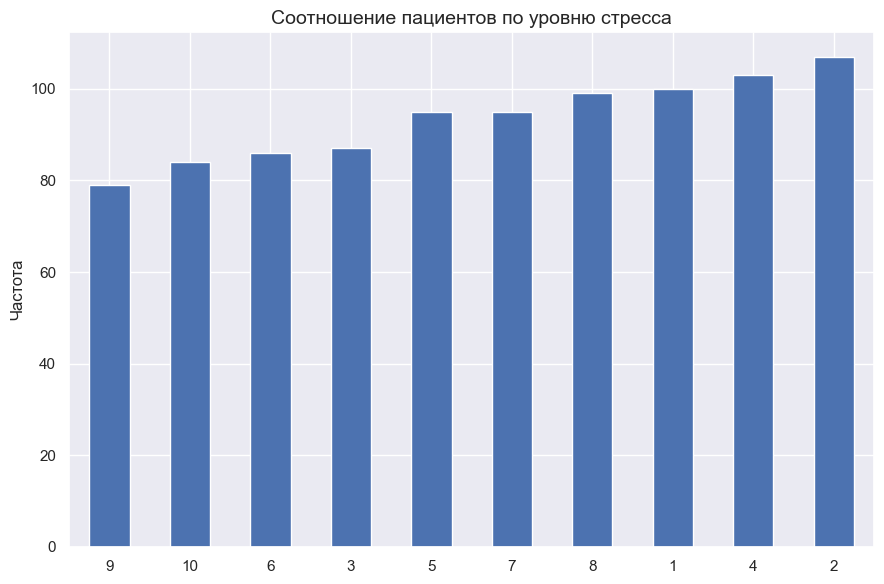

stress_level
9      79
10     84
6      86
3      87
5      95
7      95
8      99
1     100
4     103
2     107
Name: count, dtype: int64


In [92]:
analyzis_category(df_test['stress_level'], 'Соотношение пациентов по уровню стресса')

В тестовой выборке соотношение пациентов по уровню стресса по сравнению с тренировочной не сохранено, данное отличие не повлияет на предсказательную способость модели.

* Меньше всего пациентов с 9 уровнем стресса. 
* Больше всего с 2 уровнем стресса.

##### Признак "physical_activity_days_per_week":

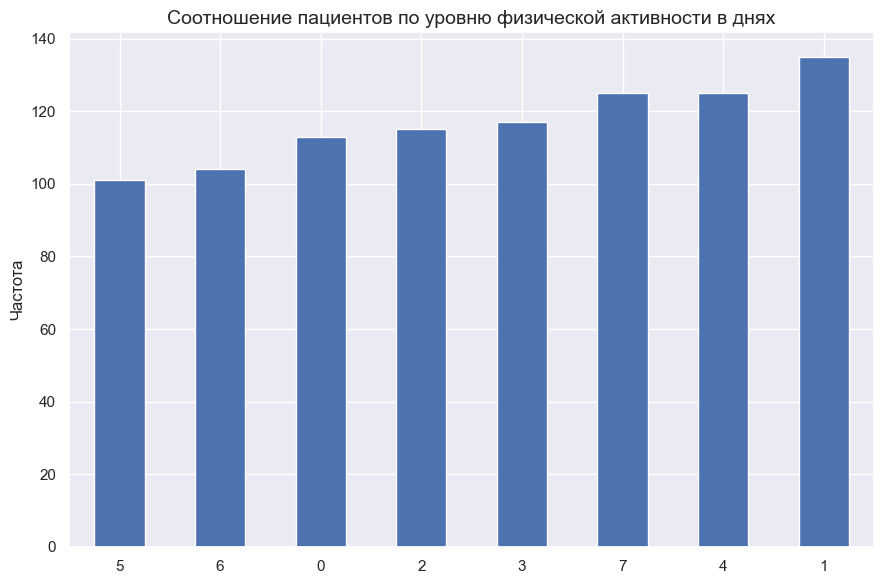

physical_activity_days_per_week
5    101
6    104
0    113
2    115
3    117
7    125
4    125
1    135
Name: count, dtype: int64


In [93]:
analyzis_category(df_test['physical_activity_days_per_week'], 'Соотношение пациентов по уровню физической активности в днях')

Распределение пациентов по количеству дней с физической активностью отличается от тренировочной выборки, но данное расхождение не повлияет на прогнозирующую способность модели.

* Меньше всего пациентов, у которых 5 дней с физической активностью.
* Больше всего пациентов, у которых 1 день с физической активностью.

##### Признак "sleep_hours_per_day":

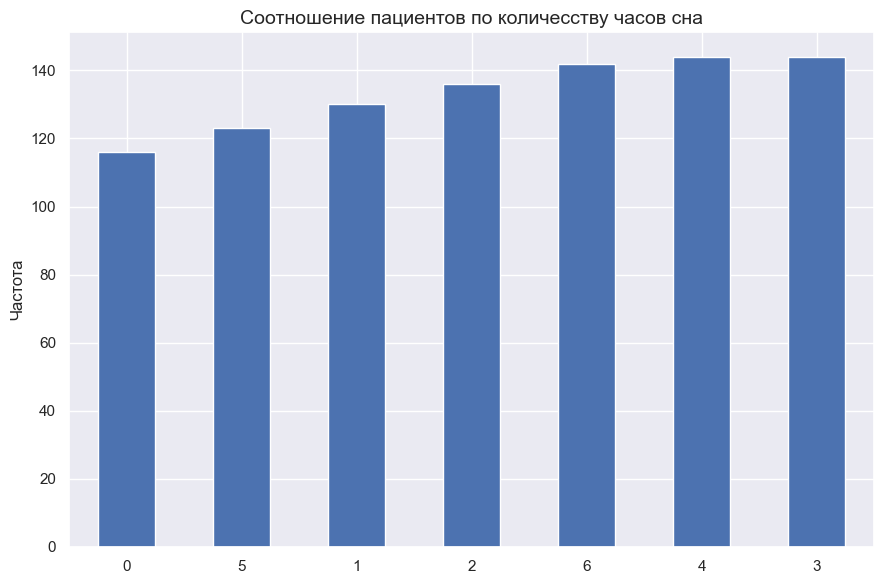

sleep_hours_per_day
0    116
5    123
1    130
2    136
6    142
4    144
3    144
Name: count, dtype: int64


In [94]:
analyzis_category(df_test['sleep_hours_per_day'], 'Соотношение пациентов по количесству часов сна')

* Соотношение пациентов по количеству сна примерно на одном уровне

    * Наибольшее количество пациентов находятся в 3 категории (среднее количество сна);
    * Наименьшее количество пациентов находится в 0 категории (наименьшее количество сна).

##### Признак "gender":

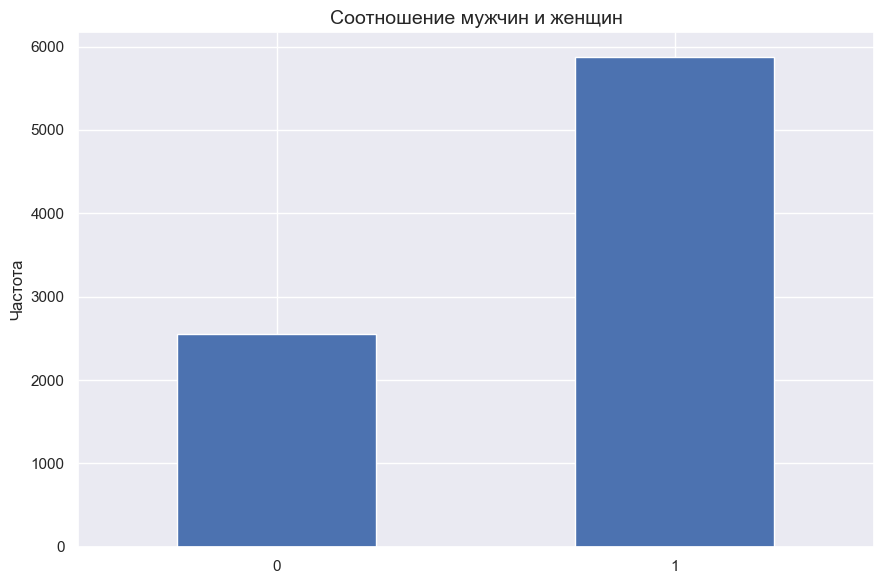

gender
0    2553
1    5877
Name: count, dtype: int64


In [95]:
analyzis_category(df_train['gender'], 'Соотношение мужчин и женщин')

Соотношение мужчин и женщин **2:1** соответственно.

Соотношение в сравнении с тренировочной выборкой сохранено.

### Вывод:

#### Датафрейм "df_train":

##### Количественные признаки:

Признак **"blood_sugar"** был удален в виду некорректных/аномальных значений, которые могут только запутать модель и привести к некорректной ее работе.

Значения признака **"age"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.64**
* Минимальное значение - **0.04**
* Среднее значение - **0.46**
* Максимальное значение - **0.85**

Значения признака **"cholesterol"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.26** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

Значения признака **"heart_rate"** ассиметричное распределение с резкими обрывами, имеет слабовыявленный пик на средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.03** до **0.07**
* Минимальное значение - **0.01**
* Среднее значение - **0.05**
* Максимальное значение - **0.08**

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.5**
* Максимальное значение - **1**

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

Значения признака **"income"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

Значения признака **"bmi"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **1**

Значения признака **"triglycerides"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.75**
* Минимальное значение - **0**
* Среднее значение - **0.5**
* Максимальное значение - **1**

Значения признака **"systolic_blood_pressure"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.3** до **0.6**
* Минимальное значение - **0.16**
* Среднее значение - **0.45**
* Максимальное значение - **0.74**

Значения признака **"diastolic_blood_pressure"** имеет вогнутое распределение. Выбросы отсутствуют.

* Основной диапозон значений - от **0.34** до **0.65**
* Минимальное значение - **0.2**
* Среднее значение - **0.5**
* Максимальное значение - **0.79**

##### Категориальные признаки:

* Соотношение пациентов с диабетом и без него **2:1** соответственно.
* Соотношение людей, у который родственники имеют проблемы с сердцем и нет **1:1**.
* Соотношение курящих и некурящих пациентов **9:1** соответственно.
* Соотношение пациентов с ожирением и без **1:1**.
* Соотношение пьющих и непьющих алкоголь пациентов **3:2** соответственно.
* Соотношение пациентов по типу диеты **1:1:1**.
* Соотношение пациентов с наличием проблем с сердцем в прошлом и нет **1:1**.
* Соотношение пациентов, принимающих уже лекарства и нет **1:1**.
* Соотношение пациентов по уровням стресса приблизительно равно 1:1. 

    * Меньше всего пациентов с 10 уровнем стресса. 
    * Больше всего с 7 уровнем стресса.

<!-- -->

* Пациенты по количеству дней с физической активностью распределены приблизительно поровну.

    * Меньше всего пациентов без физической активности.
    * Больше всего пациентов, у которых 3 дня с физической активностью.

<!-- -->

* Соотношение пациентов по количеству сна примерно на одном уровне

    * Наибольшее количество пациентов находятся в 6 категории (наибольшее количество сна);
    * Наименьшее количество пациентов находится в 5 категории.

<!-- -->

* Соотношение пациентов с риском сердечного приступа и нет **1:2** соответственно.
* Соотношение мужчин и женщин **2:1** соответственно.

#### Датафрейм "df_test":

##### Количественные признаки:

Признак **"blood_sugar"** был удален в виду некорректных/аномальных значений, которые могут только запутать модель и привести к некорректной ее работе.

Значения признака **"age"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.65**
* Минимальное значение - **0.04**
* Среднее значение - **0.46**
* Максимальное значение - **0.85**

Значимой разницы с тренировочной выборкой не наблюдается.

Значения признака **"cholesterol"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.72**
* Минимальное значение - **0**
* Среднее значение - **0.49**
* Максимальное значение - **0.99**

Значимой разницы с тренировочной выборкой не наблюдается.

Значения признака **"heart_rate"** ассиметричное распределение с резкими обрывами, имеет пик на средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.04** до **0.07**
* Минимальное значение - **0.01**
* Среднее значение - **0.05**
* Максимальное значение - **0.08**

В тестовой выборке больше пациентов с средними значениями частоты сердцебиения.

Значения признака **"exercise_hours_per_week"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.74**
* Минимальное значение - **0.0003**
* Среднее значение - **0.5**
* Максимальное значение - **0.99**

Значимого отличия с тренировочной выборкой не наблюдается.

Значения признака **"exercise_hours_per_week"** распределены равномерно с отклонениями в **~15%** от средних значений. Выбросы отсутствуют.

* Основной диапозон значений - от **0.25** до **0.77**
* Минимальное значение - **0.001**
* Среднее значение - **0.52**
* Максимальное значение - **0.99**

Значимой разницы с тренировочной выборкой не наблюдается.

Значения признака **"income"** имеют асимметричное распределение с 2 пиками в минимальных и средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.26** до **0.72**
* Минимальное значение - **0.003**
* Среднее значение - **0.48**
* Максимальное значение - **0.99**

В тестовой выборке данный признак распределен менее равномерно, на предсказательную способность модели это не повлияет.

Значения признака **"bmi"** имеют вогнутое распределение с 3 пиками, по краями и один в средних значениях. Выбросы отсутствуют.

* Основной диапозон значений - от **0.21** до **0.73**
* Минимальное значение - **0.003**
* Среднее значение - **0.46**
* Максимальное значение - **0.99**

В тестовой выборке данный признак имеет другое распределение, но на предсказательную способность модели это не повлияет.

Значения признака **"triglycerides"** распределены равномерно с отклонениями в **~15%** от средних значений. Выбросы отсутствуют.

* Основной диапозон значений - от **0.24** до **0.73**
* Минимальное значение - **0**
* Среднее значение - **0.47**
* Максимальное значение - **0.99**

Значимого отличия с тренировочной выборкой не наблюдается.

Значения признака **"systolic_blood_pressure"** распределены равномерно с небольшими отклонениями. Выбросы отсутствуют.

* Основной диапозон значений - от **0.3** до **0.6**
* Минимальное значение - **0.16**
* Среднее значение - **0.46**
* Максимальное значение - **0.74**

Значимого отличия от распределения в тренировочной выборке не наблюдается.

Значения признака **"diastolic_blood_pressure"** имеет вогнутое распределение. Выбросы отсутствуют.

* Основной диапозон значений - от **0.35** до **0.65**
* Минимальное значение - **0.21**
* Среднее значение - **0.5**
* Максимальное значение - **0.79**

Значимого отличия от распределения в тренировочной выборке не наблюдается.

##### Категориальные признаки:

* Соотношение пациентов с диабетом и без него **2:1** соответственно. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение людей, у который родственники имеют проблемы с сердцем и нет **1:1**. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение курящих и некурящих пациентов **9:1** соответственно. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение пациентов с ожирением и без **1:1**. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение пьющих и непьющих алкоголь пациентов **3:2** соответственно. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение пациентов по типу диеты **1:1:1**. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение пациентов с наличием проблем с сердцем в прошлом и нет **1:1**. Соотношение в сравнении с тренировочной выборкой сохранено.
* Соотношение пациентов, принимающих уже лекарства и нет **1:1**. Соотношение в сравнении с тренировочной выборкой сохранено.
* В тестовой выборке соотношение пациентов по уровню стресса по сравнению с тренировочной не сохранено, данное отличие не повлияет на предсказательную способость модели.

    * Меньше всего пациентов с 9 уровнем стресса. 
    * Больше всего с 2 уровнем стресса.

<!-- -->

* Распределение пациентов по количеству дней с физической активностью отличается от тренировочной выборки, но данное расхождение не повлияет на прогнозирующую способность модели.

    * Меньше всего пациентов, у которых 5 дней с физической активностью.
    * Больше всего пациентов, у которых 1 день с физической активностью.

<!-- -->

* Соотношение пациентов по количеству сна примерно на одном уровне

    * Наибольшее количество пациентов находятся в 3 категории (среднее количество сна);
    * Наименьшее количество пациентов находится в 0 категории (наименьшее количество сна).

<!-- -->

* Соотношение мужчин и женщин **2:1** соответственно. Соотношение в сравнении с тренировочной выборкой сохранено.

## Корреляционный анализ:

### Матрица корреляции:

В связи с тем, что у наших количественных признаков не наблюдалось нормальное распределение мы будем использовать для расчета корреляции метод Спирмена.

In [96]:
# Список колонок с количественными значениями
quantity_columns = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week',
                    'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
                    'systolic_blood_pressure', 'diastolic_blood_pressure']

#### Датафрейм "df_train":

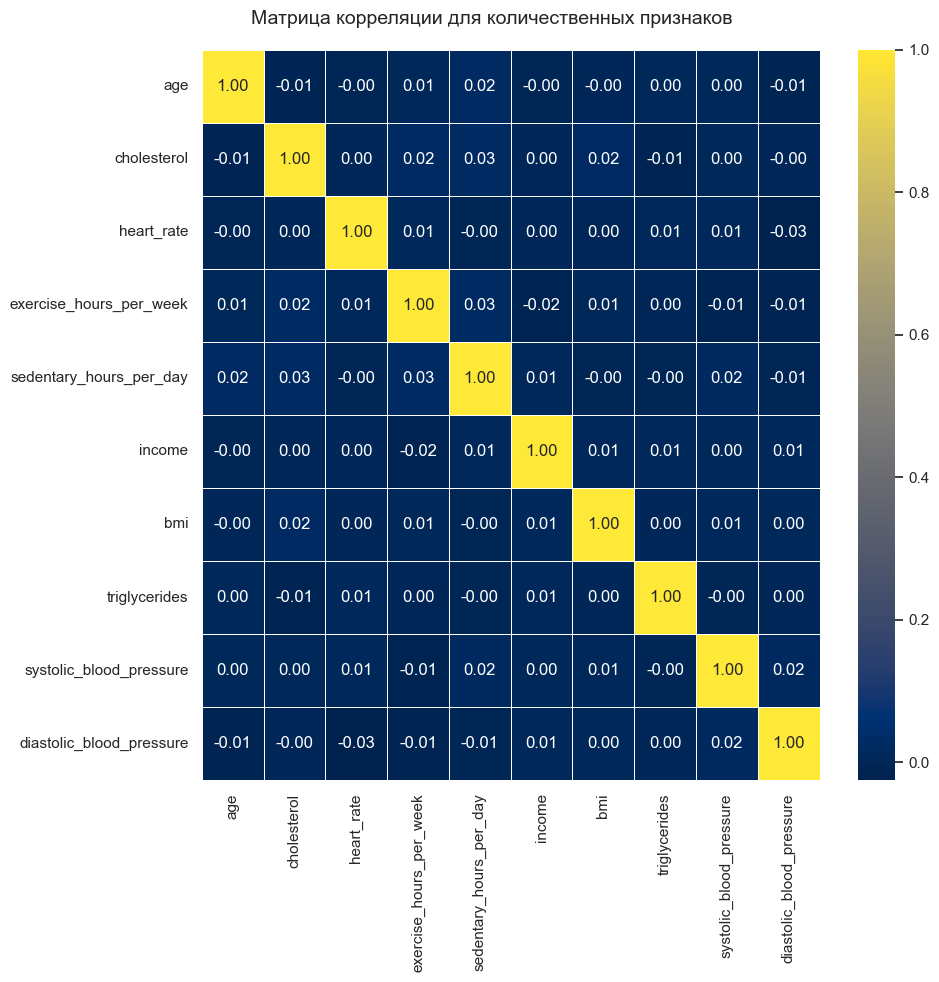

In [97]:
# Строим тепловую карту
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train[quantity_columns].corr(method='spearman'), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица корреляции для количественных признаков', fontsize=14)
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

Между входными количественными признаками практически отсутствует взимосвязь, из этого следует, что мы можем не переживать о наличие мультиколлениарности.

#### Датафрейм "df_test":

Дополнительно проверим корреляцию на тестовой выборке.

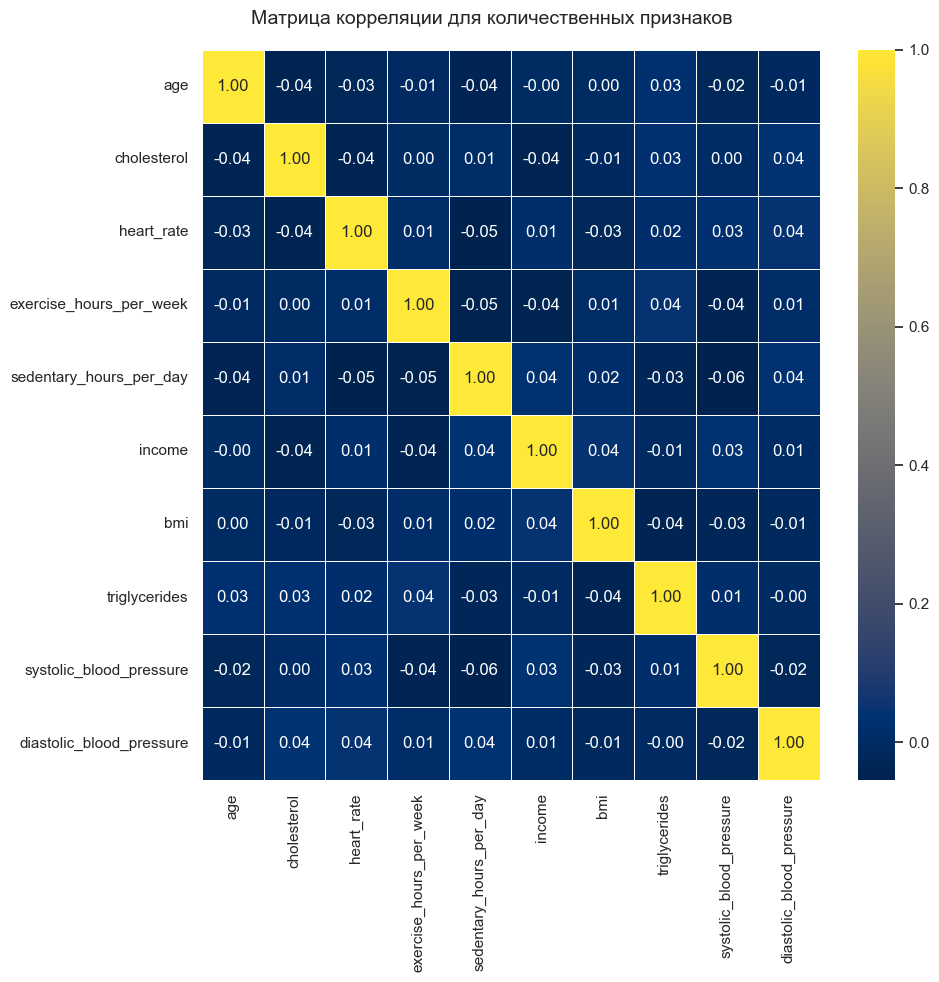

In [98]:
# Строим тепловую карту
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_test[quantity_columns].corr(method='spearman'), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица корреляции для количественных признаков', fontsize=14)
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

Взаимосвязи усилились, но не существенно, все значения корреляций признаков варьируется около нуля.

### VIF-фактор:

Дополнительно проверим на наличие мультиколлинеарности между признаками через рассчитаный vif-фактор.

#### Датафрейм "df_train":

In [99]:
vif_factor(df_train, quantity_columns)

input attribute       vif
0                       age  4.327726
1               cholesterol  3.779473
2                heart_rate  7.003672
3   exercise_hours_per_week  3.783345
4   sedentary_hours_per_day  3.762854
5                    income  3.710793
6                       bmi  3.768374
7             triglycerides  3.768766
8   systolic_blood_pressure  6.907017
9  diastolic_blood_pressure  7.766626

Все значения меньше **10**, что говорит о отсутствии мультиколлениарности.

#### Датафрейм "df_test":

In [100]:
vif_factor(df_test, quantity_columns)

input attribute       vif
0                       age  4.259722
1               cholesterol  3.651234
2                heart_rate  7.426016
3   exercise_hours_per_week  3.613697
4   sedentary_hours_per_day  3.702170
5                    income  3.834019
6                       bmi  3.362825
7             triglycerides  3.661151
8   systolic_blood_pressure  6.582315
9  diastolic_blood_pressure  7.924810

Все значения меньше **10**, что говорит о отсутствии мультиколлениарности.

### Матрица Phik:

Рассмотрим взаимосвязи вместе с категориальными признаками.

#### Датафрейм "df_train":

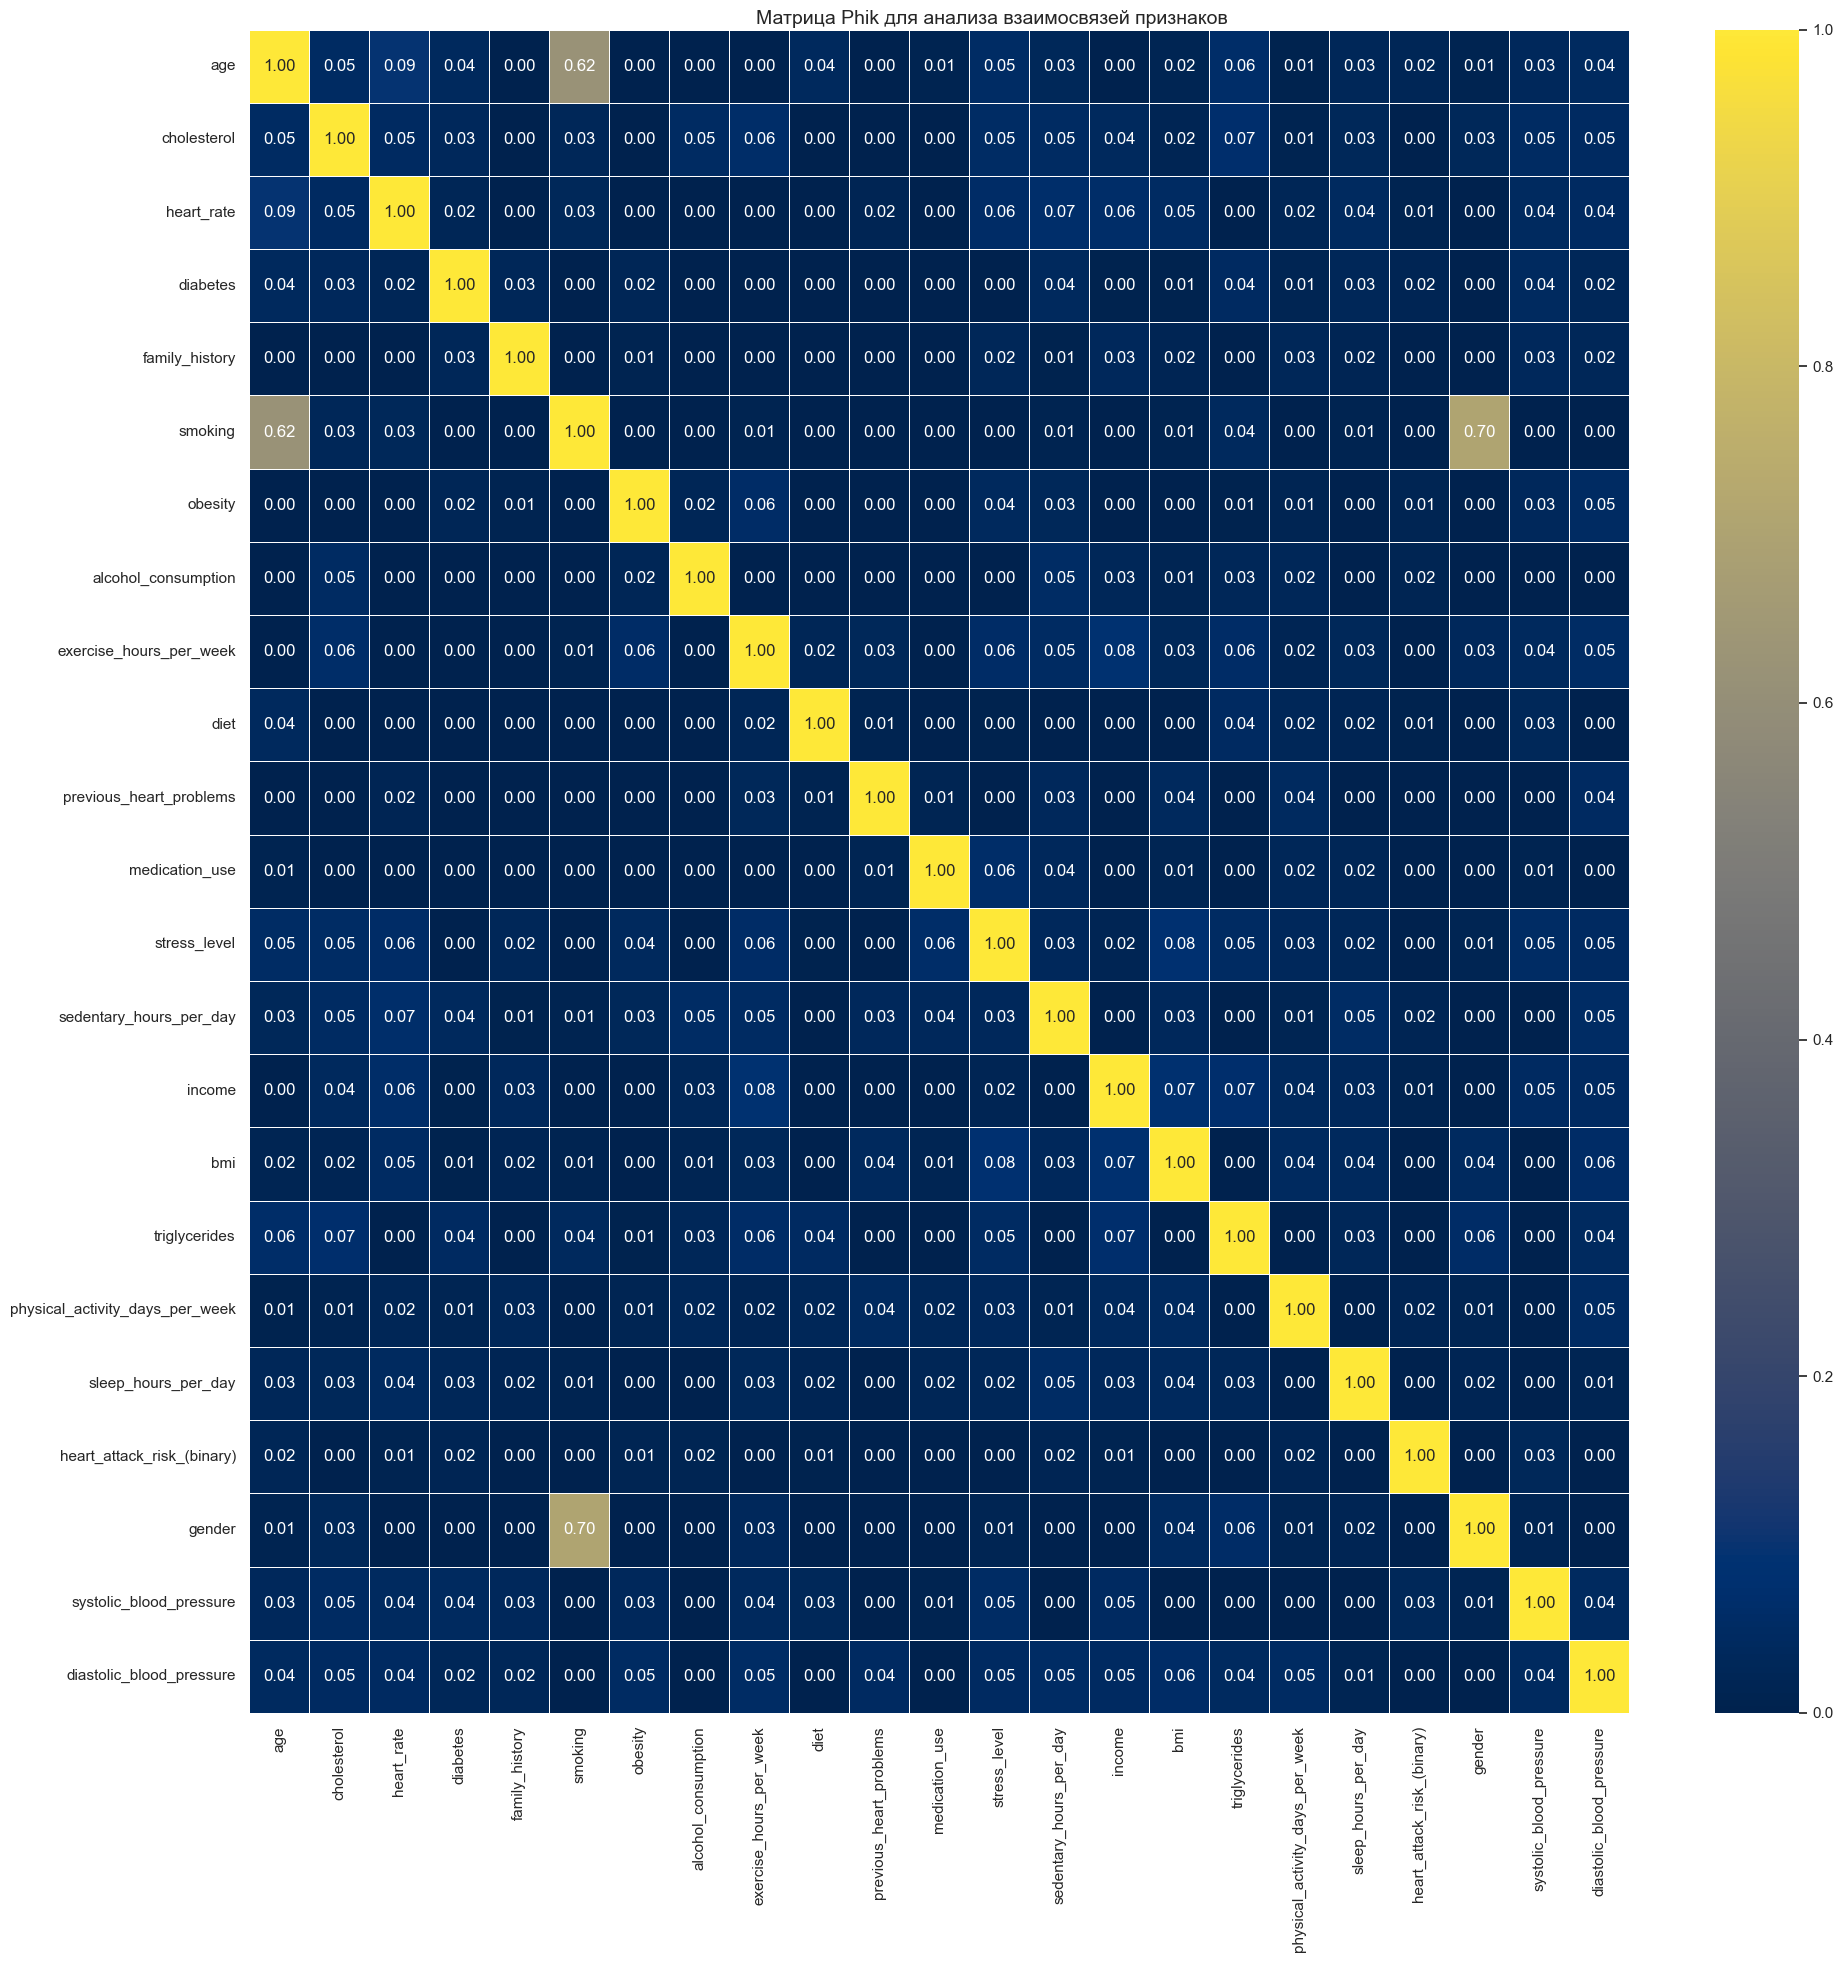

In [101]:
# Строим тепловую карту
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_train.phik_matrix(interval_cols=quantity_columns), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица Phik для анализа взаимосвязей признаков', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

Сильная корреляция наблюдается между признаками:

* **smoking** - **gender** — **0.7**
* **smoling** - **age** — **0.62**

Между остальными признаками наблюдается корреляция около нуля.

#### Датафрейм "df_test":

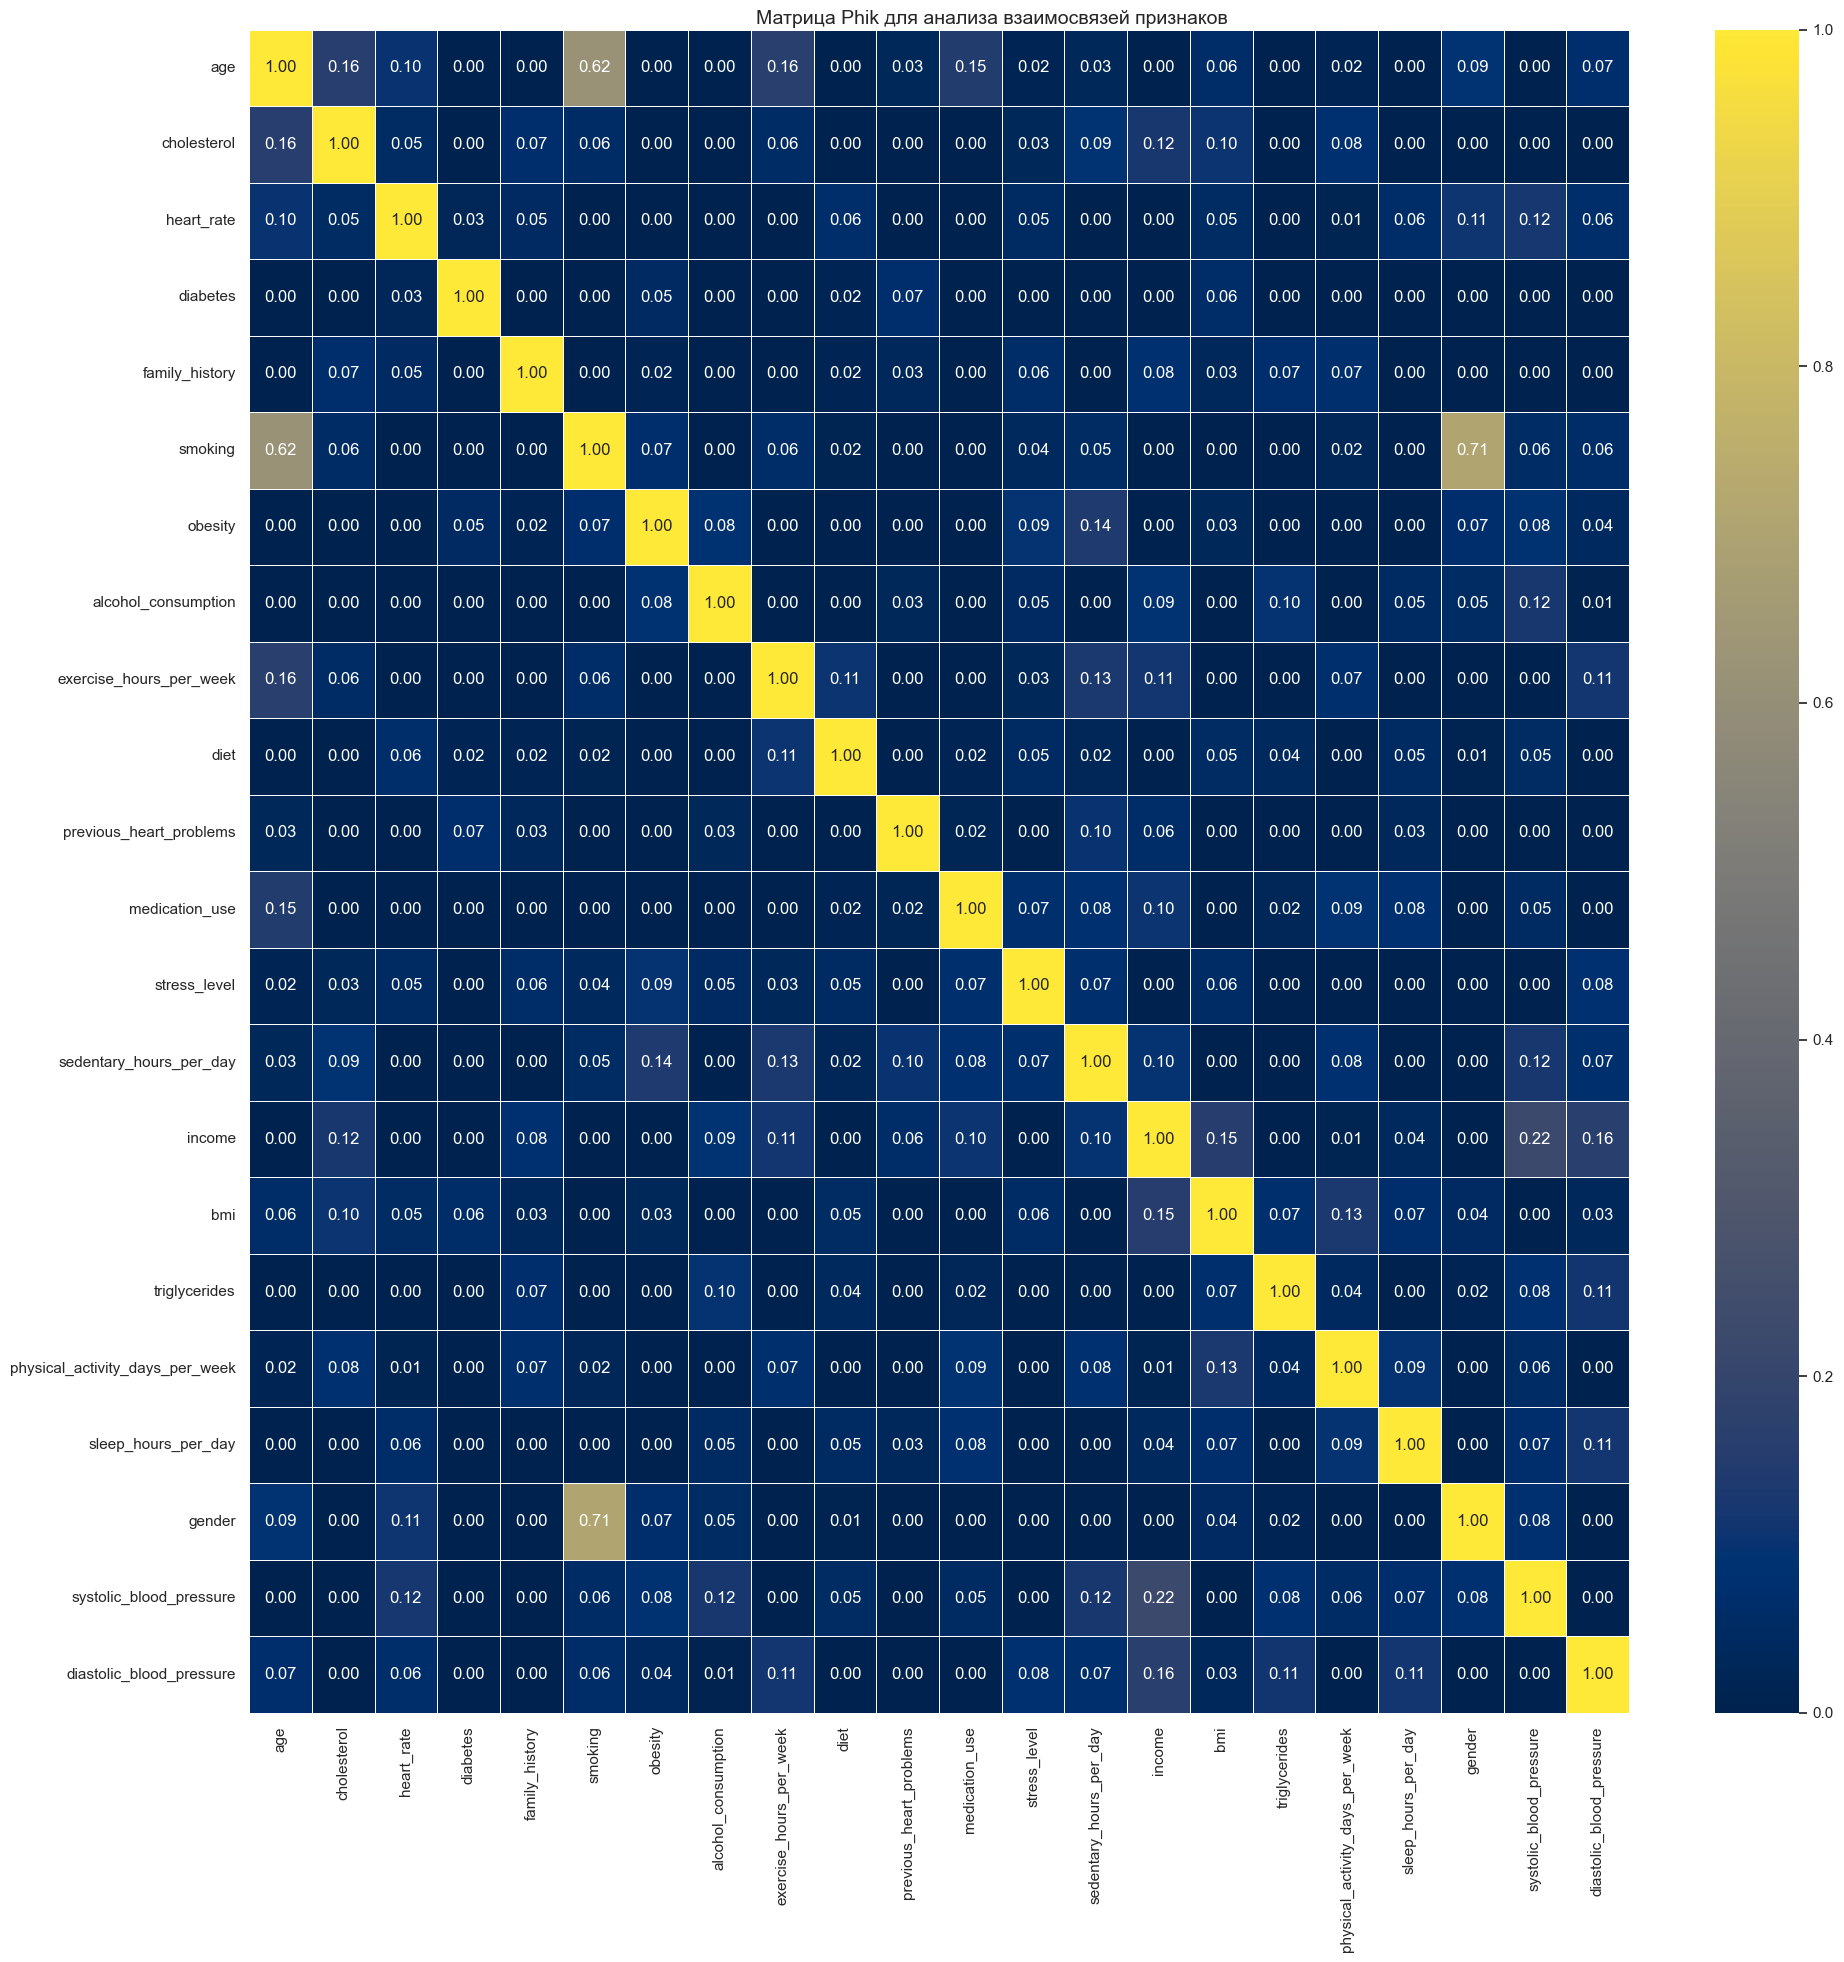

In [102]:
# Строим тепловую карту
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_test.phik_matrix(interval_cols=quantity_columns), annot=True, 
            fmt='.2f', linewidths=.5, cmap='cividis', ax=ax)

# Настройка заголовка и подписей
f.suptitle('Матрица Phik для анализа взаимосвязей признаков', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

На тестовой выборке мы наблюдаем ту же картину, что и на тренировочной, но некоторые взаимосвязи стали более выражены, наиболее ярко выражены:

* Доход пациента имеет положительные взимосвязи с половиной входных признаков, наиболее сильно с давлением, количеством физической нагрузки, использование медикаментов и уровня холестирина.
* Проведенное время сидя и наличие ожирения, ожирение так же сильный фактор проблем с сердцем.

### Исследование взаимосвзи количественных и целевого признаков:

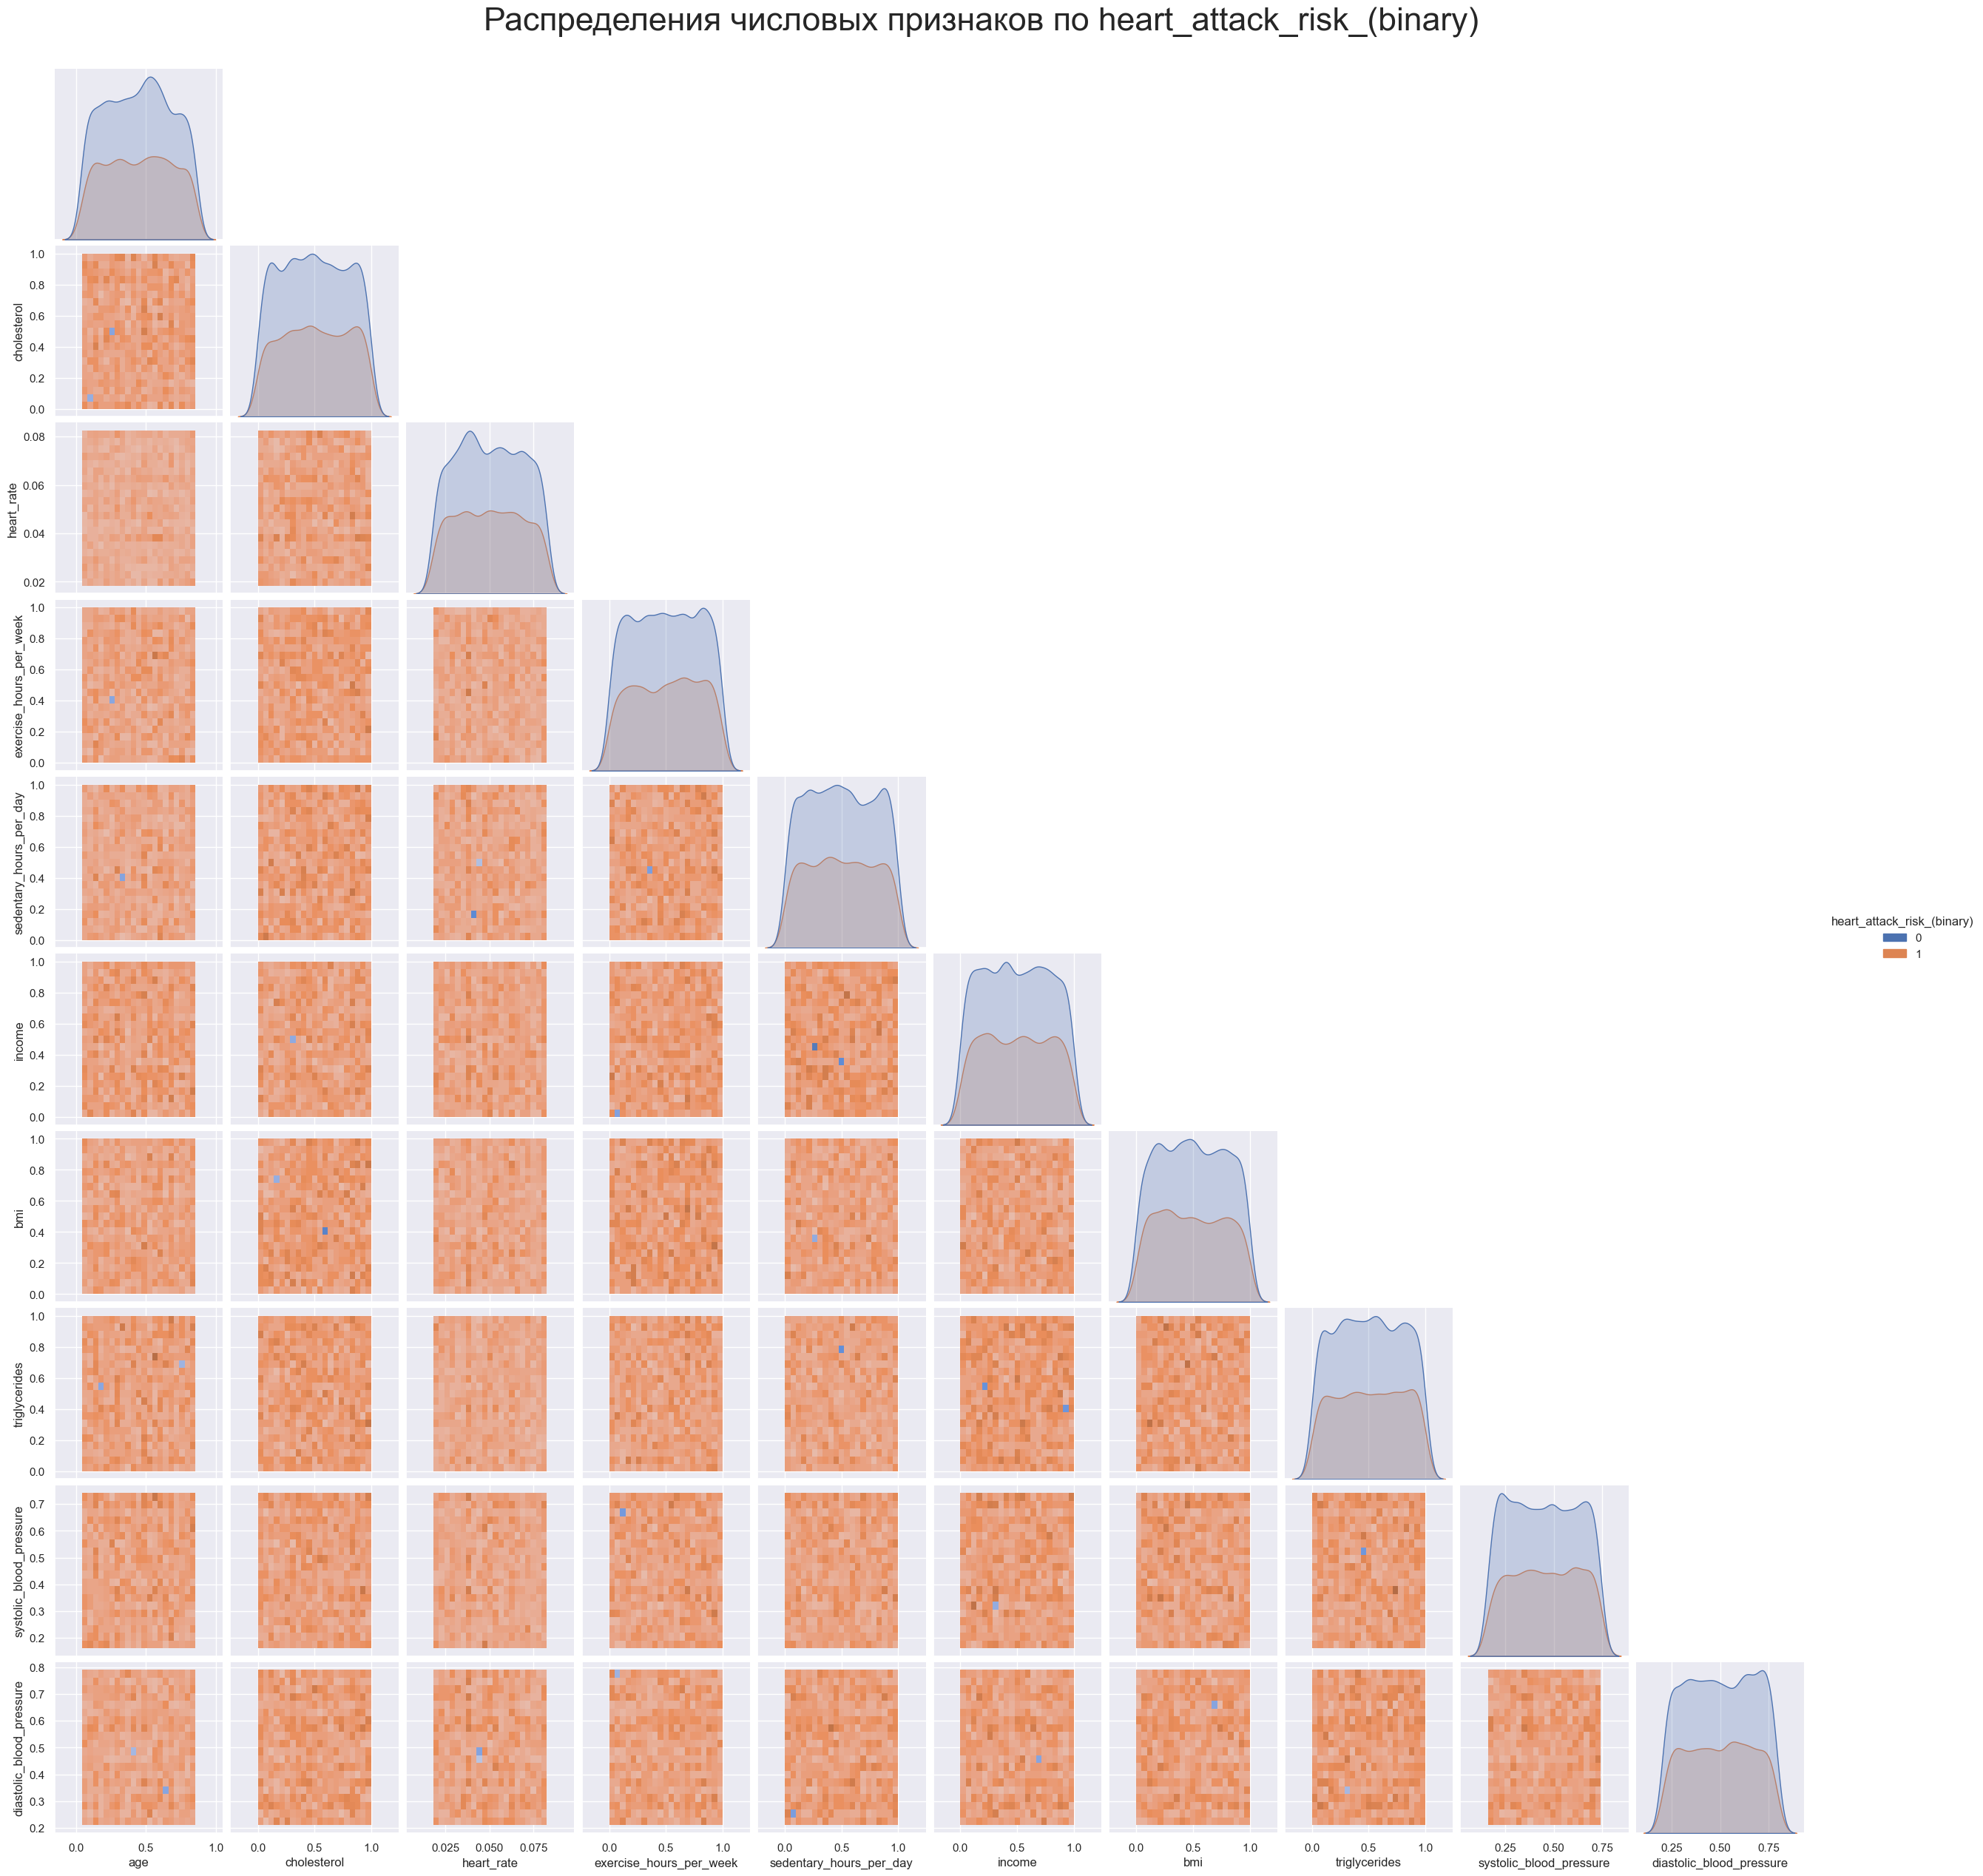

In [103]:
# Строим график
sns.pairplot(
    data=df_train[quantity_columns + ['heart_attack_risk_(binary)']],
    hue='heart_attack_risk_(binary)',
    diag_kind='kde',
    kind='hist',
    corner=True
)

# Заголовок графика
plt.suptitle('Распределения числовых признаков по heart_attack_risk_(binary)',fontsize=32, y=1.02)

# Вывод графика
plt.show()

Визуализация нам к сожалению тоже не помогает увидеть взаимосвязи, что ожидаемо, так как организм человека очень сложная система и каждый признак взаимодействует очень слабо и нелинейно.

### Исследование взаимосвзи категориальных и целевого признаков:

In [104]:
# Список категориальных признаков
cat_col = ['diabetes', 'family_history', 'smoking', 'obesity',
           'alcohol_consumption', 'diet', 'previous_heart_problems',
           'medication_use', 'stress_level', 'physical_activity_days_per_week',
           'sleep_hours_per_day', 'heart_attack_risk_(binary)', 'gender']

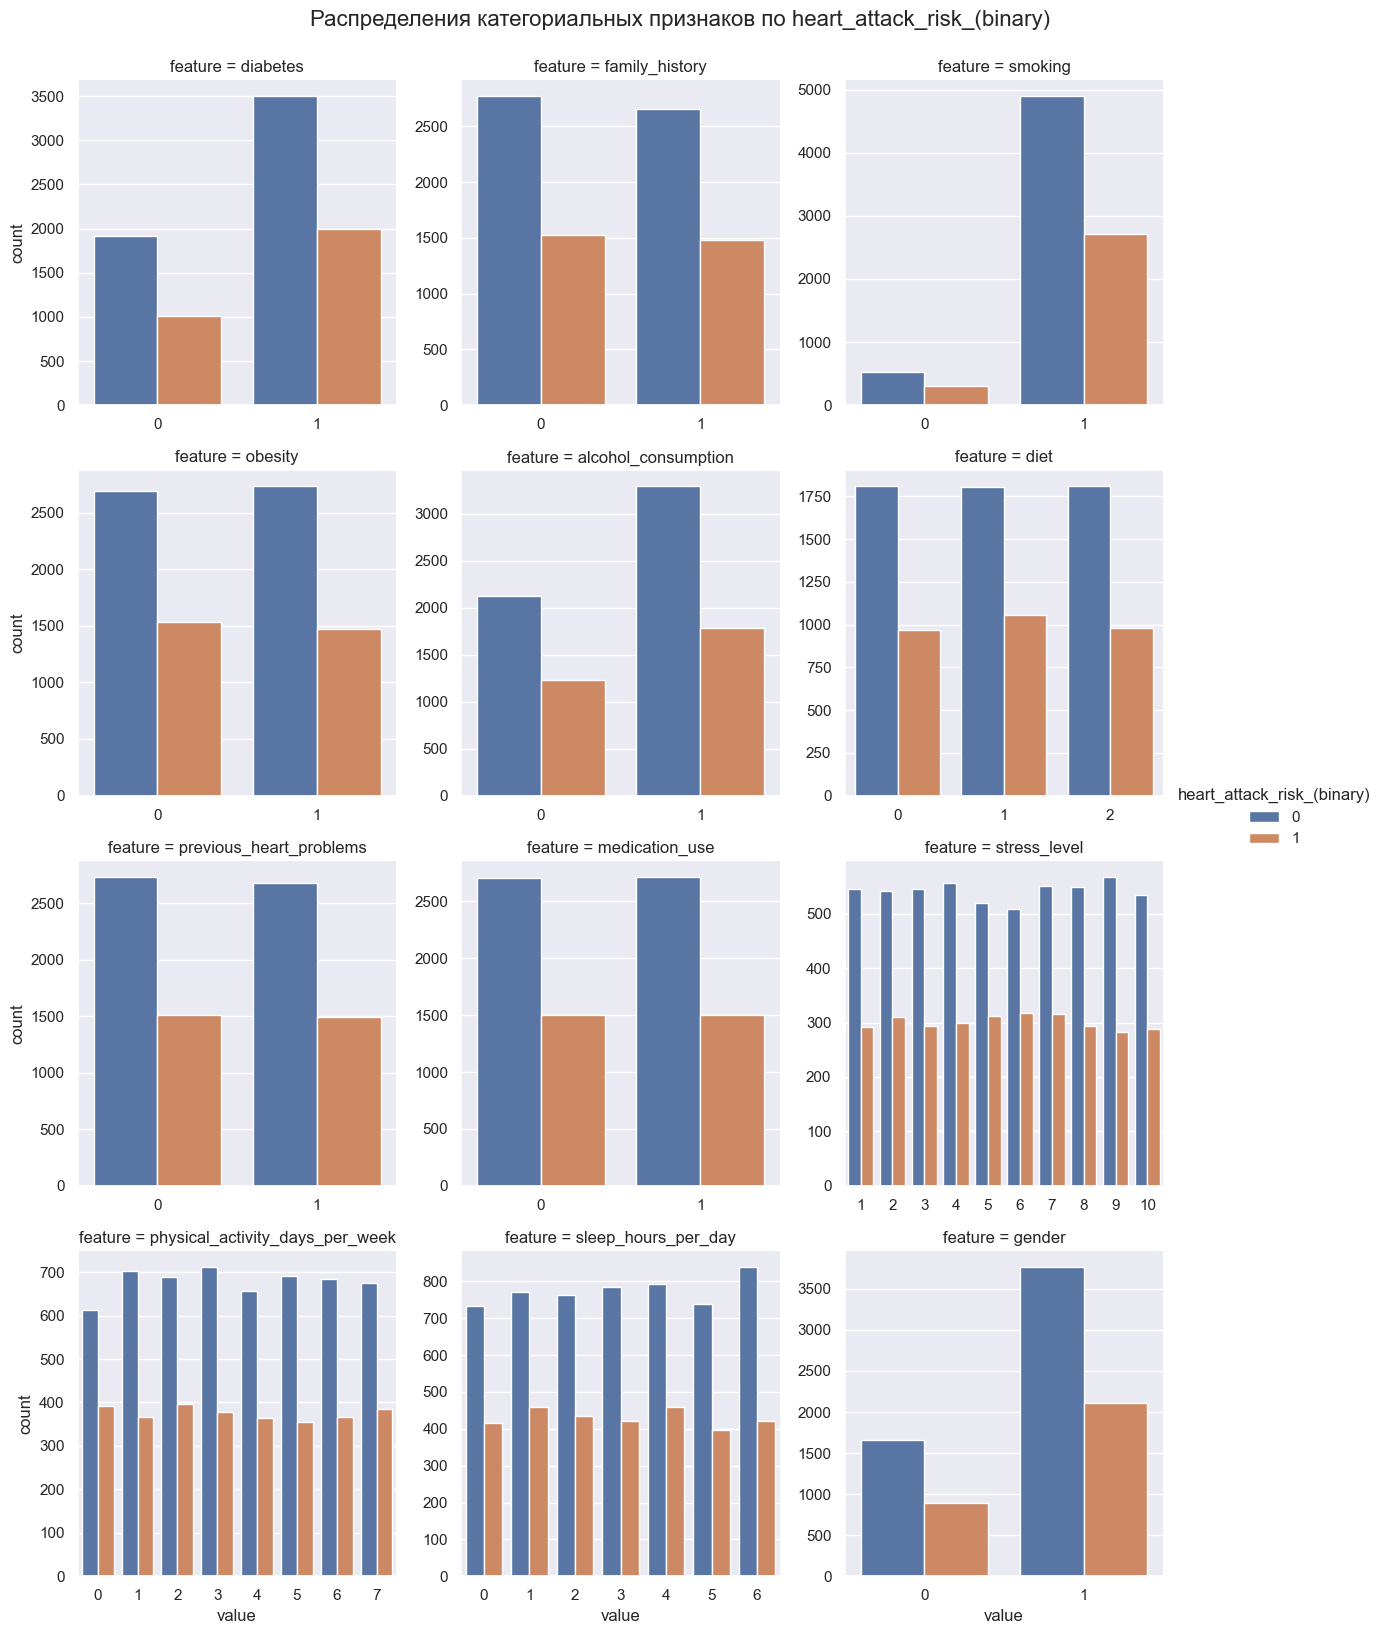

In [105]:
# Расширяем данные: melt категориальных признаков
df_cat_melted = df_train[cat_col].melt(
    id_vars='heart_attack_risk_(binary)',
    value_vars=cat_col,
    var_name='feature',
    value_name='value'
)

# Строим график
g = sns.catplot(
    data=df_cat_melted,
    x='value',
    hue='heart_attack_risk_(binary)',
    col='feature',
    kind='count',
    col_wrap=3,
    sharex=False,
    sharey=False,
    height=4
)

# Заголовок графика
g.fig.suptitle('Распределения категориальных признаков по heart_attack_risk_(binary)', y=1.02, fontsize=16)

# Вывод графика
plt.show()

В категориальных признаках явной взаимосвязи мы так же не видим, при любых обстоятельствах вероятность получить сердечный пристум **~33%**.

### Вывод:

#### Матрица корреляции:

**df_train:**

Между входными количественными признаками практически отсутствует взимосвязь, из этого следует, что мы можем не переживать о наличие мультиколлениарности.

**df_test:**

Взаимосвязи усилились, но не существенно, все значения корреляций признаков варьируется около нуля.

#### VIF-фактор:

**df_train:**

Все значения меньше **10**, что говорит о отсутствии мультиколлениарности.

**df_test:**

Все значения меньше **10**, что говорит о отсутствии мультиколлениарности.

#### Матрица Phik:

**df_train:**

Сильная корреляция наблюдается между признаками:

* **smoking** - **gender** — **0.7**
* **smoling** - **age** — **0.62**

Между остальными признаками наблюдается корреляция около нуля.

**df_test:**

На тестовой выборке мы наблюдаем ту же картину, что и на тренировочной, но некоторые взаимосвязи стали более выражены, наиболее ярко выражены:

* Доход пациента имеет положительные взимосвязи с половиной входных признаков, наиболее сильно с давлением, количеством физической нагрузки, использование медикаментов и уровня холестирина.
* Проведенное время сидя и наличие ожирения, ожирение так же сильный фактор проблем с сердцем.

#### Исследование взаимосвзи входных и целевого признаков:



#### Общее заключение:

Почти все входные признаки слабо взимодействиют между собой и с целевым признаком, необходимо будет применять ***SelectKBest***, для выявления наиболее оптимального набора признаков, а так же полиномиальные признаки, так как есть тонкая взаимосвязь, но ее сложно по корреляции обнаружить, с помощью визуализации так же не удалось получить полезной информации.

## Обучение модели и подбор гиперпараметров:

### План работы:

По итогам проведенной работы выше мы можем составить предварительный план по ее продолжению, а именно: выбор метрики, выбор модели, методы подготовки данных к обучению модели.

#### Выбор метрики:

Так как в данной ситуации цена ошибки — смертельная опасность для пациента, то нам необходимо ошибки **FN**(Ложноотрицательные: больного человека определяем, как здорового) привести к  **нулю**, но в то же время не отправлять всех подряд пациентов к врачу и на дополнительное обследование. Для этого наиболее сбалансированное решение будет выбрать метрику ***F2-score***, так как она учитывает ошибки **FP** и **FN**, но придает больший вес **FN**, которые мы хотим не допускать вообще.

- Метрика: ***F2-score***

#### Выбор модели:

Так как в наших данных больше половины входных признаков категориальные, в тестовой выборке в части категориальных признаков есть пропушенные значения, наилучшим вариантом для нас будет модель ***Catboost***, в виду того, что эта модель хорошо работает с категориальными признаками и умеет работать с значениями в них, которые она не видела ранее, определять их как новую категорию и на основе статистических вычислений делать прогноз.

- Модель: ***Catboost***

#### Предобработка данных:

Обучающую выборку мы уже подготовили к обучению, пока проводили анализ данных, тестовую выборку мы подготовим с помощью отдельной функции, так как подход к обучающей и тестовой выборке у нас немного отличается. А именно в обучающей выборке мы отказались от строк с пропусками и удалили дубликаты, чтобы не усиливать корреляцию между признаками, где ее нет, для тестовой выборке мы заполняем пропуски значениями **"-1"**, чтобы пометить для модели, что это новая незнакомая категория, а так же не трогаем дубликаты, так как предсказание необходимо выполнить на всех данных.

- Предобработка тестовой выборки: функция ***clean_data()***

#### Дополнительная подготовка данных к обучению модели:

Так как наши признаки — это части большой и сложной системы, как организм, они между собой нелинейно слабо связаны. Поэтому каждый признак в отдельности будет слабо помогать модели делать прогнозы, но если мы использовать ***PolynomialFeatures***, так мы сможем сымитировать **"снежный ком"** найти более явные взимосвязи, а возведение в степень значения признаков так же может уменьшить нелинейность взаимосвязей признаков. Далее с помощью ***SelectKBest*** отберем наилучший набор входных признаков.

- Инженерия новых признаков: ***PolynomialFeatures***
- Отбор признаков: ***SelectKBest***

### Списки и словари, необходимые для подготовки данных:

In [106]:
# Список признаков на удаление
var_drop = ['unnamed:_0', 'ck-mb', 'troponin', 'blood_sugar']

In [107]:
# Карта для преобразования признака gender
gender_map = {'1.0': 1, '0.0': 0, 'Male': 1, 'Female': 0}

In [108]:
# Карта для преобразования признака sleep_hours_per_day
sleep_map = {0.33: 2, 0.83: 5, 1.0: 6, 
             0.0: 0, 0.17: 1, 0.67: 4, 
             0.5: 3}

In [109]:
# Список признаков с пропусками в значениях
cat_col_na = ['diabetes', 'family_history', 'smoking', 'obesity',
              'alcohol_consumption', 'diet', 'previous_heart_problems',
              'medication_use', 'stress_level', 'physical_activity_days_per_week']

In [110]:
# Список категориальных признаков
cat_col = [ 'diabetes', 'family_history', 'smoking', 'obesity',
            'alcohol_consumption', 'diet', 'previous_heart_problems',
            'medication_use', 'stress_level', 'physical_activity_days_per_week',
            'sleep_hours_per_day', 'gender']

In [111]:
# Список количественных признаков
num_col = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week',
           'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
           'systolic_blood_pressure', 'diastolic_blood_pressure']

### Подготовка обучающего датафрейма:

Преобразуем все категориальные признаки в тип данных **"category"**, так как мы не сможем модели заранее передать верные индексы категориальных признаков.

In [112]:
# Преобразуем все категориальные признаки в тип данных "category"
df_train[cat_col] = df_train[cat_col].astype('category')
# Проверяем результат
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8430 entries, 2664 to 7270
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age                              8430 non-null   float64 
 1   cholesterol                      8430 non-null   float64 
 2   heart_rate                       8430 non-null   float64 
 3   diabetes                         8430 non-null   category
 4   family_history                   8430 non-null   category
 5   smoking                          8430 non-null   category
 6   obesity                          8430 non-null   category
 7   alcohol_consumption              8430 non-null   category
 8   exercise_hours_per_week          8430 non-null   float64 
 9   diet                             8430 non-null   category
 10  previous_heart_problems          8430 non-null   category
 11  medication_use                   8430 non-null   category
 12  stress_l

In [113]:
# Входные признаки
X = df_train.drop('heart_attack_risk_(binary)', axis=1)
# Целевой признак
y = df_train['heart_attack_risk_(binary)']

In [114]:
# Деление датафрейма на тренировочную и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=RANDOM_STATE, 
    stratify=y
)

In [115]:
# Проверяем размеры выборок
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (6322, 22)
X_test: (2108, 22)
y_train: (6322,)
y_test: (2108,)


### Создание пайплайна:

In [116]:
'''
select_feature + models

1. select_feature - отбор входных признаков;

2. models - инициализация модели.
'''

pipe_final = Pipeline(
    [
     ('select_feature', SelectKBest(mutual_info_fixed)),
     ('models', CatBoostClassifier(iterations=100, 
                                   learning_rate=0.1,
                                   auto_class_weights='Balanced',
                                   l2_leaf_reg=3,
                                   random_state=RANDOM_STATE,
                                   verbose=0))
    ])

### Определение метрики:

In [117]:
# Указываем вес для Recall - 2, и учитываем среднее значение метрик
f2_macro_score = make_scorer(fbeta_score, beta=2, average='macro')

### Поиск лучших гиперпараметров:

In [118]:
# Словарь для поиска
param_grid = {
    'select_feature__k': range(15, 23), 
    'models__max_depth': [6, 8, 10]
}

В виду проведенных экспериментов применение полиномиальных признаков только ухудшали метрики модели, поэтому они были убраны из подготовки данных и итогового пайплайна.

In [119]:
# Поиск лучшей модели и ее гиперпараметров
search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=4,  
    scoring=f2_macro_score, 
    n_jobs=1 
)
search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('select_feature',
                                        SelectKBest(score_func=<function mutual_info_fixed at 0x176b97560>)),
                                       ('models',
                                        <catboost.core.CatBoostClassifier object at 0x322c2d890>)]),
             n_jobs=1,
             param_grid={'models__max_depth': [6, 8, 10],
                         'select_feature__k': range(15, 23)},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2, average=macro))

In [120]:
# Выводим лучше результаты
result_search = pd.DataFrame(search.cv_results_)
result_search.sort_values(by='rank_test_score').head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.451412      0.046667         0.002176        0.000009   
13       0.282892      0.000830         0.002049        0.000101   
10       0.230798      0.011079         0.002014        0.000073   
8        0.222941      0.001400         0.002024        0.000064   
17       0.451674      0.046777         0.002250        0.000070   
20       0.463757      0.050089         0.002220        0.000038   
18       0.455133      0.049913         0.002151        0.000070   
11       0.231647      0.010446         0.002043        0.000048   
9        0.230387      0.012274         0.002052        0.000082   
14       0.391179      0.003439         0.002155        0.000054   

    param_models__max_depth  param_select_feature__k  \
19                       10                       18   
13                        8                       20   
10                        8                       17   
8                         8                       15   
17                       10                       16   
20                       10                       19   
18                       10                       17   
11                        8                       18   
9                         8                       16   
14                        8                       21   

                                                params  split0_test_score  \
19  {'models__max_depth': 10, 'select_feature__k': 18}           0.552386   
13   {'models__max_depth': 8, 'select_feature__k': 20}           0.545410   
10   {'models__max_depth': 8, 'select_feature__k': 17}           0.526618   
8    {'models__max_depth': 8, 'select_feature__k': 15}           0.548888   
17  {'models__max_depth': 10, 'select_feature__k': 16}           0.540204   
20  {'models__max_depth': 10, 'select_feature__k': 19}           0.532735   
18  {'models__max_depth': 10, 'select_feature__k': 17}           0.525853   
11   {'models__max_depth': 8, 'select_feature__k': 18}           0.545214   
9    {'models__max_depth': 8, 'select_feature__k': 16}           0.538642   
14   {'models__max_depth': 8, 'select_feature__k': 21}           0.542956   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
19           0.556838           0.559907           0.535736         0.551217   
13           0.558972           0.550783           0.534182         0.547337   
10           0.553969           0.559349           0.533203         0.543285   
8            0.546476           0.556534           0.520419         0.543079   
17           0.550552           0.539274           0.532928         0.540739   
20           0.542921           0.539782           0.544586         0.540006   
18           0.549077           0.550721           0.531924         0.539394   
11           0.549150           0.535560           0.527123         0.539262   
9            0.556990           0.537176           0.516548         0.537339   
14           0.530541           0.535062           0.540176         0.537184   

    std_test_score  rank_test_score  
19        0.009329                1  
13        0.009000                2  
10        0.013708                3  
8         0.013600                4  
17        0.006319                5  
20        0.004538                6  
18        0.010738                7  
11        0.008577                8  
9         0.014319                9  
14        0.004767               10

Проверяем модель на валидационной выборке.

In [121]:
# Предсказание на валидационной выборке
y_pred = search.best_estimator_.predict(X_test)

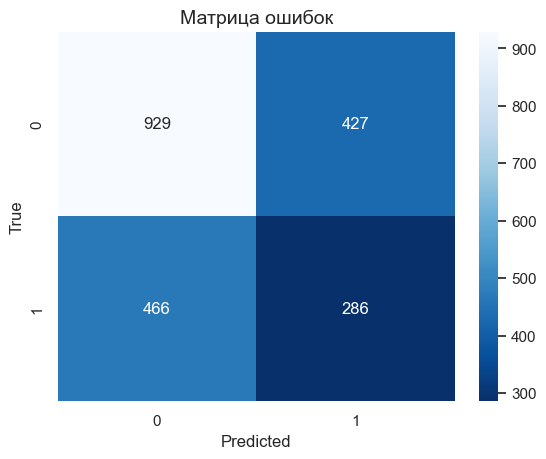

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1356
           1       0.40      0.38      0.39       752

    accuracy                           0.58      2108
   macro avg       0.53      0.53      0.53      2108
weighted avg       0.57      0.58      0.57      2108

Метрика F2_macro_score: 0.533


In [122]:
# Рассмотрим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
matrix_plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

# Настройка заголовка и подписей
plt.title('Матрица ошибок', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Вывод результатов
plt.show()

print(classification_report(y_test, y_pred))
print(f'Метрика F2_macro_score: {round(fbeta_score(y_test, y_pred, beta=2, average="macro"), 3)}')

Метрика **F2_macro_score** снизилась незначительно, следовательно о переобучении можем не беспокоиться.

На данный момент модель достаточно плохо распознает каждый из классов, попробуем сместить порог срабатывания классификатора.

In [123]:
# Получаем вероятности классов
proba_pred = search.best_estimator_.predict_proba(X_test)[:, 1]

Установим такой порог, чтобы модель определяла **90%** пациентов, которые имеют повышенный риск сердечного приступа.

In [124]:
# Получаем предсказания с помощью нового порога
proba = pd.Series(proba_pred).apply(lambda x: 1 if x >= 0.365 else 0)

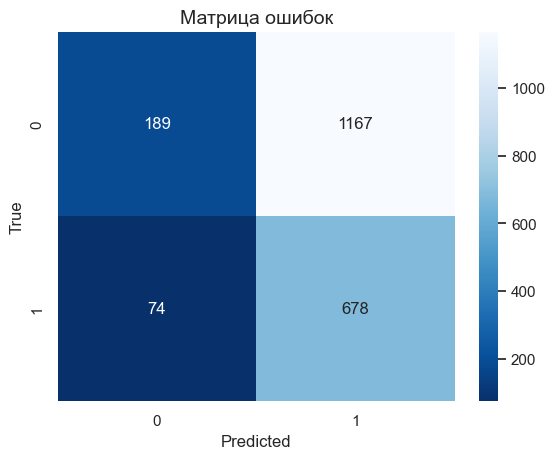

              precision    recall  f1-score   support

           0       0.72      0.14      0.23      1356
           1       0.37      0.90      0.52       752

    accuracy                           0.41      2108
   macro avg       0.54      0.52      0.38      2108
weighted avg       0.59      0.41      0.34      2108

Метрика F2_macro_score: 0.432


In [125]:
# Рассмотрим матрицу ошибок
cm = confusion_matrix(y_test, proba)
matrix_plot = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')

# Настройка заголовка и подписей
plt.title('Матрица ошибок', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Вывод результатов
plt.show()

print(classification_report(y_test, proba))
print(f'Метрика F2_macro_score: {round(fbeta_score(y_test, proba, beta=2, average="macro"), 3)}')

Дальнейшее понижение порога срабатывания классификатора приведет к тому, что модель перестанет распознавать класс **1**. Останавливаем на данном пороге **0.365**.

Обучим модель на всех данных, для более лучшего обобщения и улучшения предсказательной способности.

In [126]:
# Словарь для обучения модели
final_grid = {
    'select_feature__k': [18], 
    'models__max_depth': [10]
}

In [127]:
# Обучение модели на полных данных
model = GridSearchCV(
    pipe_final, 
    final_grid, 
    cv=4,  
    scoring=f2_macro_score, 
    n_jobs=1 
)
model.fit(X, y)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('select_feature',
                                        SelectKBest(score_func=<function mutual_info_fixed at 0x176b97560>)),
                                       ('models',
                                        <catboost.core.CatBoostClassifier object at 0x322c2d890>)]),
             n_jobs=1,
             param_grid={'models__max_depth': [10], 'select_feature__k': [18]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2, average=macro))

In [128]:
# Результаты обучения
result = pd.DataFrame(model.cv_results_)
result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.527427      0.054161          0.00243        0.000083   

   param_models__max_depth  param_select_feature__k  \
0                       10                       18   

                                               params  split0_test_score  \
0  {'models__max_depth': 10, 'select_feature__k': 18}            0.54132   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.523375           0.534343           0.532697         0.532934   

   std_test_score  rank_test_score  
0        0.006398                1

### Анализ важности признаков методом SHAP:

#### Подготовка к анализу:

In [129]:
# Присваиваем модели переменную
final_model = model.best_estimator_

In [130]:
# Подготавливаем данные
X_test_shap = final_model[:-1].transform(X_test)

# Выделяем модель
model_shap = final_model.named_steps['models']

In [131]:
# Расчитываем SHAP-значения
explainer = shap.Explainer(model_shap.predict_proba, X_test_shap)

shap_values = explainer(X_test_shap)

PermutationExplainer explainer: 2109it [02:45, 12.07it/s]                       


In [132]:
# Получаем названия признаков отобранных SelectKBest
mask = final_model.named_steps['select_feature'].get_support(indices=True)
feature_names = X_test.columns[mask].tolist()
# Проверяем полученный список
feature_names

['heart_rate',
 'diabetes',
 'family_history',
 'obesity',
 'alcohol_consumption',
 'exercise_hours_per_week',
 'previous_heart_problems',
 'medication_use',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'gender',
 'systolic_blood_pressure',
 'diastolic_blood_pressure']

#### Построение графиков:

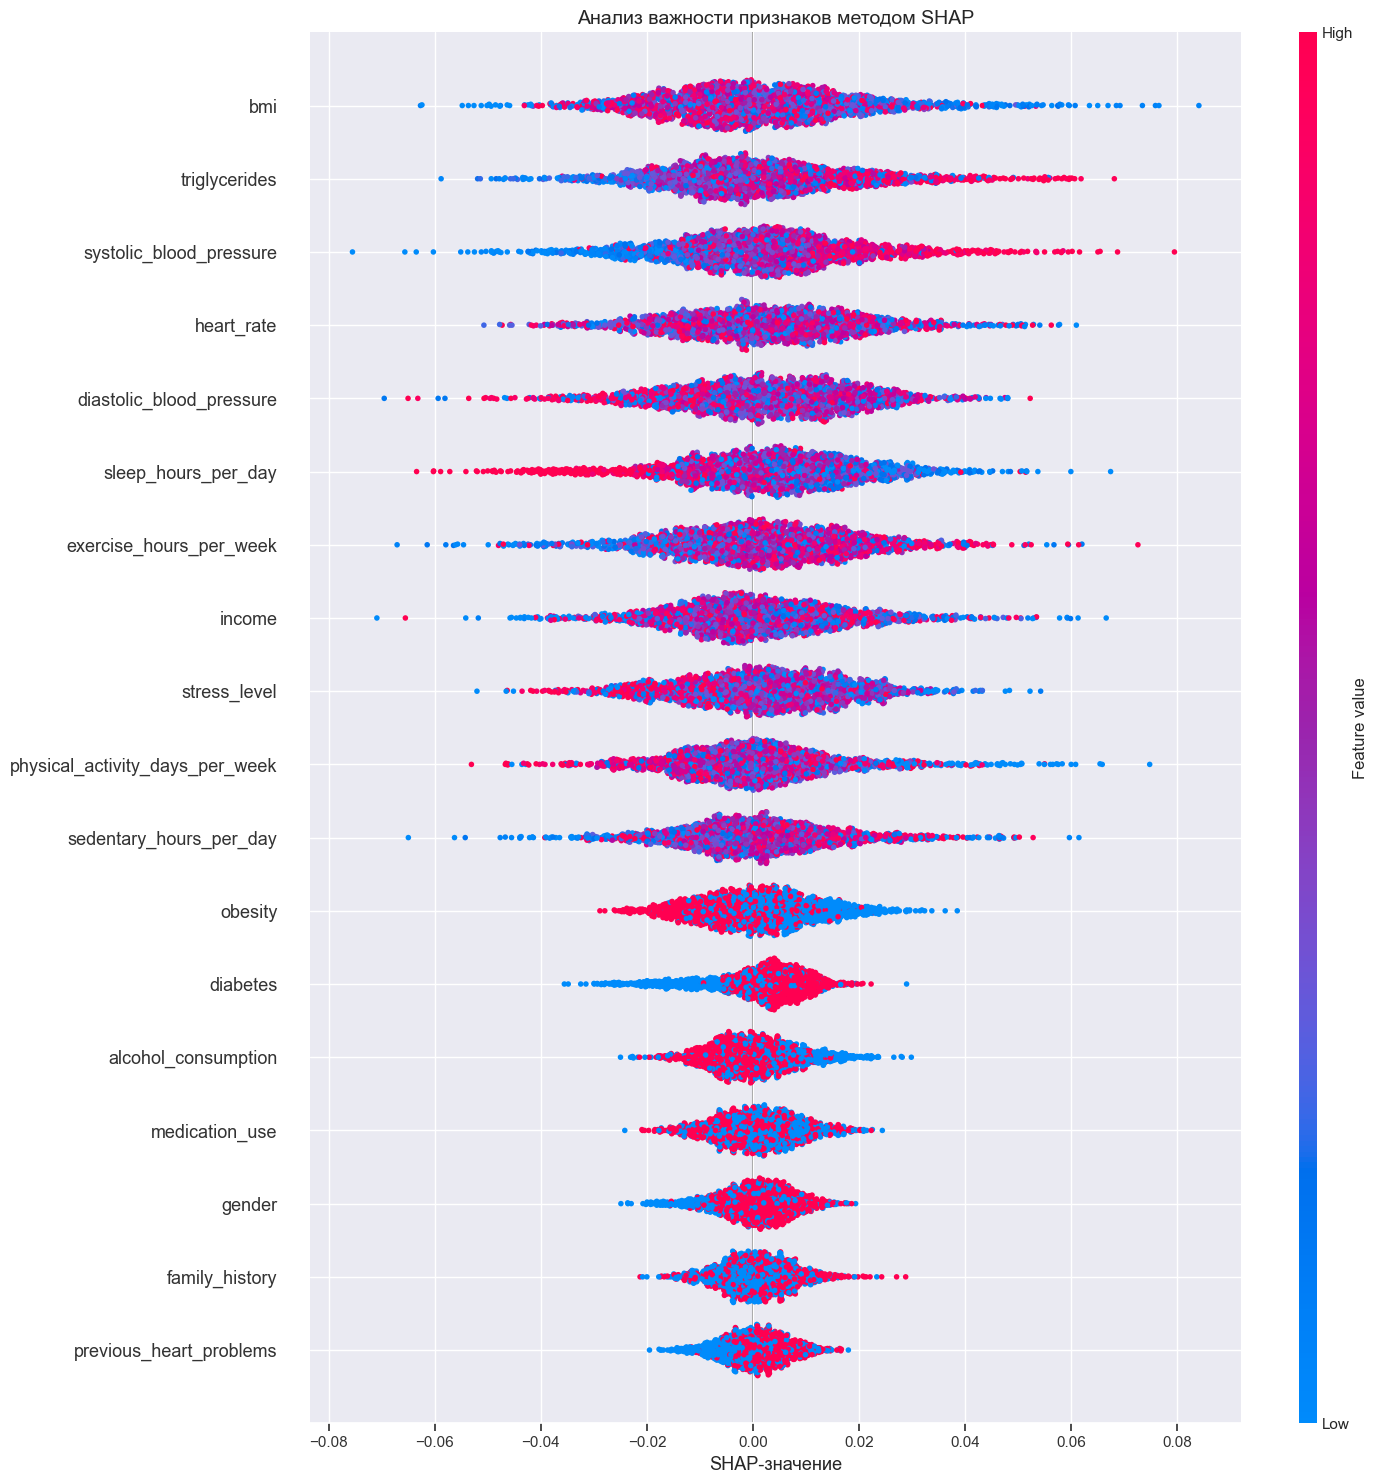

In [133]:
# Строим график важности признаков
shap.summary_plot(
    shap_values[:, :, 1], 
    X_test_shap, 
    rng=np.random.default_rng(42),
    feature_names=feature_names,
    show=False
)
# Получаем текущие оси
ax = plt.gca()

# Меняем размер графика
plt.gcf().set_size_inches(15, 15)

# Настройка заголовка и подписей
plt.title('Анализ важности признаков методом SHAP', fontsize=14)
plt.xlabel('SHAP-значение')

# Вывод графика
plt.tight_layout()
plt.show()

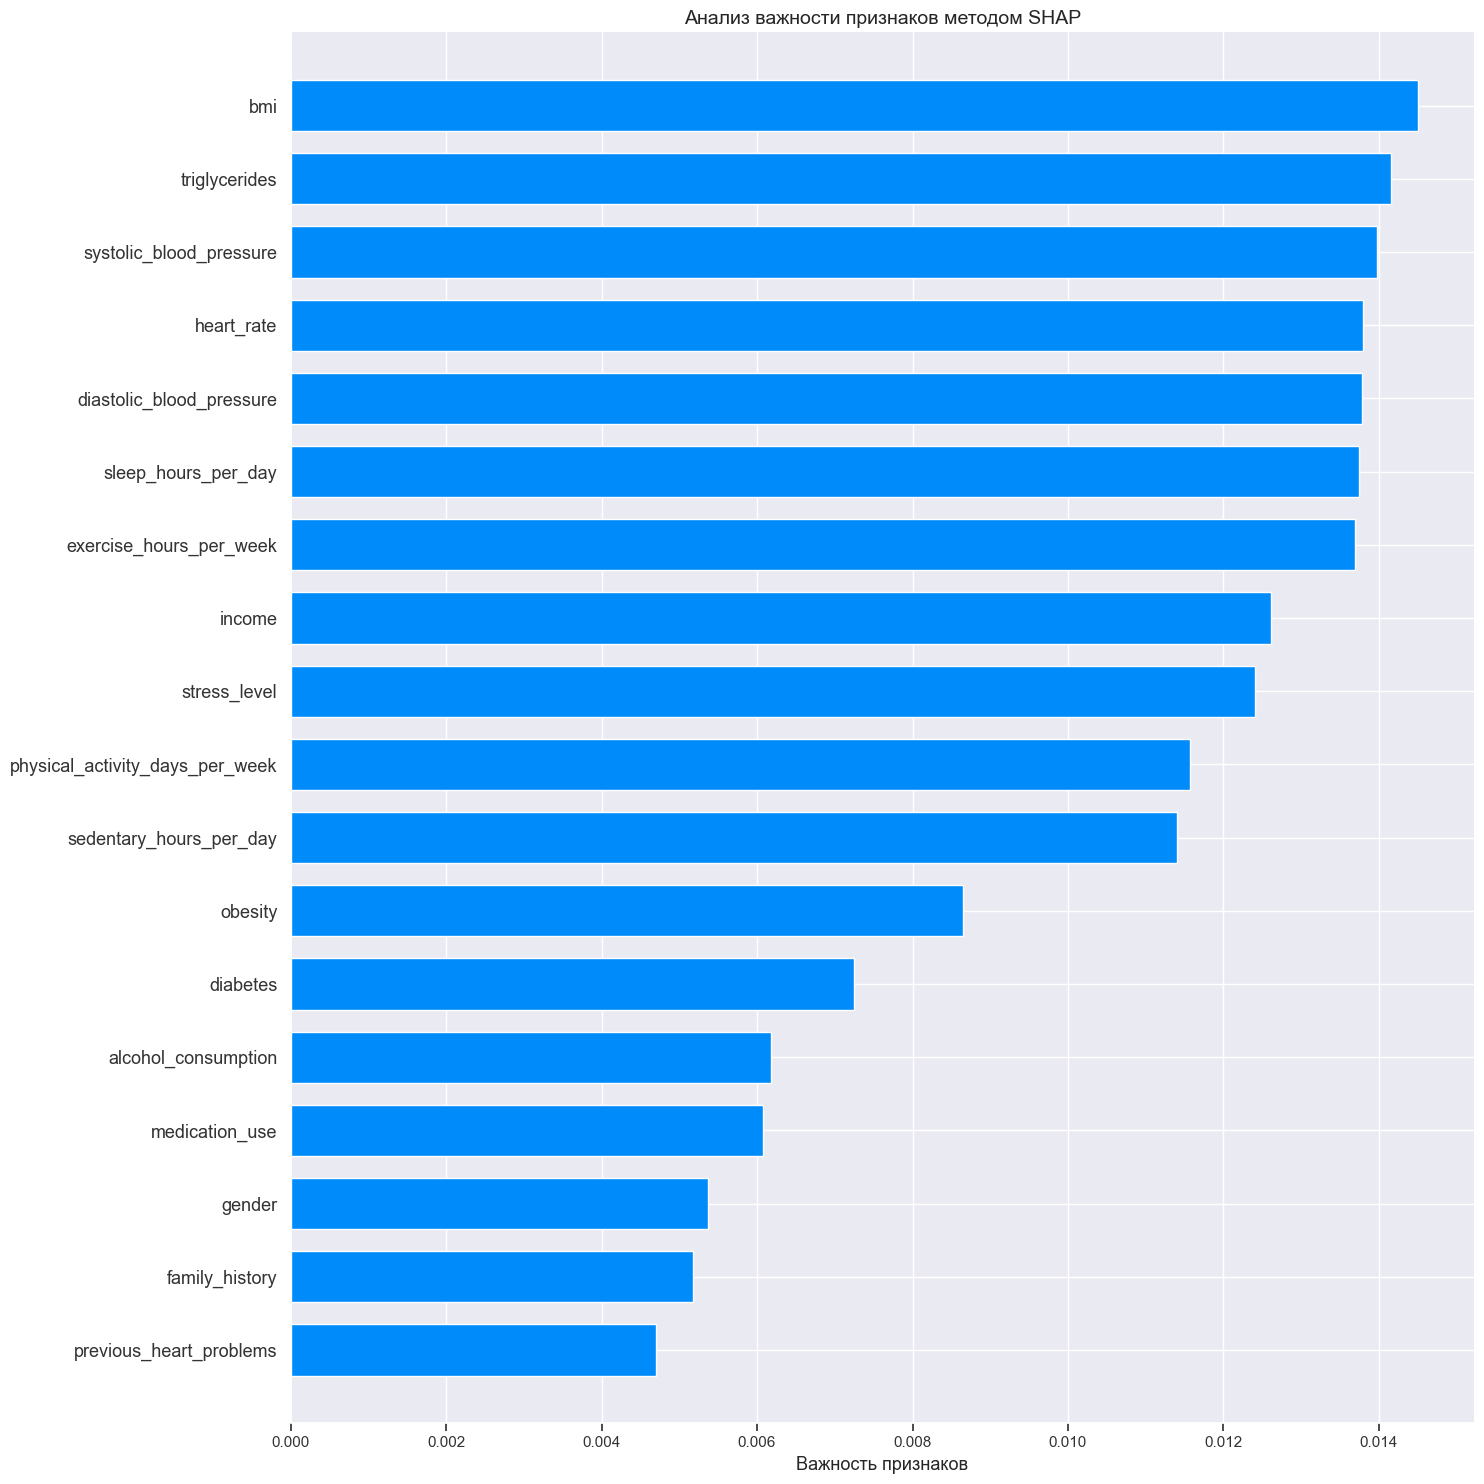

In [134]:
# Строим график важности признаков (столбчатый график)
shap.summary_plot(
    shap_values[:, :, 1], 
    X_test_shap, 
    plot_type='bar',
    rng=np.random.default_rng(42),
    feature_names=feature_names,
    show=False
)
# Получаем текущие оси
ax = plt.gca()

# Меняем размер графика
plt.gcf().set_size_inches(15, 15)

# Настройка заголовка и подписей
plt.title('Анализ важности признаков методом SHAP', fontsize=14)
plt.xlabel('Важность признаков')

# Вывод графика
plt.tight_layout()
plt.show()

### Вывод:

Мы обучили модель ***CatBoostClassifier*** с помощью ***GridSearchCV***, использовав метрику ***F2_score_macro***.

**Гиперпараметры модели:**

* iterations — **100** 
* learning_rate — **0.1**
* auto_class_weights — **Balanced**
* l2_leaf_reg — **3**
* max_depth — **10**

Так же для отбора наилучшей комбинации признаков использовали ***SelectKBest***, оптимальное количество признаков **18**.

Использование ***PolynomialFeatures*** не принесло плодов, создавало только шум и понижала метрики модели, по итогу было решено от них отказаться.

**Метрики модели:**

* **F2_score_macro** - **0.43**
* Во время тестирования модели, с помощью смещения порога срабатывания до **0.365** достигли, что в **90%** пацинетов с повышенным риском сердечного приступа модель определяет верно.

**Анализ важности признаков методом SHAP:**

Наиболее важными признаками являются (в порядке убывания важности):

* Индекс массы тела;
* Уровень триглицеридов;
* Артериальное давление;
* Количество часов физической нагрузки в неделю;
* Количество сна в день;
* Сердечный пульс.

Так же по анализу графика можно увидеть, что модель на данный момент запуталась, так как определяет то, что наличие ожирения у человека это фактор который говорит о том, что человек здоров, что противоречит здравому смыслу и мед.исследованиям, и то, что ожирение является фактором возникновения сахарного диабета, и эти признаки должны влиять на модель в одну сторону, а не в разные, как определила модель. 

**Дальнейшая доработка модели:**

На данный момент модель работает достаточно плохо, но есть несколько идей, для ее улучшения:

* Запросить данные без масштабирования, чтобы сделать данные "чище", на данный момент нет уверенности в их адекватности, так как при масштабировании **MinMaxScaler** трудно выявить аномалии в самих значениях, а так же будет доступен более корректный ***Features Engineering***, например упростить признак о давлении пациентов, учитывать не абсолютные значения, а разницу между давлением во время сокращения сердца и покоя.
* Добавить или знаменить признаки, для определния уровня риска сердечного приступа, которые могли бы предупредить заранее об опасности здоровью, а не те, которые сигнализируют уже о случившемся, как в нашем случае, например анализ кардиограммы пациента.

Иными словами, человеческий организм это одна из сложнейших систем, с которыми сталкивался человек, и большинство процессов мы и сейчас не до конца понимаем, поэтому к выбору признаков для построения модели нужно отнестись должным образом, так как важна каждая деталь, например, не только факт принимает алкоголь человек или нет, а сколько алкоголя выпивает человек, раз в полгода или 2 литра спирта в неделю это координально разные ситуации, как и наличие ожирения, в данном случае процент жира в теле будет более точным определением, но так же и надо учитывать висцеральный жир, который более опасен для здоровья человека. 

Если мы подобным образом подойдем к каждому признаку, уверен, мы сможем улучшить предсказательную способность модели.

## Прогноз модели на тестовой выборке:

In [135]:
# Загрузка тестовой выборки
test = pd.read_csv('../heart_test.csv')

In [136]:
# Подготовка данных
test = clean_data(test)

In [137]:
# Прогнозирование на тестовой выборке
test['predict'] = final_model.predict_proba(test)[:, 1]
test['predict'] = test['predict'].apply(lambda x: 1 if x >= 0.365 else 0)
test_predict = test[['predict']].reset_index(names='id')

# Проверяем результат
test_predict.head()

id  predict
0  7746        1
1  4202        1
2  6632        1
3  4639        0
4  4825        0

## Подготовка модели к продакшену:

## Общий вывод:

### Описание проекта:

Проект направлен на прогнозирование риска сердечного приступа с использованием методов машинного обучения. На основе медицинских данных, таких как возраст, давление, результаты анализов и образ жизни, модель оценивает вероятность риска сердечного приступа. Решение поможет врачам и пациентам вовремя выявлять риски и принимать профилактические меры.

#### Цель проекта:

Построить модель для прогнозирования риска сердечного приступа (высокий или низкий).

#### Описание данных:

* **df_train - heart_train.csv** — тренировочная выборка.
* **df_test - heart_test.csv** — тестовая выборка.

#### Описание признаков:

* **Unnamed: 0** — индекс строки;
* **Age** — возраст ***(отмасштабирован)***;
* **Cholesterol** — уровень холестерина ***(отмасштабирован)***;
* **Heart rate** — частота сердечных сокращений ***(отмасштабирован)***;
* **Diabetes** — наличие сахарного диабета ***(0 - нет; 1 - да)***;
* **Family History** — наличие сердечно-сосудистых заболеваний у близких родственников ***(0 - нет; 1 - да)***;
* **Smoking** — курение ***(0 - нет; 1 - да)***;
* **Obesity** — наличие ожирения ***(0 - нет; 1 - да)***;
* **Alcohol Consumption** — употребление алкоголя ***(0 - нет; 1 - да)***;
* **Exercise Hours Per Week** — количество часов физической нагрузки в неделю ***(отмасштабирован)***;
* **Diet** — тип диеты ***(от 0 до 3)***;
* **Previous Heart Problems** — наличие сердечных заболеваний в анамнезе ***(0 - нет; 1 - да)***;
* **Medication Use** — принимает ли лекарства ***(0 - нет; 1 - да)***;
* **Stress Level** — уровень стресса ***(от 1 до 10)***;
* **Sedentary Hours Per Day** — количество часов в день проведенных сидя ***(отмасштабирован)***;
* **Income** — доход ***(отмасштабирован)***;
* **BMI** — индекс массы тела ***(отмасштабирован)***;
* **Triglycerides** — концентрация триглицеридов в крови ***(отмасштабирован)***;
* **Physical Activity Days Per Week** — количество дней с физической нагрузкой в неделю ***(от 0 до 7)***;
* **Sleep Hours Per Day** — количество часов сна в день ***(отмасштабирован)***;
* **Heart Attack Risk** — риск сердечного приступа **(целевой признак)** ***(0 - нет; 1 - да)***;
* **Blood sugar** — уровень сахара в крови ***(отмасштабирован)***;
* **CK-MB** — фермент, повышающийся в крови при повреждении сердечной мышцы ***(отмасштабирован)***;
* **Troponin** — уровень кардиоспецифического белка тропонина I или T в крови ***(отмасштабирован)***;
* **Gender** — пол ***(Male, Female)***;
* **Systolic blood pressure** — давление в артериях в момент, когда сердце сокращается ***(отмасштабирован)***;
* **Diastolic blood pressure** — давление в артериях в момент расслабления сердца ***(отмасштабирован)***;
* **id** — уникальный индификатор.

***\*(отмасштабирован)*** — означает, что признак приведен к диапозону значений от 0 до 1.

#### Ход исследования:

* **Подготовка данных**: загрузка и изучение общей информации из представленных датасетов.
* **Предобработка данных**: обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий.
* **Исследовательский анализ данных**: изучение признаков имеющихся в датасетах, их распределение, поиск выбросов/аномалий в данных.
* **Корреляционный анализ**: изучение взимосвязей между входными признаками и целевыми, а также и между ними.
* **Использование пайплайнов**: написание пайплайнов для подготовки данных и обучения модели для упрощения и ускорения поиска лучшей модели и ее гиперпараметров.
* **Поиск лучшей модели**: использование автоматического поиска лучшей модели и ее гиперпараметров с помощью **GridSearchCV**.
* **Анализ важности признаков**: анализ степени важности признков их влияния на принятие решений моделью с помощью метода **SHAP**.
* **Прогноз на тестовой выборке**: проедсказание на тестовой выборке и сохранение результата.
* **Сохранение модели для продакшена**: сохранение модели для дальнейшего продакшена.

**Общий вывод**: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

### Результаты работы:

Мы обучили модель ***CatBoostClassifier*** с помощью ***GridSearchCV***, использовав метрику ***F2_score_macro***.

#### Гиперпараметры модели:

* iterations — **100** 
* learning_rate — **0.1**
* auto_class_weights — **Balanced**
* l2_leaf_reg — **3**
* max_depth — **10**

Так же для отбора наилучшей комбинации признаков использовали ***SelectKBest***, оптимальное количество признаков **18**.

Использование ***PolynomialFeatures*** не принесло плодов, создавало только шум и понижала метрики модели, по итогу было решено от них отказаться.

#### Метрики модели:

* **F2_score_macro** - **0.43**
* Во время тестирования модели, с помощью смещения порога срабатывания до **0.365** достигли, что в **90%** пацинетов с повышенным риском сердечного приступа модель определяет верно.

#### Анализ важности признаков методом SHAP:

Наиболее важными признаками являются (в порядке убывания важности):

* Индекс массы тела;
* Уровень триглицеридов;
* Артериальное давление;
* Количество часов физической нагрузки в неделю;
* Количество сна в день;
* Сердечный пульс.

Так же по анализу графика можно увидеть, что модель на данный момент запуталась, так как определяет то, что наличие ожирения у человека это фактор который говорит о том, что человек здоров, что противоречит здравому смыслу и мед.исследованиям, и то, что ожирение является фактором возникновения сахарного диабета, и эти признаки должны влиять на модель в одну сторону, а не в разные, как определила модель. 

#### Дальнейшая доработка модели:

На данный момент модель работает достаточно плохо, но есть несколько идей, для ее улучшения:

* Запросить данные без масштабирования, чтобы сделать данные "чище", на данный момент нет уверенности в их адекватности, так как при масштабировании **MinMaxScaler** трудно выявить аномалии в самих значениях, а так же будет доступен более корректный ***Features Engineering***, например упростить признак о давлении пациентов, учитывать не абсолютные значения, а разницу между давлением во время сокращения сердца и покоя.
* Добавить или знаменить признаки, для определния уровня риска сердечного приступа, которые могли бы предупредить заранее об опасности здоровью, а не те, которые сигнализируют уже о случившемся, как в нашем случае, например анализ кардиограммы пациента.

Иными словами, человеческий организм это одна из сложнейших систем, с которыми сталкивался человек, и большинство процессов мы и сейчас не до конца понимаем, поэтому к выбору признаков для построения модели нужно отнестись должным образом, так как важна каждая деталь, например, не только факт принимает алкоголь человек или нет, а сколько алкоголя выпивает человек, раз в полгода или 2 литра спирта в неделю это координально разные ситуации, как и наличие ожирения, в данном случае процент жира в теле будет более точным определением, но так же и надо учитывать висцеральный жир, который более опасен для здоровья человека. 

Если мы подобным образом подойдем к каждому признаку, уверен, мы сможем улучшить предсказательную способность модели.